IMPORTING ALL THE NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,RandomizedSearchCV

LOADING THE TRAIN DATA INTO A DATAFRAME

In [2]:
train_data = pd.read_csv("C:/Users/CHUKS/Downloads/free-ai-classes-in-every-city-hackathon-2023/Housing_dataset_train.csv")
train_data

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898
...,...,...,...,...,...,...,...
13995,6175,Edo,Bungalow,NaN,7.0,NaN,2367927.861
13996,9704,Kaduna,Apartment,NaN,7.0,5.0,2228516.471
13997,11190,Plateau,Bungalow,8.0,6.0,5.0,2406812.693
13998,9256,Delta,Flat,NaN,6.0,1.0,3348918.718


In [3]:
#To provide a summary of the dataframe structure,including the number of non-null values, data types
# and memory usage. To quickly understand the data, identify missing values and know the data type of
# each column.

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [4]:
train_data.describe()

,ID,bedroom,bathroom,parking_space,price
count,14000.000000,12201.000000,12195.000000,12189.000000,1.400000e+04
mean,4862.700357,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,6.000000,5.000000,4.000000,2.586699e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


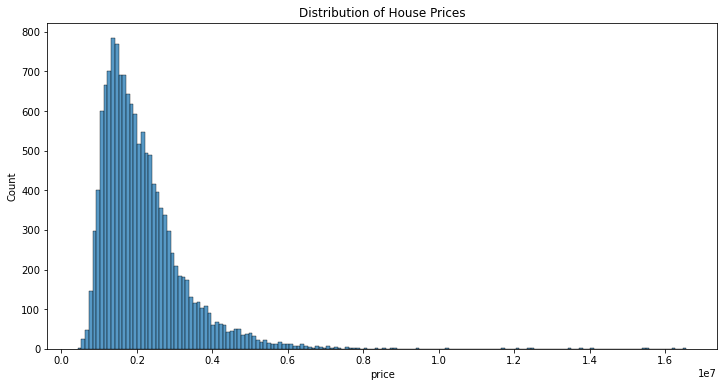

In [5]:
plt.figure(figsize=(12,6))
sns.histplot(train_data['price'])
plt.title('Distribution of House Prices')
plt.show()

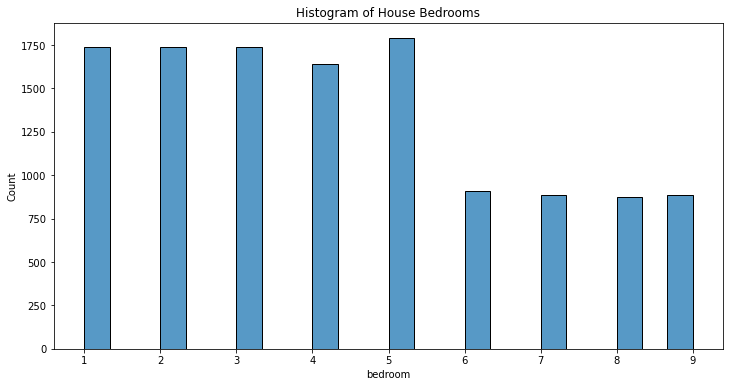

In [6]:
plt.figure(figsize=(12,6))
sns.histplot(train_data['bedroom'])
plt.title('Histogram of House Bedrooms')
plt.show()

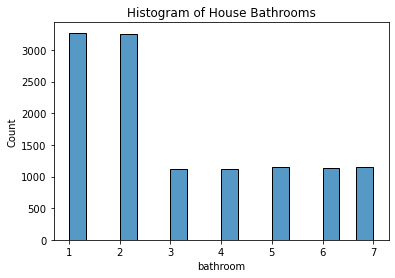

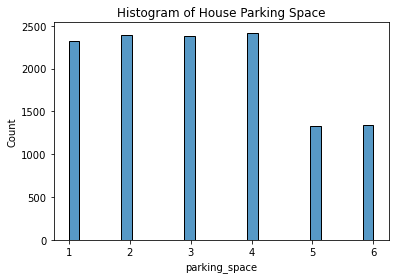

In [7]:
sns.histplot(train_data['bathroom'])
plt.title('Histogram of House Bathrooms')

plt.show()

sns.histplot(train_data['parking_space'])
plt.title('Histogram of House Parking Space')

plt.show()

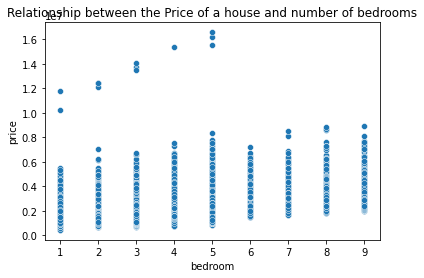

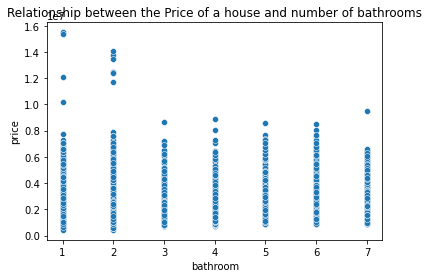

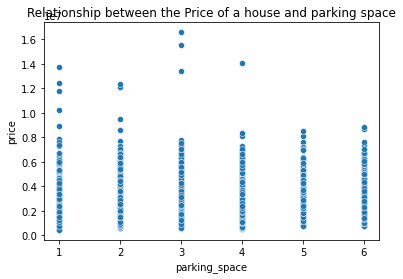

In [8]:
sns.scatterplot(x='bedroom', y='price', data=train_data)
plt.title('Relationship between the Price of a house and number of bedrooms')
plt.show()

sns.scatterplot(x='bathroom', y='price', data=train_data)
plt.title('Relationship between the Price of a house and number of bathrooms')
plt.show()

sns.scatterplot(x='parking_space', y='price', data=train_data)
plt.title('Relationship between the Price of a house and parking space')
plt.show()

In [9]:
# To quickly check the skewness of the dataset

cols_skewness_value = train_data.skew(numeric_only=True)
cols_skewness_value

ID               0.610108
bedroom          0.390922
bathroom         0.633202
parking_space    0.249415
price            2.451809
dtype: float64

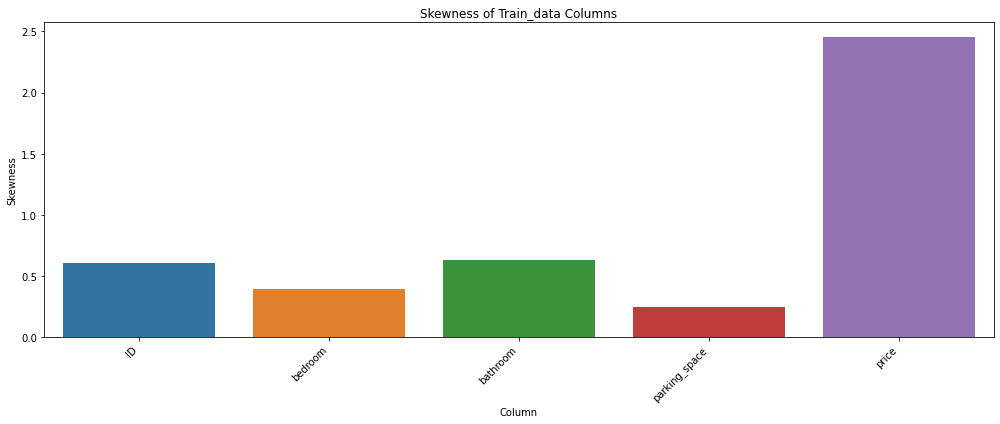

In [10]:
# To visualize the skewness of the data

plt.figure(figsize=(14, 6))
sns.barplot(x=cols_skewness_value.index, y=cols_skewness_value)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Column')
plt.ylabel('Skewness')
plt.title('Skewness of Train_data Columns')
plt.tight_layout()
plt.show()

DATA PREPROCESSING

In [11]:
# Here i dropped the rows containing missing values in the categorical columns

train_data.dropna(subset=['loc','title'],inplace=True)
train_data

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898
5,1733,Borno,Mansion,NaN,1.0,3.0,1341750.867
...,...,...,...,...,...,...,...
13994,10477,Taraba,Detached duplex,8.0,1.0,6.0,2837199.086
13995,6175,Edo,Bungalow,NaN,7.0,NaN,2367927.861
13996,9704,Kaduna,Apartment,NaN,7.0,5.0,2228516.471
13997,11190,Plateau,Bungalow,8.0,6.0,5.0,2406812.693


In [12]:
# Filling the rows containing missing values in the numerical columns with the median

num_cols = ['bedroom','bathroom','parking_space']
train_data[num_cols]=train_data[num_cols].fillna(train_data[num_cols].median())
train_data

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,4.0,2.0,4.0,1672416.689
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,4.0,5.0,6.0,2600700.898
5,1733,Borno,Mansion,4.0,1.0,3.0,1341750.867
...,...,...,...,...,...,...,...
13994,10477,Taraba,Detached duplex,8.0,1.0,6.0,2837199.086
13995,6175,Edo,Bungalow,4.0,7.0,3.0,2367927.861
13996,9704,Kaduna,Apartment,4.0,7.0,5.0,2228516.471
13997,11190,Plateau,Bungalow,8.0,6.0,5.0,2406812.693


In [13]:
# Assigning the target to the variable y

y = train_data.price

In [14]:
# Here i dropped the ID column

Housing_train_data = train_data.drop(['ID'],axis=1)
Housing_train_data

,loc,title,bedroom,bathroom,parking_space,price
0,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,Ondo,Apartment,4.0,2.0,4.0,1672416.689
3,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,Kogi,Terrace duplex,4.0,5.0,6.0,2600700.898
5,Borno,Mansion,4.0,1.0,3.0,1341750.867
...,...,...,...,...,...,...
13994,Taraba,Detached duplex,8.0,1.0,6.0,2837199.086
13995,Edo,Bungalow,4.0,7.0,3.0,2367927.861
13996,Kaduna,Apartment,4.0,7.0,5.0,2228516.471
13997,Plateau,Bungalow,8.0,6.0,5.0,2406812.693


FEATURE ENGINEERING

In [15]:
# I created a new feature called "bed_bath_ratio" which is formed by dividing the number of bedrooms
# by the number of bathrooms.
# This feature considers both room to capture the overall space utilization

Housing_train_data['bed_bath_ratio'] = Housing_train_data['bedroom']/Housing_train_data['bathroom']
Housing_train_data

,loc,title,bedroom,bathroom,parking_space,price,bed_bath_ratio
0,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,1.000000
1,Ondo,Apartment,4.0,2.0,4.0,1672416.689,2.000000
3,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,2.500000
4,Kogi,Terrace duplex,4.0,5.0,6.0,2600700.898,0.800000
5,Borno,Mansion,4.0,1.0,3.0,1341750.867,4.000000
...,...,...,...,...,...,...,...
13994,Taraba,Detached duplex,8.0,1.0,6.0,2837199.086,8.000000
13995,Edo,Bungalow,4.0,7.0,3.0,2367927.861,0.571429
13996,Kaduna,Apartment,4.0,7.0,5.0,2228516.471,0.571429
13997,Plateau,Bungalow,8.0,6.0,5.0,2406812.693,1.333333


In [16]:
# I created a new feature called "house_size" which is formed by adding the numbers of bedroom,
# bathrooms, and parking spaces. This feature provides the overall capacity of the house.

Housing_train_data['house_size'] = Housing_train_data['bedroom'] + Housing_train_data['bathroom'] + Housing_train_data['parking_space']
Housing_train_data

,loc,title,bedroom,bathroom,parking_space,price,bed_bath_ratio,house_size
0,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,1.000000,5.0
1,Ondo,Apartment,4.0,2.0,4.0,1672416.689,2.000000,10.0
3,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,2.500000,11.0
4,Kogi,Terrace duplex,4.0,5.0,6.0,2600700.898,0.800000,15.0
5,Borno,Mansion,4.0,1.0,3.0,1341750.867,4.000000,8.0
...,...,...,...,...,...,...,...,...
13994,Taraba,Detached duplex,8.0,1.0,6.0,2837199.086,8.000000,15.0
13995,Edo,Bungalow,4.0,7.0,3.0,2367927.861,0.571429,14.0
13996,Kaduna,Apartment,4.0,7.0,5.0,2228516.471,0.571429,16.0
13997,Plateau,Bungalow,8.0,6.0,5.0,2406812.693,1.333333,19.0


In [17]:
# This feature is created by incorporating both the relative balance of bedrooms to bathrooms and the
# overall size of the house.

Housing_train_data['convenience'] = Housing_train_data['bed_bath_ratio'] * Housing_train_data['house_size']
Housing_train_data

,loc,title,bedroom,bathroom,parking_space,price,bed_bath_ratio,house_size,convenience
0,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,1.000000,5.0,5.000000
1,Ondo,Apartment,4.0,2.0,4.0,1672416.689,2.000000,10.0,20.000000
3,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,2.500000,11.0,27.500000
4,Kogi,Terrace duplex,4.0,5.0,6.0,2600700.898,0.800000,15.0,12.000000
5,Borno,Mansion,4.0,1.0,3.0,1341750.867,4.000000,8.0,32.000000
...,...,...,...,...,...,...,...,...,...
13994,Taraba,Detached duplex,8.0,1.0,6.0,2837199.086,8.000000,15.0,120.000000
13995,Edo,Bungalow,4.0,7.0,3.0,2367927.861,0.571429,14.0,8.000000
13996,Kaduna,Apartment,4.0,7.0,5.0,2228516.471,0.571429,16.0,9.142857
13997,Plateau,Bungalow,8.0,6.0,5.0,2406812.693,1.333333,19.0,25.333333


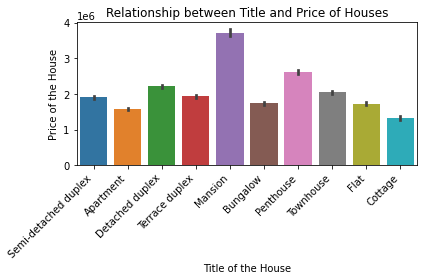

In [18]:
#plt.figure(figsize=(10,8))

sns.barplot(x='title', y='price', data=Housing_train_data)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Title of the House')
plt.ylabel('Price of the House')
plt.title('Relationship between Title and Price of Houses')
plt.tight_layout()
plt.show()

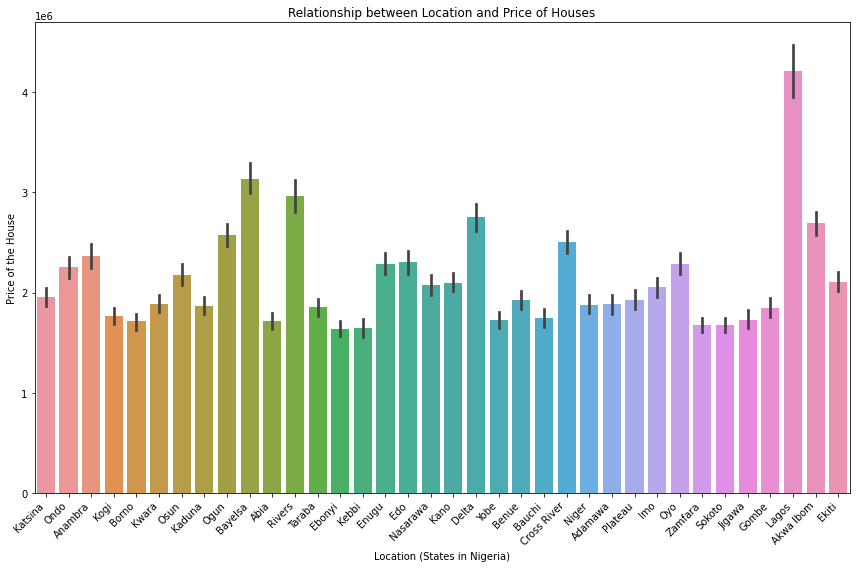

In [19]:
plt.figure(figsize=(12,8))
sns.barplot(x='loc', y='price', data=Housing_train_data)
plt.xticks(rotation=45,ha='right')
plt.xlabel('Location (States in Nigeria)')
plt.ylabel('Price of the House')
plt.title('Relationship between Location and Price of Houses')
plt.tight_layout()
plt.show()

ENCODING ALL CATEGORICAL COLUMNS

In [20]:
#Target encoding the 'loc' column

loc_target_encode = Housing_train_data.groupby('loc')['price'].median()
Housing_train_data['loc_encoded'] = Housing_train_data['loc'].map(loc_target_encode)
Housing_train_data

,loc,title,bedroom,bathroom,parking_space,price,bed_bath_ratio,house_size,convenience,loc_encoded
0,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,1.000000,5.0,5.000000,1.780685e+06
1,Ondo,Apartment,4.0,2.0,4.0,1672416.689,2.000000,10.0,20.000000,2.118302e+06
3,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,2.500000,11.0,27.500000,2.086992e+06
4,Kogi,Terrace duplex,4.0,5.0,6.0,2600700.898,0.800000,15.0,12.000000,1.594661e+06
5,Borno,Mansion,4.0,1.0,3.0,1341750.867,4.000000,8.0,32.000000,1.476889e+06
...,...,...,...,...,...,...,...,...,...,...
13994,Taraba,Detached duplex,8.0,1.0,6.0,2837199.086,8.000000,15.0,120.000000,1.675506e+06
13995,Edo,Bungalow,4.0,7.0,3.0,2367927.861,0.571429,14.0,8.000000,2.009281e+06
13996,Kaduna,Apartment,4.0,7.0,5.0,2228516.471,0.571429,16.0,9.142857,1.653935e+06
13997,Plateau,Bungalow,8.0,6.0,5.0,2406812.693,1.333333,19.0,25.333333,1.723754e+06


In [21]:
#Target encoding the title column

title_target_encode = Housing_train_data.groupby('title')['price'].median()
Housing_train_data['title_encoded'] = Housing_train_data['title'].map(title_target_encode)
Housing_train_data

,loc,title,bedroom,bathroom,parking_space,price,bed_bath_ratio,house_size,convenience,loc_encoded,title_encoded
0,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,1.000000,5.0,5.000000,1.780685e+06,1.751828e+06
1,Ondo,Apartment,4.0,2.0,4.0,1672416.689,2.000000,10.0,20.000000,2.118302e+06,1.461717e+06
3,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,2.500000,11.0,27.500000,2.086992e+06,2.066907e+06
4,Kogi,Terrace duplex,4.0,5.0,6.0,2600700.898,0.800000,15.0,12.000000,1.594661e+06,1.790421e+06
5,Borno,Mansion,4.0,1.0,3.0,1341750.867,4.000000,8.0,32.000000,1.476889e+06,3.591184e+06
...,...,...,...,...,...,...,...,...,...,...,...
13994,Taraba,Detached duplex,8.0,1.0,6.0,2837199.086,8.000000,15.0,120.000000,1.675506e+06,2.066907e+06
13995,Edo,Bungalow,4.0,7.0,3.0,2367927.861,0.571429,14.0,8.000000,2.009281e+06,1.621742e+06
13996,Kaduna,Apartment,4.0,7.0,5.0,2228516.471,0.571429,16.0,9.142857,1.653935e+06,1.461717e+06
13997,Plateau,Bungalow,8.0,6.0,5.0,2406812.693,1.333333,19.0,25.333333,1.723754e+06,1.621742e+06


In [22]:
# Dropping the categorical columns and the target

encoded_train_data = Housing_train_data.drop(['title','loc','price'], axis=1)
encoded_train_data

,bedroom,bathroom,parking_space,bed_bath_ratio,house_size,convenience,loc_encoded,title_encoded
0,2.0,2.0,1.0,1.000000,5.0,5.000000,1.780685e+06,1.751828e+06
1,4.0,2.0,4.0,2.000000,10.0,20.000000,2.118302e+06,1.461717e+06
3,5.0,2.0,4.0,2.500000,11.0,27.500000,2.086992e+06,2.066907e+06
4,4.0,5.0,6.0,0.800000,15.0,12.000000,1.594661e+06,1.790421e+06
5,4.0,1.0,3.0,4.000000,8.0,32.000000,1.476889e+06,3.591184e+06
...,...,...,...,...,...,...,...,...
13994,8.0,1.0,6.0,8.000000,15.0,120.000000,1.675506e+06,2.066907e+06
13995,4.0,7.0,3.0,0.571429,14.0,8.000000,2.009281e+06,1.621742e+06
13996,4.0,7.0,5.0,0.571429,16.0,9.142857,1.653935e+06,1.461717e+06
13997,8.0,6.0,5.0,1.333333,19.0,25.333333,1.723754e+06,1.621742e+06


In [27]:
# Instantiating a catboost regressor model

my_model = CatBoostRegressor(random_state=50)

In [28]:
# Assigning a range of values for the catboost regressor parameters.

param_dist = {
    'learning_rate': np.linspace(0.01, 0.3, num=10),
    'depth': range(4, 11),
    'iterations': range(100, 1001, 10),
    'l2_leaf_reg': np.logspace(-3, 3, num=7),
    'border_count': [32, 64, 128]
}

'learning_rate': Learning rate controls the step size in the gradient descent optimization process. It scales the contribution of each tree during training, with a lower value making the model more robust but requiring more iterations to converge.

'depth': Depth determines the maximum depth of each decision tree. Higher values can lead to more complex models with better training performance but may increase the risk of overfitting.

'iterations': Iterations specify the number of boosting rounds during training. More iterations can improve model performance but might increase training time.

'l2_leaf_reg': L2 regularization term added to the loss function. It helps prevent overfitting by penalizing large weights.

'border_count': Border count is the number of splits to consider for categorical features. Higher values increase model accuracy at the cost of more memory usage.


In [29]:
# I used randomsearchcv to determine the best values for the parameters

random_search = RandomizedSearchCV(estimator = my_model,param_distributions=param_dist,cv=5,n_iter=10,scoring="neg_mean_squared_error")

In [30]:
# Fitting the model to output the best values for the parameters

random_search.fit(encoded_train_data,y)

0:	learn: 939904.2975602	total: 311ms	remaining: 5m 4s
1:	learn: 846323.3442681	total: 330ms	remaining: 2m 41s
2:	learn: 766837.6946890	total: 337ms	remaining: 1m 49s
3:	learn: 703190.9694213	total: 345ms	remaining: 1m 24s
4:	learn: 647568.7072999	total: 352ms	remaining: 1m 8s
5:	learn: 599276.1061257	total: 359ms	remaining: 58.3s
6:	learn: 560814.0157552	total: 365ms	remaining: 50.7s
7:	learn: 529417.4973843	total: 371ms	remaining: 45.1s
8:	learn: 505222.3067567	total: 377ms	remaining: 40.6s
9:	learn: 485973.3967261	total: 383ms	remaining: 37.1s
10:	learn: 469421.4729579	total: 389ms	remaining: 34.3s
11:	learn: 456015.1636586	total: 395ms	remaining: 31.9s
12:	learn: 446501.7157597	total: 402ms	remaining: 29.9s
13:	learn: 438586.5336754	total: 407ms	remaining: 28.1s
14:	learn: 432474.6710730	total: 415ms	remaining: 26.7s
15:	learn: 425900.7832090	total: 421ms	remaining: 25.4s
16:	learn: 421279.6469690	total: 427ms	remaining: 24.2s
17:	learn: 410590.0084245	total: 434ms	remaining: 23.2s

152:	learn: 325799.8217052	total: 1.33s	remaining: 7.22s
153:	learn: 325652.7928055	total: 1.34s	remaining: 7.2s
154:	learn: 325544.5441649	total: 1.35s	remaining: 7.21s
155:	learn: 325231.4232280	total: 1.37s	remaining: 7.22s
156:	learn: 324968.6320260	total: 1.37s	remaining: 7.2s
157:	learn: 324543.3657291	total: 1.38s	remaining: 7.18s
158:	learn: 324249.3739760	total: 1.39s	remaining: 7.17s
159:	learn: 323910.0968801	total: 1.4s	remaining: 7.15s
160:	learn: 323472.8168063	total: 1.4s	remaining: 7.14s
161:	learn: 323275.9368048	total: 1.41s	remaining: 7.14s
162:	learn: 323065.0811312	total: 1.42s	remaining: 7.13s
163:	learn: 322973.3218132	total: 1.43s	remaining: 7.11s
164:	learn: 322773.1060419	total: 1.44s	remaining: 7.1s
165:	learn: 322655.6117817	total: 1.45s	remaining: 7.1s
166:	learn: 322481.6854375	total: 1.46s	remaining: 7.08s
167:	learn: 322091.1336753	total: 1.46s	remaining: 7.07s
168:	learn: 321947.5332105	total: 1.47s	remaining: 7.05s
169:	learn: 321482.4474305	total: 1.4

322:	learn: 290303.3342962	total: 2.53s	remaining: 5.14s
323:	learn: 290049.1440525	total: 2.54s	remaining: 5.13s
324:	learn: 289992.8742514	total: 2.54s	remaining: 5.12s
325:	learn: 289751.0110118	total: 2.55s	remaining: 5.11s
326:	learn: 289649.4119327	total: 2.56s	remaining: 5.1s
327:	learn: 289322.4845411	total: 2.56s	remaining: 5.09s
328:	learn: 289123.0788975	total: 2.57s	remaining: 5.08s
329:	learn: 288929.2601553	total: 2.58s	remaining: 5.08s
330:	learn: 288790.9602663	total: 2.58s	remaining: 5.07s
331:	learn: 288645.3823525	total: 2.59s	remaining: 5.05s
332:	learn: 288557.8876500	total: 2.6s	remaining: 5.04s
333:	learn: 288426.7610408	total: 2.6s	remaining: 5.03s
334:	learn: 288388.6195451	total: 2.61s	remaining: 5.02s
335:	learn: 288122.1271201	total: 2.61s	remaining: 5.01s
336:	learn: 288069.6703176	total: 2.62s	remaining: 5s
337:	learn: 287982.3890093	total: 2.63s	remaining: 4.99s
338:	learn: 287945.3511474	total: 2.63s	remaining: 4.98s
339:	learn: 287724.8920939	total: 2.6

477:	learn: 270779.3302941	total: 3.55s	remaining: 3.72s
478:	learn: 270643.8988762	total: 3.55s	remaining: 3.72s
479:	learn: 270521.6163046	total: 3.56s	remaining: 3.71s
480:	learn: 270316.6814065	total: 3.57s	remaining: 3.7s
481:	learn: 270248.3321499	total: 3.57s	remaining: 3.69s
482:	learn: 270229.4430138	total: 3.58s	remaining: 3.68s
483:	learn: 270202.3026104	total: 3.59s	remaining: 3.68s
484:	learn: 270138.9266797	total: 3.6s	remaining: 3.67s
485:	learn: 269965.2254433	total: 3.6s	remaining: 3.66s
486:	learn: 269694.2122734	total: 3.61s	remaining: 3.65s
487:	learn: 269617.3765604	total: 3.61s	remaining: 3.64s
488:	learn: 269428.8655618	total: 3.62s	remaining: 3.63s
489:	learn: 269369.2324927	total: 3.63s	remaining: 3.63s
490:	learn: 269262.3863481	total: 3.63s	remaining: 3.62s
491:	learn: 269125.2972836	total: 3.64s	remaining: 3.61s
492:	learn: 269104.4665104	total: 3.65s	remaining: 3.6s
493:	learn: 269045.6586458	total: 3.65s	remaining: 3.59s
494:	learn: 268902.1656224	total: 3

625:	learn: 257805.2786070	total: 4.59s	remaining: 2.6s
626:	learn: 257744.2528528	total: 4.6s	remaining: 2.59s
627:	learn: 257704.3262460	total: 4.61s	remaining: 2.58s
628:	learn: 257688.0353039	total: 4.62s	remaining: 2.58s
629:	learn: 257506.3990953	total: 4.62s	remaining: 2.57s
630:	learn: 257460.9115070	total: 4.63s	remaining: 2.56s
631:	learn: 257369.8774391	total: 4.64s	remaining: 2.56s
632:	learn: 257308.7857469	total: 4.65s	remaining: 2.55s
633:	learn: 257227.3419593	total: 4.67s	remaining: 2.54s
634:	learn: 257192.3440827	total: 4.67s	remaining: 2.54s
635:	learn: 256939.9688932	total: 4.68s	remaining: 2.53s
636:	learn: 256850.2750022	total: 4.69s	remaining: 2.53s
637:	learn: 256801.5865563	total: 4.7s	remaining: 2.52s
638:	learn: 256794.1166267	total: 4.71s	remaining: 2.51s
639:	learn: 256711.7199729	total: 4.72s	remaining: 2.51s
640:	learn: 256702.2885267	total: 4.72s	remaining: 2.5s
641:	learn: 256628.5094307	total: 4.73s	remaining: 2.49s
642:	learn: 256511.9898372	total: 4

775:	learn: 247844.2906361	total: 5.82s	remaining: 1.53s
776:	learn: 247782.7828684	total: 5.83s	remaining: 1.52s
777:	learn: 247763.7153749	total: 5.83s	remaining: 1.51s
778:	learn: 247760.5664441	total: 5.84s	remaining: 1.51s
779:	learn: 247660.3628935	total: 5.85s	remaining: 1.5s
780:	learn: 247586.0223940	total: 5.86s	remaining: 1.49s
781:	learn: 247567.7115884	total: 5.86s	remaining: 1.48s
782:	learn: 247488.8881208	total: 5.87s	remaining: 1.48s
783:	learn: 247431.0211306	total: 5.88s	remaining: 1.47s
784:	learn: 247412.7493365	total: 5.89s	remaining: 1.46s
785:	learn: 247312.4713986	total: 5.9s	remaining: 1.46s
786:	learn: 247216.8132164	total: 5.91s	remaining: 1.45s
787:	learn: 247131.7837833	total: 5.91s	remaining: 1.44s
788:	learn: 247004.0175606	total: 5.92s	remaining: 1.43s
789:	learn: 246905.5178383	total: 5.93s	remaining: 1.43s
790:	learn: 246864.9178985	total: 5.94s	remaining: 1.42s
791:	learn: 246837.5890849	total: 5.94s	remaining: 1.41s
792:	learn: 246802.4546003	total:

932:	learn: 240190.4293323	total: 7.39s	remaining: 372ms
933:	learn: 240144.8583608	total: 7.4s	remaining: 364ms
934:	learn: 240103.5791605	total: 7.4s	remaining: 356ms
935:	learn: 240041.7492833	total: 7.41s	remaining: 348ms
936:	learn: 239991.3181571	total: 7.42s	remaining: 341ms
937:	learn: 239945.3935996	total: 7.43s	remaining: 333ms
938:	learn: 239897.0289429	total: 7.44s	remaining: 325ms
939:	learn: 239863.2959920	total: 7.45s	remaining: 317ms
940:	learn: 239809.1024657	total: 7.45s	remaining: 309ms
941:	learn: 239730.3524905	total: 7.46s	remaining: 301ms
942:	learn: 239712.8323674	total: 7.47s	remaining: 293ms
943:	learn: 239626.5981852	total: 7.48s	remaining: 285ms
944:	learn: 239578.1842928	total: 7.49s	remaining: 277ms
945:	learn: 239548.2286375	total: 7.5s	remaining: 269ms
946:	learn: 239528.3381057	total: 7.5s	remaining: 261ms
947:	learn: 239435.7967234	total: 7.51s	remaining: 253ms
948:	learn: 239402.5700253	total: 7.52s	remaining: 246ms
949:	learn: 239388.7673201	total: 7

104:	learn: 350262.8257710	total: 900ms	remaining: 7.5s
105:	learn: 349850.0825171	total: 913ms	remaining: 7.53s
106:	learn: 349600.4496931	total: 922ms	remaining: 7.52s
107:	learn: 349420.3017001	total: 931ms	remaining: 7.52s
108:	learn: 349069.9950964	total: 938ms	remaining: 7.49s
109:	learn: 348819.0135753	total: 947ms	remaining: 7.49s
110:	learn: 347863.5293178	total: 971ms	remaining: 7.6s
111:	learn: 347330.7976930	total: 980ms	remaining: 7.59s
112:	learn: 347065.5892550	total: 993ms	remaining: 7.62s
113:	learn: 346669.6269496	total: 1s	remaining: 7.62s
114:	learn: 346142.9367351	total: 1.01s	remaining: 7.61s
115:	learn: 345352.2976766	total: 1.02s	remaining: 7.62s
116:	learn: 345151.2320750	total: 1.03s	remaining: 7.6s
117:	learn: 344975.1522965	total: 1.04s	remaining: 7.58s
118:	learn: 344583.5793535	total: 1.04s	remaining: 7.55s
119:	learn: 343887.4592643	total: 1.05s	remaining: 7.53s
120:	learn: 343769.2233287	total: 1.06s	remaining: 7.51s
121:	learn: 343391.6497263	total: 1.0

250:	learn: 310831.3901430	total: 2.12s	remaining: 6.16s
251:	learn: 310614.2751112	total: 2.13s	remaining: 6.14s
252:	learn: 310499.5233267	total: 2.14s	remaining: 6.15s
253:	learn: 310418.1135035	total: 2.15s	remaining: 6.13s
254:	learn: 310291.2260537	total: 2.16s	remaining: 6.13s
255:	learn: 310060.7290360	total: 2.17s	remaining: 6.13s
256:	learn: 310005.3911130	total: 2.18s	remaining: 6.13s
257:	learn: 309802.2746680	total: 2.18s	remaining: 6.11s
258:	learn: 309712.2635095	total: 2.19s	remaining: 6.11s
259:	learn: 309622.9905402	total: 2.2s	remaining: 6.1s
260:	learn: 309509.2616248	total: 2.21s	remaining: 6.08s
261:	learn: 309096.2539895	total: 2.22s	remaining: 6.08s
262:	learn: 308941.3400671	total: 2.22s	remaining: 6.06s
263:	learn: 308676.3175452	total: 2.23s	remaining: 6.06s
264:	learn: 308454.8934321	total: 2.24s	remaining: 6.04s
265:	learn: 308339.4490625	total: 2.25s	remaining: 6.03s
266:	learn: 308028.0880035	total: 2.25s	remaining: 6.01s
267:	learn: 307759.2582042	total:

405:	learn: 287610.6614593	total: 3.36s	remaining: 4.75s
406:	learn: 287472.3454606	total: 3.37s	remaining: 4.74s
407:	learn: 287245.9226933	total: 3.38s	remaining: 4.73s
408:	learn: 287208.7512682	total: 3.38s	remaining: 4.72s
409:	learn: 287064.2058535	total: 3.39s	remaining: 4.71s
410:	learn: 286968.3441558	total: 3.4s	remaining: 4.71s
411:	learn: 286934.9733904	total: 3.41s	remaining: 4.7s
412:	learn: 286865.6824871	total: 3.42s	remaining: 4.69s
413:	learn: 286702.5002737	total: 3.43s	remaining: 4.68s
414:	learn: 286501.2625039	total: 3.44s	remaining: 4.68s
415:	learn: 286411.5584042	total: 3.44s	remaining: 4.67s
416:	learn: 286325.7787591	total: 3.45s	remaining: 4.66s
417:	learn: 286300.3350693	total: 3.46s	remaining: 4.65s
418:	learn: 286249.2156024	total: 3.47s	remaining: 4.64s
419:	learn: 286071.6849241	total: 3.47s	remaining: 4.63s
420:	learn: 286009.8597506	total: 3.48s	remaining: 4.62s
421:	learn: 285942.5057508	total: 3.49s	remaining: 4.61s
422:	learn: 285887.2866373	total:

564:	learn: 272191.0433085	total: 4.78s	remaining: 3.51s
565:	learn: 272165.7794062	total: 4.79s	remaining: 3.5s
566:	learn: 272131.8656796	total: 4.8s	remaining: 3.5s
567:	learn: 271884.5677045	total: 4.81s	remaining: 3.49s
568:	learn: 271855.3077013	total: 4.82s	remaining: 3.48s
569:	learn: 271667.3185799	total: 4.83s	remaining: 3.47s
570:	learn: 271645.9114445	total: 4.83s	remaining: 3.46s
571:	learn: 271541.9240412	total: 4.84s	remaining: 3.45s
572:	learn: 271461.4495645	total: 4.85s	remaining: 3.44s
573:	learn: 271404.4534291	total: 4.86s	remaining: 3.44s
574:	learn: 271347.8768877	total: 4.87s	remaining: 3.43s
575:	learn: 271281.4154071	total: 4.87s	remaining: 3.42s
576:	learn: 271240.6384407	total: 4.88s	remaining: 3.41s
577:	learn: 271147.8790781	total: 4.89s	remaining: 3.4s
578:	learn: 271041.0768162	total: 4.9s	remaining: 3.39s
579:	learn: 270913.7004719	total: 4.9s	remaining: 3.38s
580:	learn: 270752.0065919	total: 4.92s	remaining: 3.38s
581:	learn: 270574.1883157	total: 4.9

727:	learn: 259051.3836079	total: 6.14s	remaining: 2.13s
728:	learn: 259013.1261878	total: 6.15s	remaining: 2.12s
729:	learn: 258960.6693817	total: 6.16s	remaining: 2.11s
730:	learn: 258877.9787757	total: 6.17s	remaining: 2.1s
731:	learn: 258817.8708848	total: 6.17s	remaining: 2.09s
732:	learn: 258768.9387895	total: 6.18s	remaining: 2.08s
733:	learn: 258697.9355757	total: 6.18s	remaining: 2.07s
734:	learn: 258644.8286414	total: 6.19s	remaining: 2.06s
735:	learn: 258562.7562442	total: 6.2s	remaining: 2.05s
736:	learn: 258489.0186173	total: 6.2s	remaining: 2.04s
737:	learn: 258463.3886360	total: 6.21s	remaining: 2.04s
738:	learn: 258432.7366770	total: 6.22s	remaining: 2.03s
739:	learn: 258407.0832952	total: 6.22s	remaining: 2.02s
740:	learn: 258290.2164642	total: 6.23s	remaining: 2.01s
741:	learn: 258253.3124293	total: 6.24s	remaining: 2s
742:	learn: 258216.6380077	total: 6.24s	remaining: 1.99s
743:	learn: 258049.5404456	total: 6.25s	remaining: 1.98s
744:	learn: 258011.4884561	total: 6.2

873:	learn: 249739.7551077	total: 7.15s	remaining: 867ms
874:	learn: 249729.1750642	total: 7.16s	remaining: 859ms
875:	learn: 249652.7629472	total: 7.16s	remaining: 850ms
876:	learn: 249630.2278172	total: 7.17s	remaining: 842ms
877:	learn: 249546.0544906	total: 7.18s	remaining: 834ms
878:	learn: 249469.1249512	total: 7.18s	remaining: 825ms
879:	learn: 249454.3209665	total: 7.19s	remaining: 817ms
880:	learn: 249433.6297831	total: 7.19s	remaining: 808ms
881:	learn: 249367.5953258	total: 7.2s	remaining: 800ms
882:	learn: 249309.6263591	total: 7.21s	remaining: 792ms
883:	learn: 249220.8570866	total: 7.21s	remaining: 783ms
884:	learn: 249202.9944103	total: 7.22s	remaining: 775ms
885:	learn: 249160.6058477	total: 7.22s	remaining: 767ms
886:	learn: 249091.2619603	total: 7.23s	remaining: 758ms
887:	learn: 248998.3275319	total: 7.24s	remaining: 750ms
888:	learn: 248989.9332004	total: 7.24s	remaining: 742ms
889:	learn: 248967.6600523	total: 7.25s	remaining: 733ms
890:	learn: 248846.6251458	total

53:	learn: 363817.6224854	total: 350ms	remaining: 6.01s
54:	learn: 363177.5287738	total: 359ms	remaining: 6.04s
55:	learn: 362858.1082642	total: 366ms	remaining: 6.04s
56:	learn: 362252.4902375	total: 374ms	remaining: 6.05s
57:	learn: 360682.0868655	total: 383ms	remaining: 6.09s
58:	learn: 360001.5750100	total: 389ms	remaining: 6.07s
59:	learn: 359602.5672415	total: 397ms	remaining: 6.08s
60:	learn: 358902.7638334	total: 404ms	remaining: 6.08s
61:	learn: 358281.4714320	total: 410ms	remaining: 6.07s
62:	learn: 357736.2372147	total: 419ms	remaining: 6.09s
63:	learn: 357483.2389739	total: 425ms	remaining: 6.08s
64:	learn: 357092.8747036	total: 433ms	remaining: 6.09s
65:	learn: 356086.7865743	total: 441ms	remaining: 6.1s
66:	learn: 355501.4552340	total: 447ms	remaining: 6.08s
67:	learn: 355178.5953930	total: 455ms	remaining: 6.1s
68:	learn: 353789.8229415	total: 460ms	remaining: 6.08s
69:	learn: 353414.1492810	total: 468ms	remaining: 6.08s
70:	learn: 352205.2157723	total: 475ms	remaining: 

201:	learn: 313542.6005183	total: 1.38s	remaining: 5.33s
202:	learn: 313219.0402051	total: 1.39s	remaining: 5.31s
203:	learn: 312974.0627920	total: 1.4s	remaining: 5.31s
204:	learn: 312841.8194761	total: 1.4s	remaining: 5.3s
205:	learn: 312608.6302208	total: 1.41s	remaining: 5.3s
206:	learn: 312314.0795032	total: 1.42s	remaining: 5.3s
207:	learn: 311885.6705705	total: 1.43s	remaining: 5.3s
208:	learn: 311696.9274497	total: 1.44s	remaining: 5.3s
209:	learn: 311573.5455624	total: 1.45s	remaining: 5.3s
210:	learn: 311243.6451194	total: 1.45s	remaining: 5.29s
211:	learn: 310961.9124918	total: 1.46s	remaining: 5.29s
212:	learn: 310553.7569594	total: 1.47s	remaining: 5.29s
213:	learn: 310410.7131154	total: 1.47s	remaining: 5.28s
214:	learn: 310249.4002676	total: 1.48s	remaining: 5.28s
215:	learn: 309996.2244685	total: 1.49s	remaining: 5.27s
216:	learn: 309845.1047600	total: 1.5s	remaining: 5.28s
217:	learn: 309752.3652298	total: 1.51s	remaining: 5.27s
218:	learn: 309516.9913341	total: 1.51s	

355:	learn: 286846.7996393	total: 2.42s	remaining: 4.25s
356:	learn: 286733.4200013	total: 2.43s	remaining: 4.24s
357:	learn: 286618.1011109	total: 2.44s	remaining: 4.24s
358:	learn: 286528.3460903	total: 2.44s	remaining: 4.23s
359:	learn: 286437.6528950	total: 2.45s	remaining: 4.22s
360:	learn: 286322.9543586	total: 2.46s	remaining: 4.21s
361:	learn: 286207.8044192	total: 2.46s	remaining: 4.2s
362:	learn: 286102.4641313	total: 2.47s	remaining: 4.2s
363:	learn: 285992.3729573	total: 2.47s	remaining: 4.19s
364:	learn: 285904.2419127	total: 2.48s	remaining: 4.18s
365:	learn: 285844.0008105	total: 2.49s	remaining: 4.17s
366:	learn: 285792.0991819	total: 2.5s	remaining: 4.17s
367:	learn: 285709.8888476	total: 2.5s	remaining: 4.16s
368:	learn: 285538.4789067	total: 2.51s	remaining: 4.15s
369:	learn: 285426.8166998	total: 2.52s	remaining: 4.15s
370:	learn: 285340.6178935	total: 2.52s	remaining: 4.14s
371:	learn: 285204.7407619	total: 2.53s	remaining: 4.13s
372:	learn: 285078.9219845	total: 2

512:	learn: 270126.5596901	total: 3.43s	remaining: 3.12s
513:	learn: 270069.1187345	total: 3.43s	remaining: 3.11s
514:	learn: 269980.9699616	total: 3.44s	remaining: 3.1s
515:	learn: 269918.7182045	total: 3.44s	remaining: 3.1s
516:	learn: 269832.1368654	total: 3.45s	remaining: 3.09s
517:	learn: 269762.4719859	total: 3.46s	remaining: 3.08s
518:	learn: 269704.7927103	total: 3.46s	remaining: 3.08s
519:	learn: 269512.0581398	total: 3.47s	remaining: 3.07s
520:	learn: 269436.8915601	total: 3.48s	remaining: 3.06s
521:	learn: 269391.4267073	total: 3.48s	remaining: 3.06s
522:	learn: 269274.8204585	total: 3.49s	remaining: 3.05s
523:	learn: 269220.6470177	total: 3.49s	remaining: 3.04s
524:	learn: 269196.0734692	total: 3.5s	remaining: 3.03s
525:	learn: 268994.6307972	total: 3.51s	remaining: 3.03s
526:	learn: 268925.3939550	total: 3.51s	remaining: 3.02s
527:	learn: 268813.8306198	total: 3.52s	remaining: 3.01s
528:	learn: 268760.8124290	total: 3.52s	remaining: 3s
529:	learn: 268663.8585267	total: 3.5

671:	learn: 256829.6422951	total: 4.46s	remaining: 2.04s
672:	learn: 256767.9288784	total: 4.46s	remaining: 2.04s
673:	learn: 256707.2626470	total: 4.47s	remaining: 2.03s
674:	learn: 256656.2372327	total: 4.47s	remaining: 2.02s
675:	learn: 256551.0799876	total: 4.48s	remaining: 2.01s
676:	learn: 256428.1692441	total: 4.49s	remaining: 2.01s
677:	learn: 256363.7519513	total: 4.49s	remaining: 2s
678:	learn: 256273.3180503	total: 4.5s	remaining: 1.99s
679:	learn: 256220.8208589	total: 4.51s	remaining: 1.99s
680:	learn: 256191.3206156	total: 4.51s	remaining: 1.98s
681:	learn: 256156.2228375	total: 4.52s	remaining: 1.97s
682:	learn: 256092.7447139	total: 4.53s	remaining: 1.97s
683:	learn: 256037.7191971	total: 4.53s	remaining: 1.96s
684:	learn: 255983.9329600	total: 4.54s	remaining: 1.95s
685:	learn: 255942.7471877	total: 4.54s	remaining: 1.95s
686:	learn: 255862.4019394	total: 4.55s	remaining: 1.94s
687:	learn: 255788.5098004	total: 4.56s	remaining: 1.93s
688:	learn: 255767.1629754	total: 4

829:	learn: 247171.2403814	total: 5.47s	remaining: 989ms
830:	learn: 247040.3065458	total: 5.48s	remaining: 982ms
831:	learn: 247010.8349825	total: 5.49s	remaining: 976ms
832:	learn: 246954.0100148	total: 5.49s	remaining: 969ms
833:	learn: 246882.4803930	total: 5.5s	remaining: 962ms
834:	learn: 246849.2487926	total: 5.5s	remaining: 956ms
835:	learn: 246813.9115749	total: 5.51s	remaining: 949ms
836:	learn: 246734.1721531	total: 5.51s	remaining: 942ms
837:	learn: 246685.3592305	total: 5.52s	remaining: 936ms
838:	learn: 246655.3469088	total: 5.53s	remaining: 929ms
839:	learn: 246536.0306713	total: 5.53s	remaining: 922ms
840:	learn: 246470.3181864	total: 5.54s	remaining: 916ms
841:	learn: 246450.8723700	total: 5.54s	remaining: 909ms
842:	learn: 246431.9057232	total: 5.55s	remaining: 902ms
843:	learn: 246397.8764125	total: 5.56s	remaining: 896ms
844:	learn: 246337.1900148	total: 5.56s	remaining: 889ms
845:	learn: 246281.9111217	total: 5.57s	remaining: 882ms
846:	learn: 246243.2076886	total:

0:	learn: 954206.0931839	total: 8.55ms	remaining: 8.37s
1:	learn: 855088.4568864	total: 16.7ms	remaining: 8.17s
2:	learn: 772318.9819421	total: 22.5ms	remaining: 7.34s
3:	learn: 708349.8537076	total: 29.9ms	remaining: 7.3s
4:	learn: 653136.9883978	total: 35.7ms	remaining: 6.96s
5:	learn: 606178.9209550	total: 41.6ms	remaining: 6.75s
6:	learn: 570742.6658369	total: 47.9ms	remaining: 6.65s
7:	learn: 540160.1674750	total: 54ms	remaining: 6.56s
8:	learn: 515693.0787508	total: 59.7ms	remaining: 6.44s
9:	learn: 492791.7630347	total: 67.4ms	remaining: 6.54s
10:	learn: 476510.2490858	total: 75.3ms	remaining: 6.63s
11:	learn: 463761.0106697	total: 82.5ms	remaining: 6.65s
12:	learn: 454332.7720971	total: 89.7ms	remaining: 6.67s
13:	learn: 443076.9935989	total: 96ms	remaining: 6.62s
14:	learn: 436019.0533920	total: 102ms	remaining: 6.57s
15:	learn: 430515.7734839	total: 108ms	remaining: 6.51s
16:	learn: 426559.8541493	total: 114ms	remaining: 6.46s
17:	learn: 420529.6925666	total: 120ms	remaining:

162:	learn: 326044.3793871	total: 1.04s	remaining: 5.21s
163:	learn: 325750.8790807	total: 1.05s	remaining: 5.2s
164:	learn: 325559.8589394	total: 1.05s	remaining: 5.21s
165:	learn: 325110.4154770	total: 1.06s	remaining: 5.2s
166:	learn: 324933.1199823	total: 1.07s	remaining: 5.19s
167:	learn: 324297.7637585	total: 1.07s	remaining: 5.18s
168:	learn: 324214.7757795	total: 1.08s	remaining: 5.18s
169:	learn: 323922.9453191	total: 1.08s	remaining: 5.17s
170:	learn: 323779.7388342	total: 1.09s	remaining: 5.16s
171:	learn: 323274.5715453	total: 1.1s	remaining: 5.15s
172:	learn: 322873.0722713	total: 1.1s	remaining: 5.14s
173:	learn: 322453.9423771	total: 1.11s	remaining: 5.17s
174:	learn: 322017.8270681	total: 1.12s	remaining: 5.17s
175:	learn: 321903.5322877	total: 1.13s	remaining: 5.17s
176:	learn: 321388.1971067	total: 1.14s	remaining: 5.17s
177:	learn: 321233.8778273	total: 1.15s	remaining: 5.18s
178:	learn: 321010.2144338	total: 1.16s	remaining: 5.17s
179:	learn: 320695.4385320	total: 1

309:	learn: 293865.5108546	total: 2.07s	remaining: 4.48s
310:	learn: 293687.4939768	total: 2.08s	remaining: 4.47s
311:	learn: 293580.9391904	total: 2.09s	remaining: 4.47s
312:	learn: 293459.0885672	total: 2.09s	remaining: 4.46s
313:	learn: 293412.8060144	total: 2.1s	remaining: 4.46s
314:	learn: 293153.1487772	total: 2.11s	remaining: 4.45s
315:	learn: 292939.4208592	total: 2.12s	remaining: 4.45s
316:	learn: 292897.7111001	total: 2.12s	remaining: 4.44s
317:	learn: 292753.6306902	total: 2.13s	remaining: 4.44s
318:	learn: 292587.4654805	total: 2.14s	remaining: 4.43s
319:	learn: 292544.7095408	total: 2.15s	remaining: 4.43s
320:	learn: 292376.6725585	total: 2.15s	remaining: 4.42s
321:	learn: 292249.3845971	total: 2.16s	remaining: 4.42s
322:	learn: 292156.5177081	total: 2.17s	remaining: 4.41s
323:	learn: 292038.7434062	total: 2.17s	remaining: 4.4s
324:	learn: 291589.1604344	total: 2.18s	remaining: 4.4s
325:	learn: 291436.4505141	total: 2.19s	remaining: 4.39s
326:	learn: 291380.8846537	total: 

465:	learn: 275394.1018772	total: 3.13s	remaining: 3.46s
466:	learn: 275368.5293855	total: 3.14s	remaining: 3.45s
467:	learn: 275304.4416447	total: 3.15s	remaining: 3.44s
468:	learn: 274924.5648394	total: 3.15s	remaining: 3.44s
469:	learn: 274872.5791141	total: 3.16s	remaining: 3.43s
470:	learn: 274847.1247041	total: 3.17s	remaining: 3.42s
471:	learn: 274747.5396012	total: 3.17s	remaining: 3.41s
472:	learn: 274593.1490080	total: 3.18s	remaining: 3.41s
473:	learn: 274424.9544791	total: 3.18s	remaining: 3.4s
474:	learn: 274361.2696373	total: 3.19s	remaining: 3.39s
475:	learn: 274249.8873147	total: 3.2s	remaining: 3.39s
476:	learn: 274170.9476254	total: 3.21s	remaining: 3.38s
477:	learn: 274130.7479974	total: 3.21s	remaining: 3.37s
478:	learn: 274084.4868993	total: 3.22s	remaining: 3.37s
479:	learn: 273819.3197162	total: 3.22s	remaining: 3.36s
480:	learn: 273738.5403596	total: 3.23s	remaining: 3.35s
481:	learn: 273654.4453597	total: 3.24s	remaining: 3.35s
482:	learn: 273594.8227147	total:

616:	learn: 262040.7008262	total: 4.15s	remaining: 2.44s
617:	learn: 262015.8783577	total: 4.15s	remaining: 2.43s
618:	learn: 261937.4120471	total: 4.16s	remaining: 2.43s
619:	learn: 261896.9376593	total: 4.17s	remaining: 2.42s
620:	learn: 261855.0794353	total: 4.17s	remaining: 2.41s
621:	learn: 261735.2028399	total: 4.18s	remaining: 2.41s
622:	learn: 261697.7767248	total: 4.19s	remaining: 2.4s
623:	learn: 261636.5393951	total: 4.19s	remaining: 2.39s
624:	learn: 261606.0104172	total: 4.2s	remaining: 2.38s
625:	learn: 261543.8334053	total: 4.21s	remaining: 2.38s
626:	learn: 261498.1508227	total: 4.21s	remaining: 2.37s
627:	learn: 261434.3265856	total: 4.22s	remaining: 2.37s
628:	learn: 261256.0381918	total: 4.23s	remaining: 2.36s
629:	learn: 261231.4885500	total: 4.23s	remaining: 2.35s
630:	learn: 261203.9658493	total: 4.24s	remaining: 2.35s
631:	learn: 261168.9480241	total: 4.25s	remaining: 2.34s
632:	learn: 261111.7426984	total: 4.25s	remaining: 2.33s
633:	learn: 261031.5398395	total:

770:	learn: 252864.6882719	total: 5.17s	remaining: 1.4s
771:	learn: 252712.7000573	total: 5.18s	remaining: 1.4s
772:	learn: 252645.9783642	total: 5.18s	remaining: 1.39s
773:	learn: 252536.6539451	total: 5.19s	remaining: 1.38s
774:	learn: 252514.5301086	total: 5.2s	remaining: 1.37s
775:	learn: 252473.1702432	total: 5.2s	remaining: 1.37s
776:	learn: 252452.9117005	total: 5.21s	remaining: 1.36s
777:	learn: 252275.9711345	total: 5.22s	remaining: 1.35s
778:	learn: 252222.1452163	total: 5.22s	remaining: 1.35s
779:	learn: 252174.1276151	total: 5.23s	remaining: 1.34s
780:	learn: 252132.0417375	total: 5.24s	remaining: 1.33s
781:	learn: 252116.9660645	total: 5.24s	remaining: 1.33s
782:	learn: 252029.5404987	total: 5.25s	remaining: 1.32s
783:	learn: 251981.6641444	total: 5.25s	remaining: 1.31s
784:	learn: 251972.1910868	total: 5.26s	remaining: 1.31s
785:	learn: 251961.6571661	total: 5.27s	remaining: 1.3s
786:	learn: 251851.1034617	total: 5.27s	remaining: 1.29s
787:	learn: 251790.7170112	total: 5.

923:	learn: 243813.4133005	total: 6.18s	remaining: 375ms
924:	learn: 243788.8810280	total: 6.19s	remaining: 368ms
925:	learn: 243766.4177337	total: 6.19s	remaining: 361ms
926:	learn: 243669.7563891	total: 6.2s	remaining: 354ms
927:	learn: 243657.7570720	total: 6.2s	remaining: 348ms
928:	learn: 243609.8670200	total: 6.21s	remaining: 341ms
929:	learn: 243510.2015191	total: 6.22s	remaining: 334ms
930:	learn: 243433.0218025	total: 6.22s	remaining: 328ms
931:	learn: 243419.1772270	total: 6.23s	remaining: 321ms
932:	learn: 243353.7133084	total: 6.23s	remaining: 314ms
933:	learn: 243298.4240696	total: 6.24s	remaining: 307ms
934:	learn: 243285.1403724	total: 6.25s	remaining: 301ms
935:	learn: 243266.5702000	total: 6.25s	remaining: 294ms
936:	learn: 243222.0856263	total: 6.26s	remaining: 287ms
937:	learn: 243180.3703222	total: 6.26s	remaining: 281ms
938:	learn: 243135.9417911	total: 6.27s	remaining: 274ms
939:	learn: 243114.8063189	total: 6.28s	remaining: 267ms
940:	learn: 243078.9466264	total:

106:	learn: 347547.9291639	total: 678ms	remaining: 5.53s
107:	learn: 347306.2140009	total: 684ms	remaining: 5.53s
108:	learn: 346786.6466752	total: 690ms	remaining: 5.52s
109:	learn: 346540.2808693	total: 697ms	remaining: 5.51s
110:	learn: 346194.6216225	total: 707ms	remaining: 5.54s
111:	learn: 345413.6974434	total: 714ms	remaining: 5.53s
112:	learn: 344750.4016772	total: 721ms	remaining: 5.53s
113:	learn: 344506.3677590	total: 727ms	remaining: 5.52s
114:	learn: 344256.3498437	total: 732ms	remaining: 5.51s
115:	learn: 343907.1556661	total: 739ms	remaining: 5.5s
116:	learn: 343639.5213335	total: 745ms	remaining: 5.49s
117:	learn: 343395.5761530	total: 751ms	remaining: 5.49s
118:	learn: 343292.8759963	total: 757ms	remaining: 5.48s
119:	learn: 342941.8693268	total: 764ms	remaining: 5.47s
120:	learn: 342172.9851292	total: 770ms	remaining: 5.46s
121:	learn: 341851.1560911	total: 777ms	remaining: 5.46s
122:	learn: 341665.3620721	total: 784ms	remaining: 5.46s
123:	learn: 341488.5223678	total

268:	learn: 307047.8905770	total: 1.7s	remaining: 4.49s
269:	learn: 306917.3581806	total: 1.7s	remaining: 4.48s
270:	learn: 306772.6484002	total: 1.71s	remaining: 4.47s
271:	learn: 306692.9446381	total: 1.72s	remaining: 4.47s
272:	learn: 306597.0341419	total: 1.72s	remaining: 4.46s
273:	learn: 306449.8903156	total: 1.73s	remaining: 4.45s
274:	learn: 306371.9344229	total: 1.73s	remaining: 4.44s
275:	learn: 306245.2571267	total: 1.74s	remaining: 4.44s
276:	learn: 306012.2159646	total: 1.75s	remaining: 4.43s
277:	learn: 305941.5233186	total: 1.75s	remaining: 4.42s
278:	learn: 305673.6542275	total: 1.76s	remaining: 4.41s
279:	learn: 305491.6730505	total: 1.76s	remaining: 4.41s
280:	learn: 305386.5913469	total: 1.77s	remaining: 4.4s
281:	learn: 305305.7138382	total: 1.77s	remaining: 4.39s
282:	learn: 305225.2612313	total: 1.78s	remaining: 4.39s
283:	learn: 305141.3632702	total: 1.79s	remaining: 4.38s
284:	learn: 304784.6572507	total: 1.79s	remaining: 4.37s
285:	learn: 304524.2364535	total: 

417:	learn: 284076.7494740	total: 2.69s	remaining: 3.61s
418:	learn: 283880.9071279	total: 2.69s	remaining: 3.61s
419:	learn: 283628.7182101	total: 2.7s	remaining: 3.6s
420:	learn: 283433.0580054	total: 2.71s	remaining: 3.59s
421:	learn: 283142.8927114	total: 2.71s	remaining: 3.59s
422:	learn: 282966.7863226	total: 2.72s	remaining: 3.58s
423:	learn: 282823.6868084	total: 2.73s	remaining: 3.58s
424:	learn: 282685.7802988	total: 2.73s	remaining: 3.57s
425:	learn: 282636.6711196	total: 2.74s	remaining: 3.56s
426:	learn: 282538.2267041	total: 2.75s	remaining: 3.56s
427:	learn: 282442.2612556	total: 2.76s	remaining: 3.55s
428:	learn: 282241.6405233	total: 2.76s	remaining: 3.55s
429:	learn: 282184.8891552	total: 2.77s	remaining: 3.54s
430:	learn: 282127.4128013	total: 2.78s	remaining: 3.54s
431:	learn: 281922.8974054	total: 2.79s	remaining: 3.53s
432:	learn: 281671.8671292	total: 2.79s	remaining: 3.53s
433:	learn: 281608.8903121	total: 2.8s	remaining: 3.52s
434:	learn: 281460.9410854	total: 

566:	learn: 267923.3833247	total: 3.72s	remaining: 2.71s
567:	learn: 267759.0914240	total: 3.73s	remaining: 2.7s
568:	learn: 267603.4975026	total: 3.73s	remaining: 2.69s
569:	learn: 267578.5413011	total: 3.74s	remaining: 2.69s
570:	learn: 267498.4256895	total: 3.74s	remaining: 2.68s
571:	learn: 267404.4643833	total: 3.75s	remaining: 2.67s
572:	learn: 267336.4945517	total: 3.76s	remaining: 2.67s
573:	learn: 267257.0750838	total: 3.76s	remaining: 2.66s
574:	learn: 267162.5163086	total: 3.77s	remaining: 2.65s
575:	learn: 267111.6482828	total: 3.77s	remaining: 2.65s
576:	learn: 267020.9301303	total: 3.78s	remaining: 2.64s
577:	learn: 266967.7613918	total: 3.79s	remaining: 2.64s
578:	learn: 266937.1394964	total: 3.8s	remaining: 2.63s
579:	learn: 266864.7120577	total: 3.8s	remaining: 2.62s
580:	learn: 266816.2118933	total: 3.81s	remaining: 2.62s
581:	learn: 266762.0189866	total: 3.82s	remaining: 2.61s
582:	learn: 266745.1121073	total: 3.82s	remaining: 2.6s
583:	learn: 266592.9752483	total: 3

724:	learn: 256743.3398270	total: 4.75s	remaining: 1.67s
725:	learn: 256695.0556338	total: 4.75s	remaining: 1.66s
726:	learn: 256604.4331931	total: 4.76s	remaining: 1.66s
727:	learn: 256538.0261814	total: 4.77s	remaining: 1.65s
728:	learn: 256471.5637518	total: 4.77s	remaining: 1.64s
729:	learn: 256320.7485294	total: 4.78s	remaining: 1.64s
730:	learn: 256280.0138370	total: 4.79s	remaining: 1.63s
731:	learn: 256224.8658041	total: 4.79s	remaining: 1.62s
732:	learn: 256130.7027497	total: 4.8s	remaining: 1.62s
733:	learn: 256069.5017653	total: 4.81s	remaining: 1.61s
734:	learn: 255967.2592011	total: 4.81s	remaining: 1.6s
735:	learn: 255893.7079643	total: 4.82s	remaining: 1.6s
736:	learn: 255858.3298048	total: 4.83s	remaining: 1.59s
737:	learn: 255817.9064867	total: 4.83s	remaining: 1.58s
738:	learn: 255665.1611979	total: 4.84s	remaining: 1.58s
739:	learn: 255607.5384684	total: 4.85s	remaining: 1.57s
740:	learn: 255586.5545244	total: 4.85s	remaining: 1.56s
741:	learn: 255544.7127999	total: 

881:	learn: 247553.1703617	total: 5.75s	remaining: 639ms
882:	learn: 247484.9530574	total: 5.76s	remaining: 633ms
883:	learn: 247420.7164499	total: 5.77s	remaining: 627ms
884:	learn: 247337.0979268	total: 5.78s	remaining: 620ms
885:	learn: 247289.6649480	total: 5.78s	remaining: 614ms
886:	learn: 247266.6093303	total: 5.79s	remaining: 607ms
887:	learn: 247224.2869968	total: 5.8s	remaining: 600ms
888:	learn: 247150.2005322	total: 5.8s	remaining: 594ms
889:	learn: 247120.6313787	total: 5.81s	remaining: 587ms
890:	learn: 247063.5322561	total: 5.81s	remaining: 581ms
891:	learn: 247033.1195650	total: 5.82s	remaining: 574ms
892:	learn: 246994.5713346	total: 5.83s	remaining: 568ms
893:	learn: 246904.9740583	total: 5.83s	remaining: 561ms
894:	learn: 246870.1203363	total: 5.84s	remaining: 555ms
895:	learn: 246851.3770971	total: 5.84s	remaining: 548ms
896:	learn: 246801.0033756	total: 5.85s	remaining: 541ms
897:	learn: 246763.8408624	total: 5.86s	remaining: 535ms
898:	learn: 246727.7579064	total:

60:	learn: 297636.3527623	total: 574ms	remaining: 6.11s
61:	learn: 296557.3829007	total: 584ms	remaining: 6.1s
62:	learn: 295875.5597830	total: 593ms	remaining: 6.09s
63:	learn: 294744.1364834	total: 602ms	remaining: 6.07s
64:	learn: 293525.6644721	total: 611ms	remaining: 6.06s
65:	learn: 292990.7012179	total: 620ms	remaining: 6.05s
66:	learn: 291964.9647127	total: 629ms	remaining: 6.04s
67:	learn: 290918.5839317	total: 640ms	remaining: 6.04s
68:	learn: 289724.0427902	total: 650ms	remaining: 6.04s
69:	learn: 289108.4681167	total: 658ms	remaining: 6.02s
70:	learn: 287762.9231774	total: 668ms	remaining: 6.01s
71:	learn: 286433.6603403	total: 677ms	remaining: 6s
72:	learn: 285716.5814507	total: 686ms	remaining: 5.99s
73:	learn: 284740.8626909	total: 696ms	remaining: 5.98s
74:	learn: 283346.9371904	total: 705ms	remaining: 5.97s
75:	learn: 282414.7958424	total: 715ms	remaining: 5.97s
76:	learn: 281623.0393365	total: 726ms	remaining: 5.96s
77:	learn: 280548.3883642	total: 736ms	remaining: 5.

217:	learn: 217729.1300671	total: 2.05s	remaining: 4.63s
218:	learn: 217493.1370138	total: 2.06s	remaining: 4.63s
219:	learn: 217412.2404457	total: 2.07s	remaining: 4.62s
220:	learn: 217119.9338532	total: 2.08s	remaining: 4.61s
221:	learn: 216917.6790578	total: 2.09s	remaining: 4.59s
222:	learn: 216187.8350977	total: 2.1s	remaining: 4.58s
223:	learn: 215979.7415881	total: 2.11s	remaining: 4.57s
224:	learn: 215529.8641509	total: 2.12s	remaining: 4.56s
225:	learn: 215348.3846855	total: 2.13s	remaining: 4.55s
226:	learn: 215165.4276970	total: 2.13s	remaining: 4.54s
227:	learn: 214910.9098894	total: 2.14s	remaining: 4.53s
228:	learn: 214693.7532848	total: 2.15s	remaining: 4.52s
229:	learn: 213673.8107282	total: 2.16s	remaining: 4.51s
230:	learn: 213347.4596358	total: 2.17s	remaining: 4.5s
231:	learn: 213157.2764000	total: 2.18s	remaining: 4.5s
232:	learn: 212960.0680023	total: 2.19s	remaining: 4.48s
233:	learn: 212576.4195525	total: 2.2s	remaining: 4.47s
234:	learn: 212204.9594702	total: 2

373:	learn: 190000.8178595	total: 3.51s	remaining: 3.16s
374:	learn: 189931.1925422	total: 3.52s	remaining: 3.15s
375:	learn: 189711.5079832	total: 3.53s	remaining: 3.14s
376:	learn: 189498.9622893	total: 3.54s	remaining: 3.13s
377:	learn: 189417.0702799	total: 3.55s	remaining: 3.12s
378:	learn: 189077.2971857	total: 3.56s	remaining: 3.11s
379:	learn: 188927.0793567	total: 3.57s	remaining: 3.1s
380:	learn: 188820.8416658	total: 3.58s	remaining: 3.09s
381:	learn: 188758.0391484	total: 3.59s	remaining: 3.08s
382:	learn: 188541.1377149	total: 3.6s	remaining: 3.07s
383:	learn: 188465.0574118	total: 3.6s	remaining: 3.06s
384:	learn: 188355.9896154	total: 3.61s	remaining: 3.05s
385:	learn: 188221.8144326	total: 3.62s	remaining: 3.04s
386:	learn: 187993.0447952	total: 3.63s	remaining: 3.03s
387:	learn: 187796.1161871	total: 3.64s	remaining: 3.02s
388:	learn: 187614.5813825	total: 3.65s	remaining: 3.01s
389:	learn: 187468.0793352	total: 3.66s	remaining: 3s
390:	learn: 187327.4674078	total: 3.6

536:	learn: 175028.2918940	total: 5.17s	remaining: 1.67s
537:	learn: 174991.7524252	total: 5.18s	remaining: 1.66s
538:	learn: 174930.9768023	total: 5.19s	remaining: 1.65s
539:	learn: 174867.5777679	total: 5.2s	remaining: 1.64s
540:	learn: 174751.9297684	total: 5.21s	remaining: 1.63s
541:	learn: 174701.2736697	total: 5.22s	remaining: 1.62s
542:	learn: 174679.7377581	total: 5.23s	remaining: 1.61s
543:	learn: 174628.4842534	total: 5.24s	remaining: 1.6s
544:	learn: 174550.2227318	total: 5.25s	remaining: 1.59s
545:	learn: 174440.7936764	total: 5.26s	remaining: 1.58s
546:	learn: 174331.9081279	total: 5.27s	remaining: 1.57s
547:	learn: 174272.2026483	total: 5.28s	remaining: 1.56s
548:	learn: 174224.9579127	total: 5.29s	remaining: 1.55s
549:	learn: 174169.4846485	total: 5.3s	remaining: 1.54s
550:	learn: 174037.5237785	total: 5.31s	remaining: 1.53s
551:	learn: 174005.8612924	total: 5.32s	remaining: 1.52s
552:	learn: 173969.7047758	total: 5.32s	remaining: 1.51s
553:	learn: 173916.3090528	total: 

681:	learn: 167433.5058181	total: 6.64s	remaining: 273ms
682:	learn: 167413.4484514	total: 6.65s	remaining: 263ms
683:	learn: 167395.0484031	total: 6.66s	remaining: 253ms
684:	learn: 167324.7010599	total: 6.67s	remaining: 243ms
685:	learn: 167294.6140895	total: 6.67s	remaining: 234ms
686:	learn: 167196.1676530	total: 6.69s	remaining: 224ms
687:	learn: 167126.2047080	total: 6.7s	remaining: 214ms
688:	learn: 167069.8471046	total: 6.71s	remaining: 205ms
689:	learn: 167059.9058593	total: 6.72s	remaining: 195ms
690:	learn: 167002.3637074	total: 6.74s	remaining: 185ms
691:	learn: 166881.0549731	total: 6.75s	remaining: 175ms
692:	learn: 166850.2445256	total: 6.75s	remaining: 166ms
693:	learn: 166713.3924938	total: 6.76s	remaining: 156ms
694:	learn: 166669.6177513	total: 6.78s	remaining: 146ms
695:	learn: 166632.1715368	total: 6.79s	remaining: 136ms
696:	learn: 166592.8690363	total: 6.79s	remaining: 127ms
697:	learn: 166564.6512113	total: 6.8s	remaining: 117ms
698:	learn: 166536.2115000	total:

126:	learn: 252202.0804069	total: 1.31s	remaining: 6.01s
127:	learn: 251784.6180352	total: 1.32s	remaining: 6s
128:	learn: 250961.7196712	total: 1.33s	remaining: 5.98s
129:	learn: 250439.7524347	total: 1.34s	remaining: 5.96s
130:	learn: 250084.5908804	total: 1.35s	remaining: 5.95s
131:	learn: 249013.2478970	total: 1.35s	remaining: 5.93s
132:	learn: 248232.4465541	total: 1.36s	remaining: 5.92s
133:	learn: 247909.1649816	total: 1.37s	remaining: 5.91s
134:	learn: 247143.4440436	total: 1.38s	remaining: 5.89s
135:	learn: 246298.0111318	total: 1.39s	remaining: 5.88s
136:	learn: 246109.8066260	total: 1.4s	remaining: 5.87s
137:	learn: 245631.1520467	total: 1.41s	remaining: 5.85s
138:	learn: 245004.7503847	total: 1.42s	remaining: 5.84s
139:	learn: 244244.3637804	total: 1.43s	remaining: 5.82s
140:	learn: 243949.3114231	total: 1.44s	remaining: 5.8s
141:	learn: 243548.7730550	total: 1.45s	remaining: 5.79s
142:	learn: 242942.3640763	total: 1.46s	remaining: 5.78s
143:	learn: 242408.0782217	total: 1.

278:	learn: 202324.8069888	total: 3.18s	remaining: 4.91s
279:	learn: 202158.2863903	total: 3.19s	remaining: 4.9s
280:	learn: 202074.7081808	total: 3.2s	remaining: 4.89s
281:	learn: 201939.3998502	total: 3.21s	remaining: 4.88s
282:	learn: 201736.3790184	total: 3.23s	remaining: 4.87s
283:	learn: 201579.7761532	total: 3.24s	remaining: 4.86s
284:	learn: 201263.1029983	total: 3.26s	remaining: 4.86s
285:	learn: 201168.9260390	total: 3.27s	remaining: 4.85s
286:	learn: 200858.6980331	total: 3.29s	remaining: 4.84s
287:	learn: 200646.7836846	total: 3.3s	remaining: 4.83s
288:	learn: 200521.2721961	total: 3.31s	remaining: 4.82s
289:	learn: 200374.0374720	total: 3.33s	remaining: 4.82s
290:	learn: 200076.1733605	total: 3.34s	remaining: 4.81s
291:	learn: 199704.9433307	total: 3.35s	remaining: 4.79s
292:	learn: 199504.7570356	total: 3.36s	remaining: 4.78s
293:	learn: 199317.0289576	total: 3.38s	remaining: 4.78s
294:	learn: 199240.1132336	total: 3.39s	remaining: 4.77s
295:	learn: 199140.7667655	total: 

436:	learn: 180395.2956280	total: 5.3s	remaining: 3.31s
437:	learn: 180318.2523725	total: 5.32s	remaining: 3.3s
438:	learn: 180285.8396929	total: 5.33s	remaining: 3.29s
439:	learn: 180247.2605774	total: 5.34s	remaining: 3.28s
440:	learn: 180154.3274398	total: 5.36s	remaining: 3.27s
441:	learn: 180000.4820813	total: 5.37s	remaining: 3.26s
442:	learn: 179939.8989302	total: 5.39s	remaining: 3.25s
443:	learn: 179795.9001658	total: 5.4s	remaining: 3.23s
444:	learn: 179720.4188525	total: 5.41s	remaining: 3.22s
445:	learn: 179685.1907595	total: 5.42s	remaining: 3.21s
446:	learn: 179646.2699588	total: 5.44s	remaining: 3.2s
447:	learn: 179538.0004223	total: 5.46s	remaining: 3.19s
448:	learn: 179486.1370393	total: 5.48s	remaining: 3.18s
449:	learn: 179385.4683657	total: 5.49s	remaining: 3.17s
450:	learn: 179297.4498145	total: 5.51s	remaining: 3.17s
451:	learn: 179258.4969316	total: 5.53s	remaining: 3.16s
452:	learn: 179200.3974676	total: 5.55s	remaining: 3.15s
453:	learn: 179150.8331723	total: 5

581:	learn: 169501.9552793	total: 7.18s	remaining: 1.58s
582:	learn: 169476.2761908	total: 7.2s	remaining: 1.57s
583:	learn: 169452.9892728	total: 7.21s	remaining: 1.55s
584:	learn: 169409.2062190	total: 7.22s	remaining: 1.54s
585:	learn: 169359.3049851	total: 7.23s	remaining: 1.53s
586:	learn: 169342.4142527	total: 7.24s	remaining: 1.52s
587:	learn: 169301.2486187	total: 7.25s	remaining: 1.5s
588:	learn: 169224.3221138	total: 7.26s	remaining: 1.49s
589:	learn: 169164.4308597	total: 7.28s	remaining: 1.48s
590:	learn: 169117.8111115	total: 7.29s	remaining: 1.47s
591:	learn: 169053.3315210	total: 7.3s	remaining: 1.45s
592:	learn: 169017.3211356	total: 7.31s	remaining: 1.44s
593:	learn: 168975.5802456	total: 7.32s	remaining: 1.43s
594:	learn: 168935.4043719	total: 7.33s	remaining: 1.42s
595:	learn: 168898.1716867	total: 7.35s	remaining: 1.41s
596:	learn: 168805.5144345	total: 7.36s	remaining: 1.39s
597:	learn: 168743.8264868	total: 7.37s	remaining: 1.38s
598:	learn: 168692.0430503	total: 

17:	learn: 352721.0382068	total: 200ms	remaining: 7.69s
18:	learn: 350896.2328255	total: 211ms	remaining: 7.67s
19:	learn: 350173.1999559	total: 222ms	remaining: 7.64s
20:	learn: 347324.9171633	total: 233ms	remaining: 7.66s
21:	learn: 346362.2233804	total: 247ms	remaining: 7.71s
22:	learn: 344447.0294316	total: 259ms	remaining: 7.74s
23:	learn: 343074.7346193	total: 278ms	remaining: 7.95s
24:	learn: 341272.6989954	total: 293ms	remaining: 8.02s
25:	learn: 339974.3895775	total: 314ms	remaining: 8.26s
26:	learn: 339150.6087256	total: 361ms	remaining: 9.12s
27:	learn: 333631.2744512	total: 381ms	remaining: 9.27s
28:	learn: 333373.6859554	total: 400ms	remaining: 9.38s
29:	learn: 331931.0457530	total: 421ms	remaining: 9.54s
30:	learn: 331164.8551346	total: 438ms	remaining: 9.59s
31:	learn: 328666.3612879	total: 470ms	remaining: 9.96s
32:	learn: 326912.2921050	total: 488ms	remaining: 10s
33:	learn: 323981.4940759	total: 509ms	remaining: 10.1s
34:	learn: 322849.1686958	total: 525ms	remaining: 

176:	learn: 214938.6937474	total: 2.32s	remaining: 7s
177:	learn: 214828.2181780	total: 2.34s	remaining: 6.98s
178:	learn: 214153.4726801	total: 2.35s	remaining: 6.97s
179:	learn: 213791.1990825	total: 2.36s	remaining: 6.96s
180:	learn: 213621.7859397	total: 2.38s	remaining: 6.95s
181:	learn: 213241.2209962	total: 2.39s	remaining: 6.92s
182:	learn: 212795.5128863	total: 2.4s	remaining: 6.91s
183:	learn: 212618.9241214	total: 2.41s	remaining: 6.89s
184:	learn: 212204.7486887	total: 2.43s	remaining: 6.89s
185:	learn: 211915.3756353	total: 2.44s	remaining: 6.88s
186:	learn: 211827.9469462	total: 2.45s	remaining: 6.86s
187:	learn: 211465.7729336	total: 2.47s	remaining: 6.86s
188:	learn: 211041.5213180	total: 2.48s	remaining: 6.85s
189:	learn: 210751.1743250	total: 2.5s	remaining: 6.84s
190:	learn: 210523.8075893	total: 2.51s	remaining: 6.83s
191:	learn: 210259.2217825	total: 2.52s	remaining: 6.81s
192:	learn: 209962.6774759	total: 2.54s	remaining: 6.79s
193:	learn: 209665.2353769	total: 2.

334:	learn: 183062.4929801	total: 4.03s	remaining: 4.51s
335:	learn: 182972.1103421	total: 4.05s	remaining: 4.5s
336:	learn: 182773.2673005	total: 4.06s	remaining: 4.49s
337:	learn: 182695.9678482	total: 4.07s	remaining: 4.48s
338:	learn: 182632.3817337	total: 4.08s	remaining: 4.46s
339:	learn: 182577.0624777	total: 4.08s	remaining: 4.45s
340:	learn: 182411.7696220	total: 4.09s	remaining: 4.43s
341:	learn: 182317.4749477	total: 4.1s	remaining: 4.42s
342:	learn: 182142.5282481	total: 4.11s	remaining: 4.4s
343:	learn: 182070.2518350	total: 4.12s	remaining: 4.38s
344:	learn: 181900.5663051	total: 4.13s	remaining: 4.37s
345:	learn: 181773.1246944	total: 4.14s	remaining: 4.36s
346:	learn: 181603.5479890	total: 4.15s	remaining: 4.34s
347:	learn: 181479.8218165	total: 4.16s	remaining: 4.33s
348:	learn: 181411.6310073	total: 4.17s	remaining: 4.32s
349:	learn: 181265.9720358	total: 4.18s	remaining: 4.3s
350:	learn: 181127.1322907	total: 4.19s	remaining: 4.29s
351:	learn: 181025.6027333	total: 4

483:	learn: 167124.6459825	total: 5.5s	remaining: 2.57s
484:	learn: 167049.1306137	total: 5.51s	remaining: 2.56s
485:	learn: 167030.9078740	total: 5.53s	remaining: 2.55s
486:	learn: 166977.6879099	total: 5.54s	remaining: 2.53s
487:	learn: 166917.9328406	total: 5.54s	remaining: 2.52s
488:	learn: 166882.9502275	total: 5.55s	remaining: 2.51s
489:	learn: 166799.9062278	total: 5.57s	remaining: 2.5s
490:	learn: 166739.0052793	total: 5.58s	remaining: 2.49s
491:	learn: 166687.6407365	total: 5.59s	remaining: 2.48s
492:	learn: 166602.6118882	total: 5.6s	remaining: 2.46s
493:	learn: 166565.9983242	total: 5.61s	remaining: 2.45s
494:	learn: 166522.7977088	total: 5.62s	remaining: 2.44s
495:	learn: 166481.3753739	total: 5.63s	remaining: 2.43s
496:	learn: 166333.4584538	total: 5.64s	remaining: 2.42s
497:	learn: 166274.2240176	total: 5.65s	remaining: 2.4s
498:	learn: 166205.9698837	total: 5.66s	remaining: 2.39s
499:	learn: 166155.2070927	total: 5.67s	remaining: 2.38s
500:	learn: 166023.3779351	total: 5

646:	learn: 156819.9386116	total: 7.12s	remaining: 694ms
647:	learn: 156776.0116399	total: 7.13s	remaining: 683ms
648:	learn: 156750.4819383	total: 7.14s	remaining: 672ms
649:	learn: 156733.9810337	total: 7.15s	remaining: 660ms
650:	learn: 156685.7070081	total: 7.17s	remaining: 650ms
651:	learn: 156666.9294897	total: 7.18s	remaining: 639ms
652:	learn: 156646.8236985	total: 7.19s	remaining: 628ms
653:	learn: 156601.2891620	total: 7.2s	remaining: 617ms
654:	learn: 156504.4185163	total: 7.21s	remaining: 606ms
655:	learn: 156462.7329255	total: 7.22s	remaining: 595ms
656:	learn: 156377.7942224	total: 7.23s	remaining: 583ms
657:	learn: 156350.3536967	total: 7.24s	remaining: 572ms
658:	learn: 156288.7163715	total: 7.25s	remaining: 561ms
659:	learn: 156259.1250082	total: 7.26s	remaining: 550ms
660:	learn: 156191.6822408	total: 7.27s	remaining: 539ms
661:	learn: 156148.6397983	total: 7.29s	remaining: 528ms
662:	learn: 156111.8153068	total: 7.29s	remaining: 517ms
663:	learn: 156056.2113583	total

88:	learn: 271435.2229980	total: 939ms	remaining: 6.55s
89:	learn: 270837.6534577	total: 949ms	remaining: 6.54s
90:	learn: 270204.2068012	total: 958ms	remaining: 6.52s
91:	learn: 269697.0863689	total: 973ms	remaining: 6.53s
92:	learn: 268865.3399942	total: 984ms	remaining: 6.53s
93:	learn: 268050.1407043	total: 996ms	remaining: 6.53s
94:	learn: 266749.2777321	total: 1.01s	remaining: 6.51s
95:	learn: 265983.2382414	total: 1.02s	remaining: 6.52s
96:	learn: 264975.7531481	total: 1.03s	remaining: 6.52s
97:	learn: 264692.0208541	total: 1.04s	remaining: 6.52s
98:	learn: 262972.6160445	total: 1.05s	remaining: 6.5s
99:	learn: 262497.3734895	total: 1.06s	remaining: 6.48s
100:	learn: 262265.4943785	total: 1.07s	remaining: 6.46s
101:	learn: 261771.3067541	total: 1.08s	remaining: 6.44s
102:	learn: 261095.8825427	total: 1.09s	remaining: 6.42s
103:	learn: 260535.2615453	total: 1.1s	remaining: 6.4s
104:	learn: 260015.5718631	total: 1.11s	remaining: 6.38s
105:	learn: 259338.9969202	total: 1.11s	remain

235:	learn: 211633.4462840	total: 2.42s	remaining: 4.86s
236:	learn: 211359.1539596	total: 2.43s	remaining: 4.85s
237:	learn: 211234.1030158	total: 2.44s	remaining: 4.84s
238:	learn: 210941.4690928	total: 2.45s	remaining: 4.83s
239:	learn: 210410.5172082	total: 2.46s	remaining: 4.82s
240:	learn: 210281.1952511	total: 2.47s	remaining: 4.8s
241:	learn: 209942.5506310	total: 2.48s	remaining: 4.79s
242:	learn: 209807.5030949	total: 2.49s	remaining: 4.78s
243:	learn: 209679.9762356	total: 2.5s	remaining: 4.77s
244:	learn: 209394.5661576	total: 2.5s	remaining: 4.75s
245:	learn: 209165.4033243	total: 2.51s	remaining: 4.74s
246:	learn: 209071.0794115	total: 2.52s	remaining: 4.73s
247:	learn: 208881.1833247	total: 2.53s	remaining: 4.72s
248:	learn: 208603.9111574	total: 2.54s	remaining: 4.71s
249:	learn: 208394.9448216	total: 2.55s	remaining: 4.69s
250:	learn: 208270.9597127	total: 2.56s	remaining: 4.68s
251:	learn: 208033.5629274	total: 2.57s	remaining: 4.67s
252:	learn: 207858.4378322	total: 

387:	learn: 188099.7224043	total: 4.08s	remaining: 3.39s
388:	learn: 187960.4558674	total: 4.1s	remaining: 3.38s
389:	learn: 187887.4890481	total: 4.11s	remaining: 3.37s
390:	learn: 187767.8481861	total: 4.12s	remaining: 3.36s
391:	learn: 187731.6783978	total: 4.13s	remaining: 3.35s
392:	learn: 187698.1511482	total: 4.15s	remaining: 3.34s
393:	learn: 187610.0599439	total: 4.16s	remaining: 3.33s
394:	learn: 187595.2257431	total: 4.17s	remaining: 3.32s
395:	learn: 187546.7004661	total: 4.18s	remaining: 3.31s
396:	learn: 187411.7568010	total: 4.19s	remaining: 3.31s
397:	learn: 187348.2277345	total: 4.2s	remaining: 3.29s
398:	learn: 187207.3434085	total: 4.21s	remaining: 3.29s
399:	learn: 187094.8664802	total: 4.23s	remaining: 3.27s
400:	learn: 187026.3859514	total: 4.24s	remaining: 3.27s
401:	learn: 186884.6737325	total: 4.25s	remaining: 3.26s
402:	learn: 186709.4390700	total: 4.27s	remaining: 3.25s
403:	learn: 186617.4876144	total: 4.29s	remaining: 3.25s
404:	learn: 186577.8622134	total:

536:	learn: 176660.5596727	total: 8.06s	remaining: 2.6s
537:	learn: 176562.2716457	total: 8.07s	remaining: 2.58s
538:	learn: 176492.8585877	total: 8.09s	remaining: 2.57s
539:	learn: 176469.2079556	total: 8.1s	remaining: 2.55s
540:	learn: 176399.7900436	total: 8.12s	remaining: 2.54s
541:	learn: 176376.6747549	total: 8.13s	remaining: 2.52s
542:	learn: 176335.1958090	total: 8.15s	remaining: 2.51s
543:	learn: 176228.7004258	total: 8.17s	remaining: 2.49s
544:	learn: 176186.0906868	total: 8.18s	remaining: 2.48s
545:	learn: 176158.8445414	total: 8.2s	remaining: 2.46s
546:	learn: 176082.9589924	total: 8.22s	remaining: 2.45s
547:	learn: 176055.1054449	total: 8.23s	remaining: 2.43s
548:	learn: 175996.4837017	total: 8.25s	remaining: 2.42s
549:	learn: 175919.7358444	total: 8.27s	remaining: 2.4s
550:	learn: 175871.4218611	total: 8.29s	remaining: 2.39s
551:	learn: 175820.2331453	total: 8.33s	remaining: 2.38s
552:	learn: 175756.4185882	total: 8.35s	remaining: 2.37s
553:	learn: 175665.4930790	total: 8

686:	learn: 169013.1710747	total: 10.9s	remaining: 366ms
687:	learn: 168870.0085604	total: 10.9s	remaining: 350ms
688:	learn: 168855.9711005	total: 11s	remaining: 334ms
689:	learn: 168820.1559490	total: 11s	remaining: 318ms
690:	learn: 168738.0935409	total: 11s	remaining: 302ms
691:	learn: 168718.2591481	total: 11s	remaining: 286ms
692:	learn: 168677.2858578	total: 11s	remaining: 270ms
693:	learn: 168660.3917174	total: 11s	remaining: 254ms
694:	learn: 168630.0977821	total: 11s	remaining: 238ms
695:	learn: 168583.4580105	total: 11s	remaining: 222ms
696:	learn: 168521.3033559	total: 11.1s	remaining: 206ms
697:	learn: 168476.1776835	total: 11.1s	remaining: 190ms
698:	learn: 168443.4882215	total: 11.1s	remaining: 174ms
699:	learn: 168405.2816069	total: 11.1s	remaining: 158ms
700:	learn: 168377.9407568	total: 11.1s	remaining: 143ms
701:	learn: 168321.6419465	total: 11.1s	remaining: 127ms
702:	learn: 168192.3367403	total: 11.1s	remaining: 111ms
703:	learn: 168183.8498286	total: 11.1s	remaini

129:	learn: 232708.6771473	total: 1.72s	remaining: 7.66s
130:	learn: 232425.7825603	total: 1.73s	remaining: 7.64s
131:	learn: 231918.6016363	total: 1.74s	remaining: 7.64s
132:	learn: 231331.5073325	total: 1.76s	remaining: 7.63s
133:	learn: 230762.4257797	total: 1.77s	remaining: 7.61s
134:	learn: 230460.9531603	total: 1.78s	remaining: 7.59s
135:	learn: 230123.7010322	total: 1.79s	remaining: 7.57s
136:	learn: 229832.0523502	total: 1.8s	remaining: 7.55s
137:	learn: 229162.3438593	total: 1.82s	remaining: 7.53s
138:	learn: 228714.4302558	total: 1.83s	remaining: 7.51s
139:	learn: 228031.2261442	total: 1.84s	remaining: 7.49s
140:	learn: 227593.0310161	total: 1.85s	remaining: 7.47s
141:	learn: 227075.8610704	total: 1.87s	remaining: 7.46s
142:	learn: 226640.4651658	total: 1.88s	remaining: 7.45s
143:	learn: 226318.1551515	total: 1.89s	remaining: 7.44s
144:	learn: 225661.9636980	total: 1.91s	remaining: 7.44s
145:	learn: 225271.8281660	total: 1.92s	remaining: 7.44s
146:	learn: 225038.7491100	total

286:	learn: 185662.3293552	total: 3.63s	remaining: 5.35s
287:	learn: 185503.9209591	total: 3.64s	remaining: 5.34s
288:	learn: 185140.1726316	total: 3.65s	remaining: 5.32s
289:	learn: 184946.3091386	total: 3.67s	remaining: 5.31s
290:	learn: 184825.7258422	total: 3.68s	remaining: 5.29s
291:	learn: 184689.8416496	total: 3.69s	remaining: 5.28s
292:	learn: 184613.3107267	total: 3.7s	remaining: 5.27s
293:	learn: 184451.4272630	total: 3.71s	remaining: 5.25s
294:	learn: 184307.7010620	total: 3.73s	remaining: 5.24s
295:	learn: 184095.1520949	total: 3.74s	remaining: 5.23s
296:	learn: 183924.3536561	total: 3.75s	remaining: 5.22s
297:	learn: 183722.4961646	total: 3.77s	remaining: 5.21s
298:	learn: 183539.5878546	total: 3.78s	remaining: 5.19s
299:	learn: 183474.4969985	total: 3.79s	remaining: 5.18s
300:	learn: 183434.9746128	total: 3.81s	remaining: 5.17s
301:	learn: 183325.0933123	total: 3.82s	remaining: 5.16s
302:	learn: 183197.6860810	total: 3.83s	remaining: 5.15s
303:	learn: 183015.5664603	total

447:	learn: 167418.6298786	total: 5.49s	remaining: 3.21s
448:	learn: 167376.0406619	total: 5.5s	remaining: 3.19s
449:	learn: 167310.4791544	total: 5.51s	remaining: 3.18s
450:	learn: 167236.6513358	total: 5.52s	remaining: 3.17s
451:	learn: 167163.7096861	total: 5.53s	remaining: 3.15s
452:	learn: 167113.8785462	total: 5.54s	remaining: 3.14s
453:	learn: 166924.1677546	total: 5.55s	remaining: 3.13s
454:	learn: 166809.3570908	total: 5.56s	remaining: 3.12s
455:	learn: 166729.0766302	total: 5.57s	remaining: 3.1s
456:	learn: 166679.8860989	total: 5.58s	remaining: 3.09s
457:	learn: 166597.4970792	total: 5.59s	remaining: 3.08s
458:	learn: 166565.8617102	total: 5.6s	remaining: 3.06s
459:	learn: 166494.3021008	total: 5.61s	remaining: 3.05s
460:	learn: 166456.2164276	total: 5.63s	remaining: 3.04s
461:	learn: 166394.2274135	total: 5.64s	remaining: 3.02s
462:	learn: 166295.8156337	total: 5.65s	remaining: 3.01s
463:	learn: 166181.2144160	total: 5.66s	remaining: 3s
464:	learn: 166015.9126879	total: 5.6

592:	learn: 157655.4138544	total: 7.01s	remaining: 1.38s
593:	learn: 157597.6382165	total: 7.02s	remaining: 1.37s
594:	learn: 157558.1800164	total: 7.03s	remaining: 1.36s
595:	learn: 157453.2951927	total: 7.04s	remaining: 1.35s
596:	learn: 157429.6972863	total: 7.05s	remaining: 1.33s
597:	learn: 157398.5911979	total: 7.07s	remaining: 1.32s
598:	learn: 157236.1291625	total: 7.08s	remaining: 1.31s
599:	learn: 157214.2935111	total: 7.09s	remaining: 1.3s
600:	learn: 157149.5130492	total: 7.1s	remaining: 1.29s
601:	learn: 157097.0948551	total: 7.11s	remaining: 1.27s
602:	learn: 157046.9573616	total: 7.12s	remaining: 1.26s
603:	learn: 157011.7758077	total: 7.13s	remaining: 1.25s
604:	learn: 156941.0980107	total: 7.14s	remaining: 1.24s
605:	learn: 156815.7354304	total: 7.16s	remaining: 1.23s
606:	learn: 156770.2084324	total: 7.17s	remaining: 1.22s
607:	learn: 156717.6416444	total: 7.18s	remaining: 1.2s
608:	learn: 156690.8727157	total: 7.19s	remaining: 1.19s
609:	learn: 156616.6506166	total: 

42:	learn: 365456.0999943	total: 352ms	remaining: 5.14s
43:	learn: 365329.3310989	total: 360ms	remaining: 5.13s
44:	learn: 365162.8329857	total: 369ms	remaining: 5.12s
45:	learn: 364316.1551793	total: 377ms	remaining: 5.12s
46:	learn: 362043.8581767	total: 386ms	remaining: 5.12s
47:	learn: 361819.4775689	total: 395ms	remaining: 5.12s
48:	learn: 361502.7960281	total: 402ms	remaining: 5.1s
49:	learn: 361344.3281307	total: 411ms	remaining: 5.1s
50:	learn: 360706.7907702	total: 420ms	remaining: 5.09s
51:	learn: 358127.1348050	total: 428ms	remaining: 5.08s
52:	learn: 357838.0527742	total: 436ms	remaining: 5.07s
53:	learn: 357339.9307054	total: 446ms	remaining: 5.08s
54:	learn: 356724.3666735	total: 453ms	remaining: 5.07s
55:	learn: 356311.3300658	total: 461ms	remaining: 5.06s
56:	learn: 354390.7245430	total: 470ms	remaining: 5.05s
57:	learn: 353448.2950669	total: 478ms	remaining: 5.04s
58:	learn: 352744.2934937	total: 485ms	remaining: 5.03s
59:	learn: 352120.9928704	total: 494ms	remaining: 

195:	learn: 293110.2970869	total: 1.6s	remaining: 3.88s
196:	learn: 292782.1582525	total: 1.61s	remaining: 3.87s
197:	learn: 292582.9710436	total: 1.62s	remaining: 3.86s
198:	learn: 292392.4653133	total: 1.63s	remaining: 3.85s
199:	learn: 292042.3260181	total: 1.63s	remaining: 3.84s
200:	learn: 291799.6035692	total: 1.64s	remaining: 3.83s
201:	learn: 291587.8578472	total: 1.65s	remaining: 3.82s
202:	learn: 291467.5908711	total: 1.66s	remaining: 3.81s
203:	learn: 290895.2819920	total: 1.67s	remaining: 3.82s
204:	learn: 290451.0921976	total: 1.68s	remaining: 3.81s
205:	learn: 290284.0122312	total: 1.69s	remaining: 3.8s
206:	learn: 289824.8603954	total: 1.7s	remaining: 3.79s
207:	learn: 289358.6660126	total: 1.71s	remaining: 3.79s
208:	learn: 289130.2328630	total: 1.71s	remaining: 3.78s
209:	learn: 288960.2363190	total: 1.72s	remaining: 3.77s
210:	learn: 288439.9119858	total: 1.73s	remaining: 3.77s
211:	learn: 288348.3944883	total: 1.74s	remaining: 3.76s
212:	learn: 288112.3513121	total: 

348:	learn: 260033.4541752	total: 2.85s	remaining: 2.62s
349:	learn: 259929.7769075	total: 2.86s	remaining: 2.61s
350:	learn: 259707.9741544	total: 2.87s	remaining: 2.6s
351:	learn: 259314.1446545	total: 2.87s	remaining: 2.6s
352:	learn: 259200.1024343	total: 2.88s	remaining: 2.59s
353:	learn: 259003.7170991	total: 2.89s	remaining: 2.58s
354:	learn: 258962.4525622	total: 2.9s	remaining: 2.57s
355:	learn: 258791.2703058	total: 2.9s	remaining: 2.56s
356:	learn: 258681.5128637	total: 2.91s	remaining: 2.55s
357:	learn: 258467.7483823	total: 2.92s	remaining: 2.54s
358:	learn: 258386.1762192	total: 2.93s	remaining: 2.54s
359:	learn: 258237.2692875	total: 2.93s	remaining: 2.53s
360:	learn: 258122.1478232	total: 2.94s	remaining: 2.52s
361:	learn: 257926.9943957	total: 2.95s	remaining: 2.51s
362:	learn: 257751.3322412	total: 2.96s	remaining: 2.5s
363:	learn: 257623.9159276	total: 2.96s	remaining: 2.49s
364:	learn: 257573.5569604	total: 2.97s	remaining: 2.48s
365:	learn: 257484.9640812	total: 2.

504:	learn: 239828.0477564	total: 4.03s	remaining: 1.32s
505:	learn: 239708.0576250	total: 4.04s	remaining: 1.31s
506:	learn: 239629.3707522	total: 4.05s	remaining: 1.3s
507:	learn: 239501.7180423	total: 4.06s	remaining: 1.29s
508:	learn: 239393.6043606	total: 4.07s	remaining: 1.28s
509:	learn: 239371.4001077	total: 4.07s	remaining: 1.28s
510:	learn: 239135.6184205	total: 4.08s	remaining: 1.27s
511:	learn: 239023.6353214	total: 4.09s	remaining: 1.26s
512:	learn: 238819.4307631	total: 4.09s	remaining: 1.25s
513:	learn: 238560.6578339	total: 4.1s	remaining: 1.25s
514:	learn: 238435.8729359	total: 4.11s	remaining: 1.24s
515:	learn: 238270.6610980	total: 4.12s	remaining: 1.23s
516:	learn: 238100.1195240	total: 4.13s	remaining: 1.22s
517:	learn: 237902.1793608	total: 4.13s	remaining: 1.21s
518:	learn: 237812.9919779	total: 4.14s	remaining: 1.2s
519:	learn: 237713.6753193	total: 4.15s	remaining: 1.2s
520:	learn: 237523.6037399	total: 4.16s	remaining: 1.19s
521:	learn: 237265.8392306	total: 4

669:	learn: 223609.2549258	total: 5.28s	remaining: 0us
0:	learn: 947372.4024359	total: 13.8ms	remaining: 9.22s
1:	learn: 844501.6116235	total: 24.1ms	remaining: 8.05s
2:	learn: 762859.6499829	total: 31.2ms	remaining: 6.94s
3:	learn: 698325.7958393	total: 38.2ms	remaining: 6.36s
4:	learn: 644605.4343936	total: 46.4ms	remaining: 6.17s
5:	learn: 595571.8081744	total: 53.8ms	remaining: 5.95s
6:	learn: 554324.6726621	total: 61.2ms	remaining: 5.79s
7:	learn: 524212.8013780	total: 68.6ms	remaining: 5.67s
8:	learn: 497458.2989171	total: 75.9ms	remaining: 5.57s
9:	learn: 477208.6479133	total: 83.4ms	remaining: 5.5s
10:	learn: 464222.1040684	total: 90.8ms	remaining: 5.44s
11:	learn: 451415.7291490	total: 98.2ms	remaining: 5.38s
12:	learn: 441120.2222619	total: 105ms	remaining: 5.32s
13:	learn: 434465.3130325	total: 113ms	remaining: 5.28s
14:	learn: 428837.1875746	total: 120ms	remaining: 5.24s
15:	learn: 421205.9070123	total: 127ms	remaining: 5.21s
16:	learn: 417234.5475238	total: 135ms	remaining

153:	learn: 312796.4537420	total: 1.22s	remaining: 4.09s
154:	learn: 312319.7942047	total: 1.23s	remaining: 4.09s
155:	learn: 312090.6979679	total: 1.24s	remaining: 4.08s
156:	learn: 311712.9153757	total: 1.25s	remaining: 4.08s
157:	learn: 311244.8081197	total: 1.26s	remaining: 4.07s
158:	learn: 310878.9570135	total: 1.27s	remaining: 4.07s
159:	learn: 310490.2211318	total: 1.27s	remaining: 4.06s
160:	learn: 310127.0938651	total: 1.28s	remaining: 4.06s
161:	learn: 309842.7291540	total: 1.29s	remaining: 4.05s
162:	learn: 309628.4909021	total: 1.3s	remaining: 4.05s
163:	learn: 309278.7416478	total: 1.31s	remaining: 4.04s
164:	learn: 308648.9152016	total: 1.32s	remaining: 4.04s
165:	learn: 308469.5514350	total: 1.33s	remaining: 4.03s
166:	learn: 308105.1433956	total: 1.34s	remaining: 4.03s
167:	learn: 307988.2225027	total: 1.35s	remaining: 4.02s
168:	learn: 307267.4927105	total: 1.35s	remaining: 4.02s
169:	learn: 306828.3377467	total: 1.36s	remaining: 4.01s
170:	learn: 306514.5032149	total

309:	learn: 274613.8454093	total: 2.67s	remaining: 3.1s
310:	learn: 274568.6066778	total: 2.67s	remaining: 3.09s
311:	learn: 274453.2653732	total: 2.68s	remaining: 3.08s
312:	learn: 274178.0792418	total: 2.69s	remaining: 3.07s
313:	learn: 273856.8751731	total: 2.7s	remaining: 3.06s
314:	learn: 273654.0205144	total: 2.71s	remaining: 3.05s
315:	learn: 273463.3931430	total: 2.72s	remaining: 3.04s
316:	learn: 273212.1328553	total: 2.73s	remaining: 3.04s
317:	learn: 273047.9237372	total: 2.73s	remaining: 3.03s
318:	learn: 272623.3499933	total: 2.75s	remaining: 3.02s
319:	learn: 272508.0598413	total: 2.76s	remaining: 3.01s
320:	learn: 272385.4984520	total: 2.77s	remaining: 3.01s
321:	learn: 272186.7229572	total: 2.77s	remaining: 3s
322:	learn: 272041.3307939	total: 2.78s	remaining: 2.99s
323:	learn: 271885.9845771	total: 2.79s	remaining: 2.98s
324:	learn: 271734.5005390	total: 2.8s	remaining: 2.97s
325:	learn: 271580.0700818	total: 2.81s	remaining: 2.97s
326:	learn: 271356.5797148	total: 2.8

471:	learn: 249267.7846305	total: 4.13s	remaining: 1.73s
472:	learn: 249136.0169727	total: 4.14s	remaining: 1.72s
473:	learn: 248947.9292917	total: 4.14s	remaining: 1.71s
474:	learn: 248874.8515550	total: 4.15s	remaining: 1.71s
475:	learn: 248731.3477001	total: 4.16s	remaining: 1.7s
476:	learn: 248459.9660952	total: 4.17s	remaining: 1.69s
477:	learn: 248418.5403049	total: 4.18s	remaining: 1.68s
478:	learn: 248188.2127308	total: 4.19s	remaining: 1.67s
479:	learn: 248046.2914819	total: 4.2s	remaining: 1.66s
480:	learn: 247928.3262432	total: 4.21s	remaining: 1.65s
481:	learn: 247797.2279441	total: 4.22s	remaining: 1.64s
482:	learn: 247723.1604064	total: 4.22s	remaining: 1.64s
483:	learn: 247653.9679519	total: 4.23s	remaining: 1.63s
484:	learn: 247596.5563754	total: 4.24s	remaining: 1.62s
485:	learn: 247457.7096704	total: 4.25s	remaining: 1.61s
486:	learn: 247199.1160322	total: 4.26s	remaining: 1.6s
487:	learn: 247122.3502649	total: 4.27s	remaining: 1.59s
488:	learn: 247061.9314848	total: 

632:	learn: 231956.6320800	total: 5.58s	remaining: 326ms
633:	learn: 231900.0565995	total: 5.59s	remaining: 318ms
634:	learn: 231818.9140584	total: 5.6s	remaining: 309ms
635:	learn: 231740.8150619	total: 5.61s	remaining: 300ms
636:	learn: 231686.3494554	total: 5.62s	remaining: 291ms
637:	learn: 231638.8269656	total: 5.63s	remaining: 283ms
638:	learn: 231591.2854983	total: 5.64s	remaining: 274ms
639:	learn: 231549.9768448	total: 5.65s	remaining: 265ms
640:	learn: 231446.5728175	total: 5.66s	remaining: 256ms
641:	learn: 231416.7789594	total: 5.67s	remaining: 247ms
642:	learn: 231315.8999821	total: 5.68s	remaining: 238ms
643:	learn: 231232.2496866	total: 5.69s	remaining: 230ms
644:	learn: 231189.5374139	total: 5.7s	remaining: 221ms
645:	learn: 231108.7258198	total: 5.71s	remaining: 212ms
646:	learn: 230984.7705702	total: 5.71s	remaining: 203ms
647:	learn: 230866.0162255	total: 5.72s	remaining: 194ms
648:	learn: 230783.8894428	total: 5.73s	remaining: 185ms
649:	learn: 230640.5055217	total:

119:	learn: 314743.3940287	total: 1.1s	remaining: 5.06s
120:	learn: 314106.8968935	total: 1.11s	remaining: 5.05s
121:	learn: 313717.9949207	total: 1.12s	remaining: 5.04s
122:	learn: 313563.7548071	total: 1.13s	remaining: 5.03s
123:	learn: 312848.0910437	total: 1.14s	remaining: 5.02s
124:	learn: 312431.8944124	total: 1.15s	remaining: 5.01s
125:	learn: 312305.7734450	total: 1.16s	remaining: 5s
126:	learn: 311934.0995826	total: 1.17s	remaining: 5s
127:	learn: 311246.0342169	total: 1.18s	remaining: 4.99s
128:	learn: 310890.1343547	total: 1.19s	remaining: 4.97s
129:	learn: 310514.4010273	total: 1.2s	remaining: 4.96s
130:	learn: 310289.0487170	total: 1.2s	remaining: 4.95s
131:	learn: 309993.2594657	total: 1.21s	remaining: 4.94s
132:	learn: 309694.2961612	total: 1.22s	remaining: 4.93s
133:	learn: 309191.4056070	total: 1.23s	remaining: 4.92s
134:	learn: 308887.5173259	total: 1.24s	remaining: 4.92s
135:	learn: 308386.9012517	total: 1.25s	remaining: 4.9s
136:	learn: 308049.0552823	total: 1.26s	r

281:	learn: 269338.2855246	total: 2.58s	remaining: 3.56s
282:	learn: 269145.5704418	total: 2.59s	remaining: 3.55s
283:	learn: 268842.5496401	total: 2.6s	remaining: 3.54s
284:	learn: 268570.4279392	total: 2.61s	remaining: 3.53s
285:	learn: 268334.8092933	total: 2.62s	remaining: 3.52s
286:	learn: 268109.6225773	total: 2.63s	remaining: 3.51s
287:	learn: 267863.2163970	total: 2.64s	remaining: 3.5s
288:	learn: 267795.3985058	total: 2.65s	remaining: 3.49s
289:	learn: 267583.0287384	total: 2.66s	remaining: 3.48s
290:	learn: 267312.1024828	total: 2.67s	remaining: 3.47s
291:	learn: 266985.5148318	total: 2.67s	remaining: 3.46s
292:	learn: 266877.7566444	total: 2.68s	remaining: 3.45s
293:	learn: 266710.7254579	total: 2.69s	remaining: 3.44s
294:	learn: 266674.8023814	total: 2.7s	remaining: 3.43s
295:	learn: 266491.0634692	total: 2.71s	remaining: 3.42s
296:	learn: 266260.2234731	total: 2.72s	remaining: 3.41s
297:	learn: 265987.8448855	total: 2.73s	remaining: 3.4s
298:	learn: 265662.3876856	total: 2

443:	learn: 245105.4544214	total: 4.05s	remaining: 2.06s
444:	learn: 245039.0073242	total: 4.06s	remaining: 2.05s
445:	learn: 244879.1780618	total: 4.07s	remaining: 2.04s
446:	learn: 244798.6171566	total: 4.08s	remaining: 2.03s
447:	learn: 244681.3032735	total: 4.08s	remaining: 2.02s
448:	learn: 244598.7740272	total: 4.09s	remaining: 2.01s
449:	learn: 244498.7632007	total: 4.1s	remaining: 2s
450:	learn: 244470.9102469	total: 4.11s	remaining: 1.99s
451:	learn: 244352.3666906	total: 4.12s	remaining: 1.99s
452:	learn: 244205.9356089	total: 4.12s	remaining: 1.98s
453:	learn: 244078.3471841	total: 4.13s	remaining: 1.97s
454:	learn: 243955.6465934	total: 4.14s	remaining: 1.96s
455:	learn: 243867.6681685	total: 4.14s	remaining: 1.95s
456:	learn: 243755.3005801	total: 4.15s	remaining: 1.94s
457:	learn: 243639.7319824	total: 4.16s	remaining: 1.93s
458:	learn: 243547.7528115	total: 4.17s	remaining: 1.92s
459:	learn: 243461.5800303	total: 4.17s	remaining: 1.91s
460:	learn: 243210.2506634	total: 4

606:	learn: 228125.3853297	total: 5.35s	remaining: 556ms
607:	learn: 228028.0782712	total: 5.36s	remaining: 547ms
608:	learn: 227982.5467319	total: 5.37s	remaining: 538ms
609:	learn: 227796.0582188	total: 5.38s	remaining: 529ms
610:	learn: 227688.1451350	total: 5.38s	remaining: 520ms
611:	learn: 227662.8048144	total: 5.39s	remaining: 511ms
612:	learn: 227407.0677736	total: 5.4s	remaining: 502ms
613:	learn: 227312.6973870	total: 5.41s	remaining: 493ms
614:	learn: 227164.3983362	total: 5.42s	remaining: 484ms
615:	learn: 227097.5713947	total: 5.42s	remaining: 475ms
616:	learn: 227052.4224108	total: 5.43s	remaining: 466ms
617:	learn: 226988.6289274	total: 5.44s	remaining: 458ms
618:	learn: 226920.6634566	total: 5.45s	remaining: 449ms
619:	learn: 226820.1025126	total: 5.45s	remaining: 440ms
620:	learn: 226752.5240712	total: 5.46s	remaining: 431ms
621:	learn: 226517.4586253	total: 5.47s	remaining: 422ms
622:	learn: 226419.7034580	total: 5.47s	remaining: 413ms
623:	learn: 226261.5810920	total

85:	learn: 331457.7709205	total: 730ms	remaining: 4.96s
86:	learn: 330676.0106491	total: 738ms	remaining: 4.95s
87:	learn: 329315.6965189	total: 746ms	remaining: 4.93s
88:	learn: 328585.9979896	total: 753ms	remaining: 4.92s
89:	learn: 328313.9131401	total: 762ms	remaining: 4.91s
90:	learn: 328007.4005664	total: 769ms	remaining: 4.89s
91:	learn: 327523.3701660	total: 778ms	remaining: 4.89s
92:	learn: 326954.6714456	total: 785ms	remaining: 4.87s
93:	learn: 326508.3252570	total: 795ms	remaining: 4.87s
94:	learn: 325687.8027823	total: 803ms	remaining: 4.86s
95:	learn: 325309.3484093	total: 812ms	remaining: 4.86s
96:	learn: 325026.4715369	total: 820ms	remaining: 4.84s
97:	learn: 324609.8200662	total: 827ms	remaining: 4.83s
98:	learn: 324002.9960501	total: 837ms	remaining: 4.83s
99:	learn: 323681.4728129	total: 844ms	remaining: 4.81s
100:	learn: 323414.9999679	total: 854ms	remaining: 4.81s
101:	learn: 322952.4979263	total: 863ms	remaining: 4.81s
102:	learn: 322254.4148670	total: 872ms	remain

232:	learn: 281896.5402344	total: 1.92s	remaining: 3.6s
233:	learn: 281747.8819342	total: 1.93s	remaining: 3.6s
234:	learn: 281553.4865684	total: 1.94s	remaining: 3.59s
235:	learn: 281304.1855689	total: 1.95s	remaining: 3.58s
236:	learn: 281177.0239563	total: 1.96s	remaining: 3.57s
237:	learn: 280831.5867145	total: 1.96s	remaining: 3.56s
238:	learn: 280707.1531800	total: 1.97s	remaining: 3.56s
239:	learn: 280330.6743694	total: 1.98s	remaining: 3.55s
240:	learn: 280114.6598156	total: 1.99s	remaining: 3.54s
241:	learn: 279958.6462736	total: 2s	remaining: 3.53s
242:	learn: 279779.8322246	total: 2s	remaining: 3.52s
243:	learn: 279300.1789813	total: 2.01s	remaining: 3.51s
244:	learn: 279016.0049093	total: 2.02s	remaining: 3.5s
245:	learn: 278710.4289425	total: 2.03s	remaining: 3.5s
246:	learn: 278497.0624342	total: 2.04s	remaining: 3.49s
247:	learn: 278315.9192785	total: 2.05s	remaining: 3.48s
248:	learn: 278240.6369277	total: 2.06s	remaining: 3.48s
249:	learn: 278102.5531495	total: 2.06s	r

389:	learn: 253418.0282447	total: 3.35s	remaining: 2.4s
390:	learn: 253306.4615815	total: 3.36s	remaining: 2.4s
391:	learn: 253012.2634550	total: 3.37s	remaining: 2.39s
392:	learn: 252895.9186625	total: 3.38s	remaining: 2.38s
393:	learn: 252730.3459891	total: 3.39s	remaining: 2.37s
394:	learn: 252529.0414631	total: 3.4s	remaining: 2.36s
395:	learn: 252267.9078201	total: 3.4s	remaining: 2.35s
396:	learn: 252232.5495161	total: 3.41s	remaining: 2.35s
397:	learn: 252135.7576654	total: 3.42s	remaining: 2.34s
398:	learn: 252015.3646863	total: 3.43s	remaining: 2.33s
399:	learn: 251909.3951036	total: 3.44s	remaining: 2.32s
400:	learn: 251547.9113329	total: 3.45s	remaining: 2.31s
401:	learn: 251532.3822564	total: 3.46s	remaining: 2.3s
402:	learn: 251392.8120893	total: 3.46s	remaining: 2.29s
403:	learn: 251291.2784133	total: 3.47s	remaining: 2.29s
404:	learn: 251179.6626332	total: 3.48s	remaining: 2.28s
405:	learn: 251037.9019635	total: 3.49s	remaining: 2.27s
406:	learn: 250953.1510509	total: 3.

542:	learn: 235921.5601833	total: 5s	remaining: 1.17s
543:	learn: 235870.9885280	total: 5.02s	remaining: 1.16s
544:	learn: 235749.7825111	total: 5.03s	remaining: 1.15s
545:	learn: 235702.8689248	total: 5.04s	remaining: 1.15s
546:	learn: 235619.7318249	total: 5.06s	remaining: 1.14s
547:	learn: 235563.0234510	total: 5.07s	remaining: 1.13s
548:	learn: 235439.5803445	total: 5.08s	remaining: 1.12s
549:	learn: 235321.6657911	total: 5.1s	remaining: 1.11s
550:	learn: 235193.9962314	total: 5.11s	remaining: 1.1s
551:	learn: 235042.7082749	total: 5.13s	remaining: 1.09s
552:	learn: 234958.9069301	total: 5.14s	remaining: 1.09s
553:	learn: 234886.8609888	total: 5.15s	remaining: 1.08s
554:	learn: 234696.8597268	total: 5.17s	remaining: 1.07s
555:	learn: 234591.5215212	total: 5.18s	remaining: 1.06s
556:	learn: 234493.2688047	total: 5.19s	remaining: 1.05s
557:	learn: 234469.5811339	total: 5.2s	remaining: 1.04s
558:	learn: 234317.5441724	total: 5.21s	remaining: 1.03s
559:	learn: 234202.9067883	total: 5.2

19:	learn: 399388.6365999	total: 195ms	remaining: 6.33s
20:	learn: 397788.8480039	total: 204ms	remaining: 6.3s
21:	learn: 396609.8948907	total: 213ms	remaining: 6.27s
22:	learn: 394892.4018602	total: 221ms	remaining: 6.22s
23:	learn: 394154.3914176	total: 230ms	remaining: 6.2s
24:	learn: 390626.3103852	total: 239ms	remaining: 6.16s
25:	learn: 388534.7208199	total: 248ms	remaining: 6.14s
26:	learn: 388037.1828666	total: 257ms	remaining: 6.12s
27:	learn: 387672.5763419	total: 266ms	remaining: 6.1s
28:	learn: 386916.1064637	total: 275ms	remaining: 6.07s
29:	learn: 384364.6676042	total: 283ms	remaining: 6.04s
30:	learn: 382612.7563840	total: 294ms	remaining: 6.07s
31:	learn: 382398.4451040	total: 303ms	remaining: 6.05s
32:	learn: 382043.1842806	total: 312ms	remaining: 6.03s
33:	learn: 381545.7638150	total: 321ms	remaining: 6.01s
34:	learn: 376308.2879060	total: 331ms	remaining: 6.01s
35:	learn: 376081.4768248	total: 340ms	remaining: 5.99s
36:	learn: 373901.9759577	total: 349ms	remaining: 5

170:	learn: 304472.8622807	total: 1.78s	remaining: 5.19s
171:	learn: 304161.2905477	total: 1.79s	remaining: 5.17s
172:	learn: 303974.2270145	total: 1.79s	remaining: 5.16s
173:	learn: 303834.9390149	total: 1.8s	remaining: 5.14s
174:	learn: 303652.0809674	total: 1.82s	remaining: 5.14s
175:	learn: 303263.5225722	total: 1.83s	remaining: 5.13s
176:	learn: 303063.0961683	total: 1.83s	remaining: 5.11s
177:	learn: 302885.6750060	total: 1.84s	remaining: 5.1s
178:	learn: 302349.0692816	total: 1.85s	remaining: 5.08s
179:	learn: 302094.4333145	total: 1.86s	remaining: 5.07s
180:	learn: 301467.2039570	total: 1.87s	remaining: 5.05s
181:	learn: 301069.5911572	total: 1.88s	remaining: 5.04s
182:	learn: 300710.1430968	total: 1.89s	remaining: 5.03s
183:	learn: 300471.2447836	total: 1.9s	remaining: 5.01s
184:	learn: 300180.4551447	total: 1.91s	remaining: 5s
185:	learn: 300058.3169053	total: 1.92s	remaining: 4.99s
186:	learn: 299709.3889669	total: 1.93s	remaining: 4.97s
187:	learn: 299377.2318883	total: 1.9

327:	learn: 266719.1352131	total: 3.55s	remaining: 3.7s
328:	learn: 266570.2909498	total: 3.56s	remaining: 3.69s
329:	learn: 266353.6918384	total: 3.58s	remaining: 3.68s
330:	learn: 266243.5576574	total: 3.59s	remaining: 3.68s
331:	learn: 266151.4913114	total: 3.61s	remaining: 3.68s
332:	learn: 265933.8993912	total: 3.63s	remaining: 3.67s
333:	learn: 265824.2302726	total: 3.64s	remaining: 3.66s
334:	learn: 265725.8992253	total: 3.65s	remaining: 3.65s
335:	learn: 265604.5627149	total: 3.67s	remaining: 3.64s
336:	learn: 265487.4418266	total: 3.68s	remaining: 3.64s
337:	learn: 265325.4386425	total: 3.69s	remaining: 3.63s
338:	learn: 265205.4444896	total: 3.71s	remaining: 3.62s
339:	learn: 264958.4523826	total: 3.72s	remaining: 3.61s
340:	learn: 264675.1333695	total: 3.74s	remaining: 3.6s
341:	learn: 264466.9331687	total: 3.75s	remaining: 3.59s
342:	learn: 264339.3990316	total: 3.76s	remaining: 3.59s
343:	learn: 264220.2907700	total: 3.77s	remaining: 3.58s
344:	learn: 263727.6268796	total:

472:	learn: 244937.1057619	total: 5.16s	remaining: 2.15s
473:	learn: 244858.8416332	total: 5.16s	remaining: 2.13s
474:	learn: 244563.4650980	total: 5.17s	remaining: 2.12s
475:	learn: 244414.6203833	total: 5.19s	remaining: 2.11s
476:	learn: 244239.4968193	total: 5.2s	remaining: 2.1s
477:	learn: 244104.4150199	total: 5.21s	remaining: 2.09s
478:	learn: 243906.8431228	total: 5.22s	remaining: 2.08s
479:	learn: 243806.6946747	total: 5.23s	remaining: 2.07s
480:	learn: 243757.3089427	total: 5.25s	remaining: 2.06s
481:	learn: 243705.8471034	total: 5.26s	remaining: 2.05s
482:	learn: 243656.5613719	total: 5.27s	remaining: 2.04s
483:	learn: 243625.9547327	total: 5.28s	remaining: 2.03s
484:	learn: 243435.2952295	total: 5.29s	remaining: 2.02s
485:	learn: 243351.6516830	total: 5.3s	remaining: 2s
486:	learn: 243286.4876818	total: 5.31s	remaining: 1.99s
487:	learn: 243092.5352681	total: 5.38s	remaining: 2.01s
488:	learn: 242906.1309474	total: 5.39s	remaining: 2s
489:	learn: 242828.9035326	total: 5.41s	

625:	learn: 229434.7690962	total: 6.76s	remaining: 475ms
626:	learn: 229346.2280053	total: 6.78s	remaining: 465ms
627:	learn: 229314.1046537	total: 6.79s	remaining: 454ms
628:	learn: 229186.1098384	total: 6.8s	remaining: 443ms
629:	learn: 229103.4297570	total: 6.81s	remaining: 432ms
630:	learn: 229055.4838630	total: 6.82s	remaining: 421ms
631:	learn: 229003.9308408	total: 6.83s	remaining: 411ms
632:	learn: 228660.9818026	total: 6.84s	remaining: 400ms
633:	learn: 228562.5024453	total: 6.85s	remaining: 389ms
634:	learn: 228528.0215765	total: 6.86s	remaining: 378ms
635:	learn: 228468.0398394	total: 6.86s	remaining: 367ms
636:	learn: 228453.2873330	total: 6.87s	remaining: 356ms
637:	learn: 228378.8403982	total: 6.88s	remaining: 345ms
638:	learn: 228321.0220819	total: 6.89s	remaining: 334ms
639:	learn: 228200.5390116	total: 6.89s	remaining: 323ms
640:	learn: 227980.5252139	total: 6.9s	remaining: 312ms
641:	learn: 227831.8597327	total: 6.91s	remaining: 301ms
642:	learn: 227779.8621141	total:

125:	learn: 519489.9762735	total: 859ms	remaining: 2.89s
126:	learn: 518944.8057760	total: 865ms	remaining: 2.88s
127:	learn: 518322.0122277	total: 870ms	remaining: 2.87s
128:	learn: 517169.6933008	total: 876ms	remaining: 2.86s
129:	learn: 516556.9467471	total: 881ms	remaining: 2.85s
130:	learn: 515950.4004816	total: 887ms	remaining: 2.83s
131:	learn: 515350.7795671	total: 892ms	remaining: 2.82s
132:	learn: 514776.4512267	total: 899ms	remaining: 2.82s
133:	learn: 514203.1429965	total: 904ms	remaining: 2.81s
134:	learn: 512723.7853067	total: 910ms	remaining: 2.8s
135:	learn: 511395.0922691	total: 916ms	remaining: 2.79s
136:	learn: 510357.3797249	total: 921ms	remaining: 2.78s
137:	learn: 509799.7919953	total: 927ms	remaining: 2.77s
138:	learn: 509323.5801499	total: 932ms	remaining: 2.76s
139:	learn: 508303.1625394	total: 938ms	remaining: 2.75s
140:	learn: 507834.9802460	total: 943ms	remaining: 2.73s
141:	learn: 506535.3028113	total: 949ms	remaining: 2.73s
142:	learn: 505563.7674139	total

280:	learn: 453554.7110123	total: 1.86s	remaining: 1.78s
281:	learn: 453434.6562930	total: 1.87s	remaining: 1.77s
282:	learn: 453316.1781861	total: 1.87s	remaining: 1.77s
283:	learn: 453024.6743000	total: 1.88s	remaining: 1.76s
284:	learn: 452908.6168782	total: 1.88s	remaining: 1.75s
285:	learn: 452623.6369322	total: 1.89s	remaining: 1.74s
286:	learn: 452526.3283774	total: 1.9s	remaining: 1.74s
287:	learn: 452221.8640883	total: 1.9s	remaining: 1.73s
288:	learn: 451874.4750944	total: 1.91s	remaining: 1.72s
289:	learn: 451758.6135969	total: 1.91s	remaining: 1.71s
290:	learn: 451481.9745821	total: 1.92s	remaining: 1.71s
291:	learn: 451196.3306475	total: 1.92s	remaining: 1.7s
292:	learn: 450903.6117365	total: 1.93s	remaining: 1.69s
293:	learn: 450794.1925117	total: 1.93s	remaining: 1.68s
294:	learn: 450528.7437681	total: 1.94s	remaining: 1.68s
295:	learn: 450361.9502784	total: 1.95s	remaining: 1.67s
296:	learn: 450255.5555940	total: 1.95s	remaining: 1.66s
297:	learn: 450092.6013037	total: 

440:	learn: 433982.0560184	total: 2.82s	remaining: 697ms
441:	learn: 433855.7753640	total: 2.83s	remaining: 691ms
442:	learn: 433811.7241191	total: 2.83s	remaining: 684ms
443:	learn: 433768.1741445	total: 2.84s	remaining: 678ms
444:	learn: 433725.0467680	total: 2.84s	remaining: 671ms
445:	learn: 433600.8643409	total: 2.85s	remaining: 664ms
446:	learn: 433417.9862398	total: 2.85s	remaining: 658ms
447:	learn: 433375.3295732	total: 2.86s	remaining: 651ms
448:	learn: 433331.3475420	total: 2.87s	remaining: 645ms
449:	learn: 433289.4386790	total: 2.87s	remaining: 638ms
450:	learn: 433079.7756765	total: 2.88s	remaining: 632ms
451:	learn: 432958.4167775	total: 2.88s	remaining: 625ms
452:	learn: 432753.7761102	total: 2.89s	remaining: 619ms
453:	learn: 432553.4449952	total: 2.89s	remaining: 612ms
454:	learn: 432512.6031494	total: 2.9s	remaining: 606ms
455:	learn: 432318.7701830	total: 2.9s	remaining: 599ms
456:	learn: 432200.8499773	total: 2.91s	remaining: 592ms
457:	learn: 432165.6325533	total:

46:	learn: 700353.1711814	total: 348ms	remaining: 3.73s
47:	learn: 696397.2723084	total: 355ms	remaining: 3.72s
48:	learn: 692260.2314931	total: 361ms	remaining: 3.69s
49:	learn: 688442.8594434	total: 367ms	remaining: 3.67s
50:	learn: 685370.3191791	total: 372ms	remaining: 3.64s
51:	learn: 681566.6413623	total: 377ms	remaining: 3.61s
52:	learn: 677847.7914861	total: 382ms	remaining: 3.59s
53:	learn: 674196.7573753	total: 388ms	remaining: 3.56s
54:	learn: 672209.9999008	total: 393ms	remaining: 3.54s
55:	learn: 670627.9985378	total: 399ms	remaining: 3.52s
56:	learn: 668780.5067472	total: 404ms	remaining: 3.49s
57:	learn: 665493.1178560	total: 409ms	remaining: 3.47s
58:	learn: 661766.5789835	total: 415ms	remaining: 3.45s
59:	learn: 659202.1950888	total: 420ms	remaining: 3.43s
60:	learn: 655954.6255836	total: 425ms	remaining: 3.41s
61:	learn: 652692.3247394	total: 431ms	remaining: 3.39s
62:	learn: 649460.1771526	total: 436ms	remaining: 3.37s
63:	learn: 646447.0076713	total: 442ms	remaining

209:	learn: 494212.0301678	total: 1.35s	remaining: 2.19s
210:	learn: 493954.8030670	total: 1.36s	remaining: 2.18s
211:	learn: 493278.1573552	total: 1.36s	remaining: 2.18s
212:	learn: 492819.8024159	total: 1.37s	remaining: 2.17s
213:	learn: 492569.3638383	total: 1.38s	remaining: 2.17s
214:	learn: 492321.9409119	total: 1.39s	remaining: 2.16s
215:	learn: 492077.4886997	total: 1.39s	remaining: 2.15s
216:	learn: 491835.9633966	total: 1.4s	remaining: 2.14s
217:	learn: 491597.3222600	total: 1.4s	remaining: 2.13s
218:	learn: 491361.5235473	total: 1.41s	remaining: 2.13s
219:	learn: 491128.5264599	total: 1.42s	remaining: 2.12s
220:	learn: 490898.2910915	total: 1.42s	remaining: 2.12s
221:	learn: 490454.9263744	total: 1.43s	remaining: 2.11s
222:	learn: 490229.7396963	total: 1.43s	remaining: 2.1s
223:	learn: 490007.1960162	total: 1.44s	remaining: 2.09s
224:	learn: 489787.2595059	total: 1.44s	remaining: 2.09s
225:	learn: 489569.8949279	total: 1.45s	remaining: 2.08s
226:	learn: 489355.0676200	total: 

360:	learn: 463742.3196289	total: 2.37s	remaining: 1.24s
361:	learn: 463674.1984310	total: 2.37s	remaining: 1.23s
362:	learn: 463591.6912445	total: 2.38s	remaining: 1.23s
363:	learn: 463524.5567196	total: 2.38s	remaining: 1.22s
364:	learn: 463441.2259931	total: 2.39s	remaining: 1.21s
365:	learn: 463256.0432756	total: 2.4s	remaining: 1.21s
366:	learn: 463190.0174628	total: 2.4s	remaining: 1.2s
367:	learn: 462952.1271102	total: 2.41s	remaining: 1.19s
368:	learn: 462886.8454769	total: 2.42s	remaining: 1.19s
369:	learn: 462597.8490313	total: 2.44s	remaining: 1.18s
370:	learn: 462533.2470698	total: 2.44s	remaining: 1.18s
371:	learn: 462454.7502736	total: 2.45s	remaining: 1.17s
372:	learn: 462377.0730125	total: 2.46s	remaining: 1.17s
373:	learn: 462103.3095514	total: 2.47s	remaining: 1.16s
374:	learn: 462026.5425694	total: 2.47s	remaining: 1.15s
375:	learn: 461963.8495791	total: 2.48s	remaining: 1.15s
376:	learn: 461736.3650163	total: 2.49s	remaining: 1.14s
377:	learn: 461561.4226860	total: 

508:	learn: 450428.0831640	total: 3.59s	remaining: 289ms
509:	learn: 450380.3234917	total: 3.6s	remaining: 283ms
510:	learn: 450183.3094169	total: 3.61s	remaining: 275ms
511:	learn: 450132.4753298	total: 3.62s	remaining: 268ms
512:	learn: 450085.0790560	total: 3.62s	remaining: 261ms
513:	learn: 450037.8696802	total: 3.63s	remaining: 254ms
514:	learn: 449987.8470854	total: 3.64s	remaining: 247ms
515:	learn: 449937.6783036	total: 3.65s	remaining: 240ms
516:	learn: 449882.5343099	total: 3.66s	remaining: 233ms
517:	learn: 449833.0531994	total: 3.67s	remaining: 226ms
518:	learn: 449783.7575984	total: 3.67s	remaining: 219ms
519:	learn: 449734.6465566	total: 3.68s	remaining: 212ms
520:	learn: 449685.3748527	total: 3.69s	remaining: 205ms
521:	learn: 449636.2908317	total: 3.7s	remaining: 198ms
522:	learn: 449587.7266025	total: 3.7s	remaining: 191ms
523:	learn: 449421.7920859	total: 3.71s	remaining: 184ms
524:	learn: 449373.5442892	total: 3.72s	remaining: 177ms
525:	learn: 449325.1272108	total: 

111:	learn: 534962.9299735	total: 855ms	remaining: 3.35s
112:	learn: 533233.0788110	total: 864ms	remaining: 3.34s
113:	learn: 532390.9595366	total: 871ms	remaining: 3.33s
114:	learn: 530969.0635891	total: 879ms	remaining: 3.33s
115:	learn: 530243.3264045	total: 885ms	remaining: 3.31s
116:	learn: 529315.6105051	total: 892ms	remaining: 3.3s
117:	learn: 528544.4552229	total: 901ms	remaining: 3.3s
118:	learn: 526885.4436483	total: 908ms	remaining: 3.29s
119:	learn: 525585.1029846	total: 915ms	remaining: 3.28s
120:	learn: 524810.2686856	total: 922ms	remaining: 3.27s
121:	learn: 523782.7805450	total: 929ms	remaining: 3.26s
122:	learn: 522468.5919363	total: 937ms	remaining: 3.25s
123:	learn: 521816.3175046	total: 944ms	remaining: 3.24s
124:	learn: 521142.3042154	total: 951ms	remaining: 3.23s
125:	learn: 519870.0064238	total: 959ms	remaining: 3.23s
126:	learn: 518586.4223620	total: 967ms	remaining: 3.22s
127:	learn: 517948.8341237	total: 975ms	remaining: 3.21s
128:	learn: 517294.5001243	total:

279:	learn: 449049.9458239	total: 2.06s	remaining: 1.98s
280:	learn: 448922.1085103	total: 2.06s	remaining: 1.97s
281:	learn: 448795.4769818	total: 2.07s	remaining: 1.97s
282:	learn: 448670.0393476	total: 2.08s	remaining: 1.96s
283:	learn: 448545.7838674	total: 2.08s	remaining: 1.95s
284:	learn: 448422.6989461	total: 2.09s	remaining: 1.94s
285:	learn: 448300.7731290	total: 2.09s	remaining: 1.93s
286:	learn: 447854.2251793	total: 2.1s	remaining: 1.93s
287:	learn: 447734.1228026	total: 2.11s	remaining: 1.92s
288:	learn: 447615.1495824	total: 2.16s	remaining: 1.95s
289:	learn: 447490.6628622	total: 2.17s	remaining: 1.95s
290:	learn: 447365.0501717	total: 2.19s	remaining: 1.95s
291:	learn: 447233.3256264	total: 2.19s	remaining: 1.94s
292:	learn: 447117.8447638	total: 2.2s	remaining: 1.93s
293:	learn: 446995.5587859	total: 2.22s	remaining: 1.93s
294:	learn: 446874.6097806	total: 2.22s	remaining: 1.92s
295:	learn: 446747.7088277	total: 2.25s	remaining: 1.93s
296:	learn: 446629.2084686	total:

445:	learn: 428567.0861938	total: 3.94s	remaining: 919ms
446:	learn: 428518.2811908	total: 3.95s	remaining: 910ms
447:	learn: 428397.8865284	total: 3.96s	remaining: 901ms
448:	learn: 428174.4411152	total: 3.96s	remaining: 892ms
449:	learn: 428029.8103689	total: 3.98s	remaining: 884ms
450:	learn: 427887.5142377	total: 3.98s	remaining: 875ms
451:	learn: 427839.1532803	total: 3.99s	remaining: 866ms
452:	learn: 427791.2537297	total: 4s	remaining: 856ms
453:	learn: 427675.7044025	total: 4s	remaining: 847ms
454:	learn: 427632.3316716	total: 4.01s	remaining: 838ms
455:	learn: 427585.1180796	total: 4.02s	remaining: 829ms
456:	learn: 427538.3475524	total: 4.03s	remaining: 821ms
457:	learn: 427492.0091172	total: 4.04s	remaining: 812ms
458:	learn: 427446.0925424	total: 4.05s	remaining: 804ms
459:	learn: 427400.5882729	total: 4.06s	remaining: 795ms
460:	learn: 427355.4873712	total: 4.07s	remaining: 786ms
461:	learn: 427310.7814642	total: 4.08s	remaining: 777ms
462:	learn: 427266.4626946	total: 4.0

44:	learn: 701848.4600448	total: 357ms	remaining: 4.01s
45:	learn: 698673.2968783	total: 364ms	remaining: 3.99s
46:	learn: 694126.2371722	total: 371ms	remaining: 3.97s
47:	learn: 690182.0432807	total: 378ms	remaining: 3.95s
48:	learn: 686247.8677687	total: 385ms	remaining: 3.93s
49:	learn: 682640.7465716	total: 392ms	remaining: 3.92s
50:	learn: 679659.1543008	total: 398ms	remaining: 3.89s
51:	learn: 676084.6781639	total: 404ms	remaining: 3.87s
52:	learn: 672322.6242973	total: 411ms	remaining: 3.85s
53:	learn: 670799.8060667	total: 418ms	remaining: 3.84s
54:	learn: 668869.8434894	total: 425ms	remaining: 3.82s
55:	learn: 667426.2364338	total: 432ms	remaining: 3.81s
56:	learn: 665615.7588833	total: 440ms	remaining: 3.8s
57:	learn: 662028.9319216	total: 447ms	remaining: 3.79s
58:	learn: 658240.6443411	total: 454ms	remaining: 3.77s
59:	learn: 656289.1704361	total: 461ms	remaining: 3.76s
60:	learn: 652952.4873694	total: 468ms	remaining: 3.75s
61:	learn: 649726.5703508	total: 476ms	remaining:

209:	learn: 490502.8441176	total: 1.56s	remaining: 2.52s
210:	learn: 490229.3176843	total: 1.57s	remaining: 2.52s
211:	learn: 489989.9672666	total: 1.58s	remaining: 2.53s
212:	learn: 489313.6705524	total: 1.6s	remaining: 2.53s
213:	learn: 489018.4471714	total: 1.61s	remaining: 2.52s
214:	learn: 488754.7573560	total: 1.62s	remaining: 2.52s
215:	learn: 488298.0625995	total: 1.63s	remaining: 2.51s
216:	learn: 488041.4540065	total: 1.63s	remaining: 2.5s
217:	learn: 487788.2221232	total: 1.64s	remaining: 2.5s
218:	learn: 487538.3001807	total: 1.66s	remaining: 2.5s
219:	learn: 487317.1263371	total: 1.67s	remaining: 2.5s
220:	learn: 486826.6294381	total: 1.68s	remaining: 2.5s
221:	learn: 486250.3241435	total: 1.69s	remaining: 2.5s
222:	learn: 486038.7337356	total: 1.72s	remaining: 2.53s
223:	learn: 485759.5662267	total: 1.73s	remaining: 2.52s
224:	learn: 485483.2178994	total: 1.74s	remaining: 2.52s
225:	learn: 485247.8415548	total: 1.75s	remaining: 2.51s
226:	learn: 485015.4855906	total: 1.76

366:	learn: 459313.5887073	total: 2.93s	remaining: 1.46s
367:	learn: 459237.2708844	total: 2.94s	remaining: 1.46s
368:	learn: 459161.7105940	total: 2.95s	remaining: 1.45s
369:	learn: 458870.5236644	total: 2.96s	remaining: 1.44s
370:	learn: 458687.9528210	total: 2.96s	remaining: 1.43s
371:	learn: 458507.4408015	total: 2.97s	remaining: 1.42s
372:	learn: 458446.7887963	total: 2.98s	remaining: 1.41s
373:	learn: 458372.3370508	total: 2.99s	remaining: 1.41s
374:	learn: 458312.7087687	total: 3s	remaining: 1.4s
375:	learn: 458253.5835648	total: 3.01s	remaining: 1.39s
376:	learn: 458194.9536346	total: 3.02s	remaining: 1.39s
377:	learn: 457955.7133125	total: 3.03s	remaining: 1.38s
378:	learn: 457692.0610785	total: 3.03s	remaining: 1.37s
379:	learn: 457516.4285601	total: 3.04s	remaining: 1.36s
380:	learn: 457444.6595765	total: 3.05s	remaining: 1.35s
381:	learn: 457271.2639566	total: 3.06s	remaining: 1.34s
382:	learn: 457085.9311037	total: 3.06s	remaining: 1.33s
383:	learn: 456903.3884315	total: 3

529:	learn: 445463.9293440	total: 3.96s	remaining: 149ms
530:	learn: 445413.5743217	total: 3.96s	remaining: 142ms
531:	learn: 445363.3691318	total: 3.97s	remaining: 134ms
532:	learn: 445313.3131066	total: 3.98s	remaining: 127ms
533:	learn: 445263.4055846	total: 3.98s	remaining: 119ms
534:	learn: 445213.6459100	total: 3.99s	remaining: 112ms
535:	learn: 445164.0334330	total: 3.99s	remaining: 104ms
536:	learn: 445114.5675094	total: 4s	remaining: 96.8ms
537:	learn: 445065.2475008	total: 4s	remaining: 89.3ms
538:	learn: 445016.0727743	total: 4.01s	remaining: 81.8ms
539:	learn: 444967.0427025	total: 4.01s	remaining: 74.4ms
540:	learn: 444918.1566634	total: 4.02s	remaining: 66.9ms
541:	learn: 444869.4140403	total: 4.03s	remaining: 59.4ms
542:	learn: 444713.3324020	total: 4.03s	remaining: 52ms
543:	learn: 444664.8438181	total: 4.04s	remaining: 44.5ms
544:	learn: 444482.5255367	total: 4.04s	remaining: 37.1ms
545:	learn: 444434.2752843	total: 4.05s	remaining: 29.7ms
546:	learn: 444386.1696293	to

141:	learn: 511141.0419786	total: 838ms	remaining: 2.41s
142:	learn: 510063.2231256	total: 845ms	remaining: 2.4s
143:	learn: 508793.5193093	total: 850ms	remaining: 2.4s
144:	learn: 507592.0843808	total: 856ms	remaining: 2.39s
145:	learn: 507047.3592946	total: 862ms	remaining: 2.38s
146:	learn: 506507.6484731	total: 867ms	remaining: 2.38s
147:	learn: 505995.8789152	total: 873ms	remaining: 2.37s
148:	learn: 505501.9387630	total: 878ms	remaining: 2.36s
149:	learn: 504543.0255976	total: 883ms	remaining: 2.35s
150:	learn: 503707.5849154	total: 889ms	remaining: 2.35s
151:	learn: 503228.9220850	total: 895ms	remaining: 2.34s
152:	learn: 502750.8347974	total: 901ms	remaining: 2.34s
153:	learn: 501982.2465116	total: 906ms	remaining: 2.33s
154:	learn: 501521.6275795	total: 912ms	remaining: 2.32s
155:	learn: 500776.0881871	total: 918ms	remaining: 2.32s
156:	learn: 500331.7573594	total: 923ms	remaining: 2.31s
157:	learn: 499461.1016709	total: 929ms	remaining: 2.3s
158:	learn: 498926.8737692	total: 

313:	learn: 451513.2785147	total: 1.85s	remaining: 1.39s
314:	learn: 451426.2451461	total: 1.85s	remaining: 1.38s
315:	learn: 451333.2962964	total: 1.86s	remaining: 1.38s
316:	learn: 451247.7830693	total: 1.86s	remaining: 1.37s
317:	learn: 451163.1466170	total: 1.87s	remaining: 1.36s
318:	learn: 450843.1765488	total: 1.88s	remaining: 1.36s
319:	learn: 450521.8645144	total: 1.88s	remaining: 1.35s
320:	learn: 450438.9682414	total: 1.89s	remaining: 1.35s
321:	learn: 450348.9848738	total: 1.89s	remaining: 1.34s
322:	learn: 450095.7927850	total: 1.9s	remaining: 1.34s
323:	learn: 449847.3770484	total: 1.91s	remaining: 1.33s
324:	learn: 449766.6344076	total: 1.91s	remaining: 1.32s
325:	learn: 449679.3361689	total: 1.92s	remaining: 1.32s
326:	learn: 449602.8850177	total: 1.93s	remaining: 1.31s
327:	learn: 449527.1764855	total: 1.93s	remaining: 1.31s
328:	learn: 449284.8342040	total: 1.94s	remaining: 1.3s
329:	learn: 448979.1945082	total: 1.95s	remaining: 1.3s
330:	learn: 448904.8495912	total: 

485:	learn: 433027.6832916	total: 2.86s	remaining: 376ms
486:	learn: 432992.1661827	total: 2.87s	remaining: 371ms
487:	learn: 432882.6393091	total: 2.87s	remaining: 365ms
488:	learn: 432770.5938384	total: 2.88s	remaining: 359ms
489:	learn: 432630.0465911	total: 2.88s	remaining: 353ms
490:	learn: 432594.7928232	total: 2.89s	remaining: 347ms
491:	learn: 432488.4114076	total: 2.89s	remaining: 341ms
492:	learn: 432383.3412054	total: 2.9s	remaining: 335ms
493:	learn: 432189.1587980	total: 2.9s	remaining: 329ms
494:	learn: 432001.7212014	total: 2.91s	remaining: 323ms
495:	learn: 431966.9129263	total: 2.92s	remaining: 317ms
496:	learn: 431932.3977051	total: 2.92s	remaining: 312ms
497:	learn: 431898.1688402	total: 2.93s	remaining: 306ms
498:	learn: 431795.1196226	total: 2.94s	remaining: 300ms
499:	learn: 431761.2159607	total: 2.94s	remaining: 294ms
500:	learn: 431727.5898686	total: 2.95s	remaining: 289ms
501:	learn: 431621.7302150	total: 2.96s	remaining: 283ms
502:	learn: 431588.4386757	total:

102:	learn: 396650.7507595	total: 681ms	remaining: 5s
103:	learn: 396614.4364130	total: 687ms	remaining: 5s
104:	learn: 396505.5402640	total: 694ms	remaining: 4.99s
105:	learn: 396323.3058271	total: 699ms	remaining: 4.97s
106:	learn: 396138.2535790	total: 705ms	remaining: 4.96s
107:	learn: 396038.7895356	total: 711ms	remaining: 4.95s
108:	learn: 395894.0380677	total: 716ms	remaining: 4.93s
109:	learn: 395688.0763968	total: 723ms	remaining: 4.93s
110:	learn: 395487.1468331	total: 728ms	remaining: 4.91s
111:	learn: 395290.9986301	total: 734ms	remaining: 4.9s
112:	learn: 395198.4813433	total: 741ms	remaining: 4.89s
113:	learn: 395006.1243014	total: 746ms	remaining: 4.88s
114:	learn: 394818.1867814	total: 752ms	remaining: 4.87s
115:	learn: 394634.5207877	total: 757ms	remaining: 4.86s
116:	learn: 394454.9962889	total: 763ms	remaining: 4.84s
117:	learn: 394279.4962337	total: 768ms	remaining: 4.83s
118:	learn: 394191.9535968	total: 778ms	remaining: 4.84s
119:	learn: 393984.1857942	total: 784m

267:	learn: 378483.1842342	total: 1.67s	remaining: 3.69s
268:	learn: 378472.5247475	total: 1.68s	remaining: 3.69s
269:	learn: 378462.0575918	total: 1.68s	remaining: 3.68s
270:	learn: 378451.5609159	total: 1.69s	remaining: 3.67s
271:	learn: 378441.3668223	total: 1.7s	remaining: 3.66s
272:	learn: 378431.4412488	total: 1.7s	remaining: 3.66s
273:	learn: 378421.6238664	total: 1.71s	remaining: 3.65s
274:	learn: 378412.0433712	total: 1.71s	remaining: 3.64s
275:	learn: 378392.5134074	total: 1.72s	remaining: 3.63s
276:	learn: 378272.0957366	total: 1.72s	remaining: 3.63s
277:	learn: 378262.6402163	total: 1.73s	remaining: 3.62s
278:	learn: 378243.4047831	total: 1.73s	remaining: 3.61s
279:	learn: 378224.4373614	total: 1.74s	remaining: 3.6s
280:	learn: 378107.2563656	total: 1.74s	remaining: 3.6s
281:	learn: 378004.6174543	total: 1.75s	remaining: 3.59s
282:	learn: 377891.8225903	total: 1.76s	remaining: 3.58s
283:	learn: 377872.9208158	total: 1.76s	remaining: 3.57s
284:	learn: 377863.3209112	total: 1

436:	learn: 364992.6347596	total: 2.68s	remaining: 2.6s
437:	learn: 364893.2112973	total: 2.69s	remaining: 2.59s
438:	learn: 364838.3113127	total: 2.69s	remaining: 2.58s
439:	learn: 364744.9970500	total: 2.7s	remaining: 2.58s
440:	learn: 364737.4450694	total: 2.71s	remaining: 2.57s
441:	learn: 364705.7863065	total: 2.71s	remaining: 2.56s
442:	learn: 364574.5143326	total: 2.72s	remaining: 2.56s
443:	learn: 364502.5322957	total: 2.72s	remaining: 2.55s
444:	learn: 364371.0987711	total: 2.73s	remaining: 2.54s
445:	learn: 364277.9826158	total: 2.73s	remaining: 2.54s
446:	learn: 364206.6103076	total: 2.74s	remaining: 2.53s
447:	learn: 364173.8761143	total: 2.75s	remaining: 2.53s
448:	learn: 364153.0572029	total: 2.75s	remaining: 2.52s
449:	learn: 363964.1664069	total: 2.76s	remaining: 2.51s
450:	learn: 363942.7210429	total: 2.77s	remaining: 2.51s
451:	learn: 363934.9477805	total: 2.77s	remaining: 2.5s
452:	learn: 363879.6576899	total: 2.78s	remaining: 2.49s
453:	learn: 363778.4686490	total: 

588:	learn: 353936.9843247	total: 3.69s	remaining: 1.7s
589:	learn: 353933.0735936	total: 3.7s	remaining: 1.69s
590:	learn: 353869.3846822	total: 3.71s	remaining: 1.69s
591:	learn: 353827.6074582	total: 3.72s	remaining: 1.68s
592:	learn: 353808.9996877	total: 3.72s	remaining: 1.68s
593:	learn: 353750.9737517	total: 3.73s	remaining: 1.67s
594:	learn: 353709.1142031	total: 3.74s	remaining: 1.67s
595:	learn: 353627.9272209	total: 3.75s	remaining: 1.66s
596:	learn: 353575.4793918	total: 3.76s	remaining: 1.66s
597:	learn: 353537.7518997	total: 3.77s	remaining: 1.65s
598:	learn: 353432.5320731	total: 3.79s	remaining: 1.65s
599:	learn: 353390.4146237	total: 3.79s	remaining: 1.64s
600:	learn: 353351.2348182	total: 3.81s	remaining: 1.64s
601:	learn: 353294.3533786	total: 3.83s	remaining: 1.64s
602:	learn: 353220.5968575	total: 3.83s	remaining: 1.63s
603:	learn: 353170.4010027	total: 3.84s	remaining: 1.63s
604:	learn: 353142.6402168	total: 3.85s	remaining: 1.62s
605:	learn: 353079.0108526	total:

733:	learn: 346536.0048818	total: 4.91s	remaining: 844ms
734:	learn: 346513.0042804	total: 4.92s	remaining: 838ms
735:	learn: 346476.3559914	total: 4.93s	remaining: 831ms
736:	learn: 346443.1825511	total: 4.94s	remaining: 824ms
737:	learn: 346381.0674517	total: 4.95s	remaining: 818ms
738:	learn: 346348.4896360	total: 4.95s	remaining: 811ms
739:	learn: 346324.1580731	total: 4.96s	remaining: 805ms
740:	learn: 346218.3770472	total: 4.97s	remaining: 798ms
741:	learn: 346150.7878835	total: 4.98s	remaining: 791ms
742:	learn: 346048.1631284	total: 4.98s	remaining: 785ms
743:	learn: 346022.9323081	total: 4.99s	remaining: 778ms
744:	learn: 345968.3711173	total: 5s	remaining: 772ms
745:	learn: 345929.3890019	total: 5.01s	remaining: 765ms
746:	learn: 345906.1543008	total: 5.01s	remaining: 759ms
747:	learn: 345877.8557900	total: 5.02s	remaining: 752ms
748:	learn: 345855.4870225	total: 5.03s	remaining: 745ms
749:	learn: 345808.3746029	total: 5.04s	remaining: 739ms
750:	learn: 345777.9869646	total: 

23:	learn: 465377.3985149	total: 180ms	remaining: 6.26s
24:	learn: 461927.9723701	total: 187ms	remaining: 6.23s
25:	learn: 459922.0852246	total: 194ms	remaining: 6.23s
26:	learn: 457129.7279962	total: 201ms	remaining: 6.19s
27:	learn: 455809.7933868	total: 207ms	remaining: 6.15s
28:	learn: 453643.0060054	total: 214ms	remaining: 6.12s
29:	learn: 452374.5605357	total: 220ms	remaining: 6.08s
30:	learn: 450032.5608430	total: 226ms	remaining: 6.05s
31:	learn: 448804.7120636	total: 233ms	remaining: 6.03s
32:	learn: 447589.4490948	total: 240ms	remaining: 6.01s
33:	learn: 445986.4590198	total: 247ms	remaining: 6s
34:	learn: 444918.3710601	total: 254ms	remaining: 5.98s
35:	learn: 443446.5975807	total: 260ms	remaining: 5.96s
36:	learn: 442478.4604634	total: 268ms	remaining: 5.95s
37:	learn: 441199.7821638	total: 274ms	remaining: 5.93s
38:	learn: 440299.2466603	total: 281ms	remaining: 5.91s
39:	learn: 439487.7400076	total: 287ms	remaining: 5.89s
40:	learn: 438713.2591811	total: 294ms	remaining: 5

176:	learn: 398600.8462072	total: 1.21s	remaining: 4.68s
177:	learn: 398565.8744666	total: 1.22s	remaining: 4.68s
178:	learn: 398385.2398831	total: 1.23s	remaining: 4.67s
179:	learn: 398198.9087771	total: 1.23s	remaining: 4.66s
180:	learn: 397889.4618489	total: 1.24s	remaining: 4.66s
181:	learn: 397717.9202921	total: 1.25s	remaining: 4.65s
182:	learn: 397489.7591843	total: 1.26s	remaining: 4.65s
183:	learn: 397469.7848668	total: 1.26s	remaining: 4.65s
184:	learn: 397256.3715730	total: 1.27s	remaining: 4.64s
185:	learn: 397078.3919938	total: 1.28s	remaining: 4.64s
186:	learn: 396927.2342354	total: 1.29s	remaining: 4.63s
187:	learn: 396734.6138271	total: 1.29s	remaining: 4.62s
188:	learn: 396394.9570207	total: 1.3s	remaining: 4.61s
189:	learn: 396162.7737587	total: 1.3s	remaining: 4.61s
190:	learn: 395876.5378884	total: 1.31s	remaining: 4.6s
191:	learn: 395732.7623528	total: 1.32s	remaining: 4.59s
192:	learn: 395604.5800982	total: 1.32s	remaining: 4.58s
193:	learn: 395401.0509481	total: 

323:	learn: 379530.9442970	total: 2.46s	remaining: 4.07s
324:	learn: 379445.5146160	total: 2.51s	remaining: 4.13s
325:	learn: 379273.2676863	total: 2.52s	remaining: 4.13s
326:	learn: 379215.5626147	total: 2.53s	remaining: 4.12s
327:	learn: 379074.3461458	total: 2.62s	remaining: 4.25s
328:	learn: 378914.3461209	total: 2.63s	remaining: 4.24s
329:	learn: 378828.5583123	total: 2.64s	remaining: 4.24s
330:	learn: 378684.9628821	total: 2.65s	remaining: 4.24s
331:	learn: 378524.4403608	total: 2.67s	remaining: 4.24s
332:	learn: 378444.5090130	total: 2.68s	remaining: 4.24s
333:	learn: 378436.8681170	total: 2.69s	remaining: 4.23s
334:	learn: 378354.5546359	total: 2.69s	remaining: 4.22s
335:	learn: 378347.0849338	total: 2.7s	remaining: 4.21s
336:	learn: 378339.8856922	total: 2.71s	remaining: 4.21s
337:	learn: 378276.9451460	total: 2.73s	remaining: 4.22s
338:	learn: 378163.6537841	total: 2.74s	remaining: 4.21s
339:	learn: 378052.9567885	total: 2.76s	remaining: 4.22s
340:	learn: 377993.1223286	total

478:	learn: 372433.2184330	total: 3.84s	remaining: 3.06s
479:	learn: 372430.8134470	total: 3.85s	remaining: 3.05s
480:	learn: 372428.9036264	total: 3.86s	remaining: 3.04s
481:	learn: 372370.7154176	total: 3.87s	remaining: 3.03s
482:	learn: 372305.7035652	total: 3.87s	remaining: 3.02s
483:	learn: 372180.1486328	total: 3.88s	remaining: 3.01s
484:	learn: 372067.9085814	total: 3.89s	remaining: 3s
485:	learn: 371954.1653421	total: 3.9s	remaining: 3s
486:	learn: 371864.2503847	total: 3.9s	remaining: 2.99s
487:	learn: 371796.5275049	total: 3.91s	remaining: 2.98s
488:	learn: 371741.5783327	total: 3.92s	remaining: 2.97s
489:	learn: 371735.0059957	total: 3.92s	remaining: 2.96s
490:	learn: 371625.5197300	total: 3.93s	remaining: 2.95s
491:	learn: 371502.8732238	total: 3.94s	remaining: 2.95s
492:	learn: 371467.5776057	total: 3.95s	remaining: 2.94s
493:	learn: 371413.9708996	total: 3.96s	remaining: 2.93s
494:	learn: 371343.2973797	total: 3.97s	remaining: 2.92s
495:	learn: 371232.3450485	total: 3.97s

623:	learn: 362062.4941377	total: 4.88s	remaining: 1.84s
624:	learn: 362035.8314595	total: 4.88s	remaining: 1.84s
625:	learn: 361949.3084032	total: 4.89s	remaining: 1.83s
626:	learn: 361871.4185564	total: 4.9s	remaining: 1.82s
627:	learn: 361788.6345037	total: 4.91s	remaining: 1.81s
628:	learn: 361740.6812553	total: 4.91s	remaining: 1.8s
629:	learn: 361615.0368453	total: 4.92s	remaining: 1.8s
630:	learn: 361562.8476791	total: 4.93s	remaining: 1.79s
631:	learn: 361496.3775284	total: 4.93s	remaining: 1.78s
632:	learn: 361494.2303058	total: 4.94s	remaining: 1.77s
633:	learn: 361395.7476267	total: 4.95s	remaining: 1.76s
634:	learn: 361343.5053042	total: 4.95s	remaining: 1.75s
635:	learn: 361292.6994180	total: 4.96s	remaining: 1.75s
636:	learn: 361282.4308974	total: 4.96s	remaining: 1.74s
637:	learn: 361233.8073882	total: 4.97s	remaining: 1.73s
638:	learn: 361183.6785497	total: 4.98s	remaining: 1.72s
639:	learn: 361140.6687366	total: 4.98s	remaining: 1.71s
640:	learn: 361017.9994996	total: 

775:	learn: 354491.9998096	total: 5.91s	remaining: 640ms
776:	learn: 354445.7493187	total: 5.92s	remaining: 633ms
777:	learn: 354393.0632532	total: 5.93s	remaining: 625ms
778:	learn: 354359.2396154	total: 5.94s	remaining: 617ms
779:	learn: 354270.5865063	total: 5.95s	remaining: 610ms
780:	learn: 354264.5850729	total: 5.95s	remaining: 602ms
781:	learn: 354263.5554760	total: 5.96s	remaining: 594ms
782:	learn: 354240.3992196	total: 5.96s	remaining: 587ms
783:	learn: 354165.2395462	total: 5.97s	remaining: 579ms
784:	learn: 354107.8344057	total: 5.98s	remaining: 571ms
785:	learn: 354082.0947403	total: 5.99s	remaining: 564ms
786:	learn: 354021.6100147	total: 5.99s	remaining: 556ms
787:	learn: 353990.6338075	total: 6s	remaining: 548ms
788:	learn: 353938.2140482	total: 6.01s	remaining: 540ms
789:	learn: 353901.3934977	total: 6.01s	remaining: 533ms
790:	learn: 353860.7850183	total: 6.02s	remaining: 525ms
791:	learn: 353825.5184571	total: 6.03s	remaining: 517ms
792:	learn: 353789.5219606	total: 

84:	learn: 396667.8749622	total: 517ms	remaining: 4.71s
85:	learn: 396315.0255701	total: 525ms	remaining: 4.72s
86:	learn: 396168.0863305	total: 531ms	remaining: 4.71s
87:	learn: 396093.9641043	total: 537ms	remaining: 4.71s
88:	learn: 396022.9678786	total: 543ms	remaining: 4.71s
89:	learn: 395640.8918626	total: 549ms	remaining: 4.7s
90:	learn: 395294.9613365	total: 554ms	remaining: 4.68s
91:	learn: 395053.6674016	total: 560ms	remaining: 4.68s
92:	learn: 394506.8108855	total: 567ms	remaining: 4.67s
93:	learn: 394301.7239202	total: 572ms	remaining: 4.66s
94:	learn: 394058.5703919	total: 579ms	remaining: 4.66s
95:	learn: 393874.3903696	total: 584ms	remaining: 4.65s
96:	learn: 393694.9625084	total: 590ms	remaining: 4.64s
97:	learn: 393519.5441766	total: 597ms	remaining: 4.64s
98:	learn: 392897.9894277	total: 603ms	remaining: 4.63s
99:	learn: 392511.1651754	total: 609ms	remaining: 4.63s
100:	learn: 392015.7966513	total: 615ms	remaining: 4.62s
101:	learn: 391844.8850370	total: 621ms	remainin

242:	learn: 373401.3901621	total: 1.52s	remaining: 3.86s
243:	learn: 373302.6029549	total: 1.52s	remaining: 3.85s
244:	learn: 373204.1530991	total: 1.53s	remaining: 3.84s
245:	learn: 373073.2429710	total: 1.54s	remaining: 3.83s
246:	learn: 372826.3566581	total: 1.54s	remaining: 3.83s
247:	learn: 372825.8019733	total: 1.55s	remaining: 3.82s
248:	learn: 372812.5571404	total: 1.55s	remaining: 3.81s
249:	learn: 372633.8957228	total: 1.56s	remaining: 3.8s
250:	learn: 372592.5718359	total: 1.56s	remaining: 3.8s
251:	learn: 372490.3126374	total: 1.57s	remaining: 3.79s
252:	learn: 372310.1581914	total: 1.58s	remaining: 3.79s
253:	learn: 372187.5128406	total: 1.58s	remaining: 3.78s
254:	learn: 372131.9944462	total: 1.59s	remaining: 3.77s
255:	learn: 372119.0977222	total: 1.6s	remaining: 3.77s
256:	learn: 371982.6595888	total: 1.6s	remaining: 3.76s
257:	learn: 371771.2401959	total: 1.61s	remaining: 3.75s
258:	learn: 371768.6481237	total: 1.62s	remaining: 3.75s
259:	learn: 371722.6803921	total: 1

404:	learn: 363491.1681903	total: 2.52s	remaining: 2.83s
405:	learn: 363487.7720847	total: 2.53s	remaining: 2.83s
406:	learn: 363484.4098092	total: 2.53s	remaining: 2.82s
407:	learn: 363357.0358793	total: 2.54s	remaining: 2.81s
408:	learn: 363208.6965793	total: 2.54s	remaining: 2.81s
409:	learn: 363160.9842786	total: 2.55s	remaining: 2.8s
410:	learn: 363157.8619130	total: 2.56s	remaining: 2.79s
411:	learn: 363024.8117877	total: 2.56s	remaining: 2.79s
412:	learn: 363021.7359953	total: 2.57s	remaining: 2.78s
413:	learn: 363018.6610157	total: 2.57s	remaining: 2.77s
414:	learn: 362999.2252810	total: 2.58s	remaining: 2.76s
415:	learn: 362904.3745919	total: 2.58s	remaining: 2.76s
416:	learn: 362817.6449013	total: 2.59s	remaining: 2.75s
417:	learn: 362812.5944856	total: 2.6s	remaining: 2.74s
418:	learn: 362731.2548588	total: 2.6s	remaining: 2.74s
419:	learn: 362728.1338128	total: 2.61s	remaining: 2.73s
420:	learn: 362725.0454181	total: 2.61s	remaining: 2.73s
421:	learn: 362721.9891215	total: 

560:	learn: 354091.3022496	total: 3.53s	remaining: 1.88s
561:	learn: 354067.7960758	total: 3.55s	remaining: 1.88s
562:	learn: 353969.9508717	total: 3.56s	remaining: 1.88s
563:	learn: 353966.9811005	total: 3.56s	remaining: 1.87s
564:	learn: 353964.2980093	total: 3.57s	remaining: 1.86s
565:	learn: 353855.3324884	total: 3.58s	remaining: 1.86s
566:	learn: 353758.5852036	total: 3.59s	remaining: 1.85s
567:	learn: 353693.9043698	total: 3.6s	remaining: 1.85s
568:	learn: 353595.2402947	total: 3.6s	remaining: 1.84s
569:	learn: 353519.2049679	total: 3.61s	remaining: 1.84s
570:	learn: 353516.5364243	total: 3.62s	remaining: 1.83s
571:	learn: 353513.4635031	total: 3.62s	remaining: 1.82s
572:	learn: 353487.4598244	total: 3.63s	remaining: 1.82s
573:	learn: 353462.9613689	total: 3.64s	remaining: 1.81s
574:	learn: 353458.5073029	total: 3.64s	remaining: 1.8s
575:	learn: 353453.8581030	total: 3.65s	remaining: 1.8s
576:	learn: 353278.5253501	total: 3.66s	remaining: 1.79s
577:	learn: 353230.0337010	total: 3

709:	learn: 347338.7926115	total: 4.59s	remaining: 970ms
710:	learn: 347291.3266324	total: 4.6s	remaining: 964ms
711:	learn: 347260.1718766	total: 4.61s	remaining: 957ms
712:	learn: 347225.4333108	total: 4.61s	remaining: 951ms
713:	learn: 347154.2146173	total: 4.62s	remaining: 944ms
714:	learn: 347105.4163286	total: 4.62s	remaining: 938ms
715:	learn: 347014.9454386	total: 4.63s	remaining: 931ms
716:	learn: 346948.6976431	total: 4.64s	remaining: 925ms
717:	learn: 346896.9874235	total: 4.64s	remaining: 918ms
718:	learn: 346831.9824998	total: 4.65s	remaining: 912ms
719:	learn: 346829.0456673	total: 4.65s	remaining: 905ms
720:	learn: 346795.4998409	total: 4.66s	remaining: 899ms
721:	learn: 346783.2112804	total: 4.67s	remaining: 892ms
722:	learn: 346674.5912823	total: 4.67s	remaining: 885ms
723:	learn: 346610.8761281	total: 4.68s	remaining: 879ms
724:	learn: 346585.3247962	total: 4.68s	remaining: 872ms
725:	learn: 346530.3787470	total: 4.69s	remaining: 866ms
726:	learn: 346441.1580516	total

0:	learn: 962802.6141750	total: 12ms	remaining: 10.3s
1:	learn: 871552.6704277	total: 22.5ms	remaining: 9.65s
2:	learn: 797421.9636219	total: 29ms	remaining: 8.28s
3:	learn: 739278.0404858	total: 35.5ms	remaining: 7.6s
4:	learn: 692394.9489232	total: 42.2ms	remaining: 7.21s
5:	learn: 649239.7760298	total: 49.2ms	remaining: 7s
6:	learn: 617435.8269114	total: 54.7ms	remaining: 6.67s
7:	learn: 590152.7299941	total: 60.3ms	remaining: 6.42s
8:	learn: 568208.4234040	total: 65.7ms	remaining: 6.21s
9:	learn: 548967.2289088	total: 71.2ms	remaining: 6.05s
10:	learn: 534234.9956883	total: 77.8ms	remaining: 6s
11:	learn: 522983.2643959	total: 82.8ms	remaining: 5.85s
12:	learn: 512739.3270836	total: 88.4ms	remaining: 5.76s
13:	learn: 502967.6316491	total: 94.2ms	remaining: 5.69s
14:	learn: 496613.3097668	total: 99.8ms	remaining: 5.62s
15:	learn: 490174.5975605	total: 105ms	remaining: 5.55s
16:	learn: 483371.4295618	total: 111ms	remaining: 5.48s
17:	learn: 478634.1887797	total: 116ms	remaining: 5.43

147:	learn: 391293.5784063	total: 856ms	remaining: 4.12s
148:	learn: 391085.1217114	total: 862ms	remaining: 4.11s
149:	learn: 390817.3984289	total: 868ms	remaining: 4.11s
150:	learn: 390523.5298836	total: 873ms	remaining: 4.1s
151:	learn: 390193.8658605	total: 879ms	remaining: 4.09s
152:	learn: 390055.6397534	total: 885ms	remaining: 4.09s
153:	learn: 389899.8255906	total: 890ms	remaining: 4.08s
154:	learn: 389642.6365456	total: 896ms	remaining: 4.08s
155:	learn: 389476.1486441	total: 901ms	remaining: 4.07s
156:	learn: 389322.3864415	total: 907ms	remaining: 4.06s
157:	learn: 389276.4947146	total: 912ms	remaining: 4.05s
158:	learn: 389233.1499014	total: 918ms	remaining: 4.04s
159:	learn: 389206.4060060	total: 923ms	remaining: 4.04s
160:	learn: 389064.7119510	total: 929ms	remaining: 4.03s
161:	learn: 388820.6537890	total: 935ms	remaining: 4.03s
162:	learn: 388780.3481646	total: 940ms	remaining: 4.02s
163:	learn: 388648.3983561	total: 946ms	remaining: 4.01s
164:	learn: 388610.2695080	total

293:	learn: 373160.2791412	total: 1.69s	remaining: 3.25s
294:	learn: 373156.3586352	total: 1.7s	remaining: 3.25s
295:	learn: 372974.5129256	total: 1.7s	remaining: 3.24s
296:	learn: 372900.6629798	total: 1.71s	remaining: 3.24s
297:	learn: 372783.7158253	total: 1.71s	remaining: 3.23s
298:	learn: 372709.1187149	total: 1.72s	remaining: 3.23s
299:	learn: 372634.2337002	total: 1.73s	remaining: 3.22s
300:	learn: 372484.4766058	total: 1.73s	remaining: 3.21s
301:	learn: 372386.5004942	total: 1.74s	remaining: 3.21s
302:	learn: 372274.0569636	total: 1.74s	remaining: 3.2s
303:	learn: 372172.3265912	total: 1.75s	remaining: 3.2s
304:	learn: 372116.1758140	total: 1.75s	remaining: 3.19s
305:	learn: 371993.5822461	total: 1.76s	remaining: 3.18s
306:	learn: 371936.5086772	total: 1.76s	remaining: 3.18s
307:	learn: 371820.3906759	total: 1.77s	remaining: 3.17s
308:	learn: 371811.3495125	total: 1.77s	remaining: 3.17s
309:	learn: 371638.1840804	total: 1.78s	remaining: 3.16s
310:	learn: 371503.8707882	total: 1

440:	learn: 361104.5058483	total: 2.53s	remaining: 2.4s
441:	learn: 361076.2505542	total: 2.54s	remaining: 2.4s
442:	learn: 360927.4674353	total: 2.54s	remaining: 2.39s
443:	learn: 360905.7612841	total: 2.55s	remaining: 2.39s
444:	learn: 360882.4197470	total: 2.55s	remaining: 2.38s
445:	learn: 360788.3735734	total: 2.56s	remaining: 2.38s
446:	learn: 360763.7530987	total: 2.57s	remaining: 2.37s
447:	learn: 360749.5026304	total: 2.57s	remaining: 2.37s
448:	learn: 360682.3438869	total: 2.58s	remaining: 2.36s
449:	learn: 360579.8203185	total: 2.59s	remaining: 2.36s
450:	learn: 360520.5928452	total: 2.59s	remaining: 2.35s
451:	learn: 360483.1732091	total: 2.6s	remaining: 2.35s
452:	learn: 360435.4724591	total: 2.6s	remaining: 2.34s
453:	learn: 360364.5168273	total: 2.61s	remaining: 2.33s
454:	learn: 360294.8694989	total: 2.62s	remaining: 2.33s
455:	learn: 360204.3008907	total: 2.62s	remaining: 2.32s
456:	learn: 360175.9699567	total: 2.63s	remaining: 2.32s
457:	learn: 360067.5916209	total: 2

598:	learn: 354307.5601038	total: 3.56s	remaining: 1.55s
599:	learn: 354275.7076343	total: 3.56s	remaining: 1.54s
600:	learn: 354254.0617554	total: 3.57s	remaining: 1.54s
601:	learn: 354252.5349944	total: 3.58s	remaining: 1.53s
602:	learn: 354107.8246872	total: 3.58s	remaining: 1.53s
603:	learn: 354095.1893855	total: 3.59s	remaining: 1.52s
604:	learn: 354058.9878353	total: 3.6s	remaining: 1.52s
605:	learn: 354052.2049601	total: 3.6s	remaining: 1.51s
606:	learn: 353949.5744099	total: 3.61s	remaining: 1.5s
607:	learn: 353918.4153539	total: 3.62s	remaining: 1.5s
608:	learn: 353911.9528390	total: 3.63s	remaining: 1.49s
609:	learn: 353905.7489475	total: 3.63s	remaining: 1.49s
610:	learn: 353883.7453603	total: 3.64s	remaining: 1.48s
611:	learn: 353840.8064835	total: 3.65s	remaining: 1.48s
612:	learn: 353837.5457220	total: 3.65s	remaining: 1.47s
613:	learn: 353835.1149189	total: 3.66s	remaining: 1.47s
614:	learn: 353809.9650155	total: 3.67s	remaining: 1.46s
615:	learn: 353788.5224925	total: 3

746:	learn: 349179.3804142	total: 4.58s	remaining: 692ms
747:	learn: 349144.9406141	total: 4.58s	remaining: 686ms
748:	learn: 349133.2714905	total: 4.59s	remaining: 680ms
749:	learn: 349060.5694073	total: 4.6s	remaining: 674ms
750:	learn: 349009.8039872	total: 4.6s	remaining: 668ms
751:	learn: 348998.0917695	total: 4.61s	remaining: 662ms
752:	learn: 348975.5385794	total: 4.62s	remaining: 656ms
753:	learn: 348888.1204994	total: 4.62s	remaining: 650ms
754:	learn: 348833.7681171	total: 4.63s	remaining: 644ms
755:	learn: 348822.3638106	total: 4.63s	remaining: 638ms
756:	learn: 348755.4873156	total: 4.64s	remaining: 632ms
757:	learn: 348743.7759358	total: 4.65s	remaining: 626ms
758:	learn: 348732.3122282	total: 4.66s	remaining: 619ms
759:	learn: 348688.0004967	total: 4.66s	remaining: 613ms
760:	learn: 348622.1534353	total: 4.67s	remaining: 607ms
761:	learn: 348542.8535419	total: 4.67s	remaining: 601ms
762:	learn: 348495.4215805	total: 4.68s	remaining: 595ms
763:	learn: 348463.9967562	total:

43:	learn: 420720.5372979	total: 366ms	remaining: 6.79s
44:	learn: 420090.7690599	total: 374ms	remaining: 6.77s
45:	learn: 419502.0447473	total: 387ms	remaining: 6.86s
46:	learn: 418950.9156569	total: 397ms	remaining: 6.87s
47:	learn: 418048.1949168	total: 409ms	remaining: 6.91s
48:	learn: 417580.3866704	total: 418ms	remaining: 6.92s
49:	learn: 417072.6041351	total: 428ms	remaining: 6.94s
50:	learn: 416597.0935636	total: 439ms	remaining: 6.97s
51:	learn: 415721.5479585	total: 447ms	remaining: 6.95s
52:	learn: 415296.1675172	total: 458ms	remaining: 6.97s
53:	learn: 414707.3081156	total: 465ms	remaining: 6.94s
54:	learn: 413762.2930680	total: 476ms	remaining: 6.97s
55:	learn: 413302.6887085	total: 484ms	remaining: 6.95s
56:	learn: 412639.4850489	total: 494ms	remaining: 6.95s
57:	learn: 412318.2362716	total: 501ms	remaining: 6.92s
58:	learn: 411787.8443793	total: 509ms	remaining: 6.91s
59:	learn: 411051.1559073	total: 516ms	remaining: 6.88s
60:	learn: 410726.7692624	total: 523ms	remaining

206:	learn: 377847.5420945	total: 1.74s	remaining: 5.48s
207:	learn: 377581.2770371	total: 1.74s	remaining: 5.47s
208:	learn: 377432.4207443	total: 1.75s	remaining: 5.46s
209:	learn: 377303.0227273	total: 1.76s	remaining: 5.44s
210:	learn: 377122.3013283	total: 1.76s	remaining: 5.43s
211:	learn: 377066.5870704	total: 1.77s	remaining: 5.41s
212:	learn: 376857.5887134	total: 1.78s	remaining: 5.4s
213:	learn: 376797.8662163	total: 1.78s	remaining: 5.39s
214:	learn: 376663.5752732	total: 1.79s	remaining: 5.38s
215:	learn: 376549.7818733	total: 1.8s	remaining: 5.36s
216:	learn: 376475.1815384	total: 1.8s	remaining: 5.35s
217:	learn: 376335.4930098	total: 1.81s	remaining: 5.34s
218:	learn: 376205.4155725	total: 1.82s	remaining: 5.32s
219:	learn: 376083.7364690	total: 1.82s	remaining: 5.31s
220:	learn: 375969.5190522	total: 1.83s	remaining: 5.29s
221:	learn: 375862.0227558	total: 1.84s	remaining: 5.28s
222:	learn: 375760.6481040	total: 1.84s	remaining: 5.26s
223:	learn: 375664.8986460	total: 

353:	learn: 364370.3666111	total: 2.75s	remaining: 3.93s
354:	learn: 364323.9467741	total: 2.75s	remaining: 3.92s
355:	learn: 364304.3492448	total: 2.76s	remaining: 3.91s
356:	learn: 364248.4700712	total: 2.77s	remaining: 3.9s
357:	learn: 364201.9634611	total: 2.77s	remaining: 3.89s
358:	learn: 364090.5816695	total: 2.78s	remaining: 3.88s
359:	learn: 363996.0387368	total: 2.79s	remaining: 3.87s
360:	learn: 363912.8608453	total: 2.79s	remaining: 3.86s
361:	learn: 363853.3824911	total: 2.8s	remaining: 3.85s
362:	learn: 363792.3461280	total: 2.81s	remaining: 3.84s
363:	learn: 363715.7545208	total: 2.81s	remaining: 3.83s
364:	learn: 363706.0638960	total: 2.82s	remaining: 3.82s
365:	learn: 363549.7396961	total: 2.83s	remaining: 3.81s
366:	learn: 363495.4367132	total: 2.83s	remaining: 3.8s
367:	learn: 363444.4154483	total: 2.84s	remaining: 3.79s
368:	learn: 363372.1398197	total: 2.85s	remaining: 3.79s
369:	learn: 363305.6767798	total: 2.85s	remaining: 3.78s
370:	learn: 363220.7610373	total: 

507:	learn: 354424.0887495	total: 3.78s	remaining: 2.62s
508:	learn: 354363.6983511	total: 3.78s	remaining: 2.61s
509:	learn: 354344.3988111	total: 3.79s	remaining: 2.6s
510:	learn: 354266.7325244	total: 3.8s	remaining: 2.59s
511:	learn: 354193.5565778	total: 3.8s	remaining: 2.59s
512:	learn: 354137.2516718	total: 3.81s	remaining: 2.58s
513:	learn: 354083.9295362	total: 3.82s	remaining: 2.57s
514:	learn: 354035.4187325	total: 3.83s	remaining: 2.56s
515:	learn: 353997.8005221	total: 3.83s	remaining: 2.55s
516:	learn: 353962.6941526	total: 3.84s	remaining: 2.55s
517:	learn: 353896.7315394	total: 3.84s	remaining: 2.54s
518:	learn: 353798.5843005	total: 3.85s	remaining: 2.53s
519:	learn: 353686.9420988	total: 3.86s	remaining: 2.52s
520:	learn: 353590.3789651	total: 3.87s	remaining: 2.51s
521:	learn: 353509.3398663	total: 3.87s	remaining: 2.51s
522:	learn: 353444.6707091	total: 3.88s	remaining: 2.5s
523:	learn: 353426.1235861	total: 3.88s	remaining: 2.49s
524:	learn: 353381.1570771	total: 3

661:	learn: 346935.9842786	total: 4.81s	remaining: 1.44s
662:	learn: 346880.8817452	total: 4.82s	remaining: 1.43s
663:	learn: 346820.3347341	total: 4.83s	remaining: 1.42s
664:	learn: 346743.2867270	total: 4.83s	remaining: 1.42s
665:	learn: 346710.7901922	total: 4.84s	remaining: 1.41s
666:	learn: 346666.5521874	total: 4.84s	remaining: 1.4s
667:	learn: 346638.0882595	total: 4.85s	remaining: 1.39s
668:	learn: 346615.1228666	total: 4.86s	remaining: 1.39s
669:	learn: 346569.3893183	total: 4.87s	remaining: 1.38s
670:	learn: 346467.6681249	total: 4.87s	remaining: 1.37s
671:	learn: 346447.1625691	total: 4.88s	remaining: 1.36s
672:	learn: 346429.5671879	total: 4.89s	remaining: 1.36s
673:	learn: 346390.4528581	total: 4.89s	remaining: 1.35s
674:	learn: 346275.0270797	total: 4.9s	remaining: 1.34s
675:	learn: 346223.5939310	total: 4.91s	remaining: 1.33s
676:	learn: 346215.4864562	total: 4.91s	remaining: 1.33s
677:	learn: 346195.7393990	total: 4.92s	remaining: 1.32s
678:	learn: 346144.3290599	total:

814:	learn: 340434.2638988	total: 5.83s	remaining: 322ms
815:	learn: 340390.1843227	total: 5.84s	remaining: 315ms
816:	learn: 340363.9843388	total: 5.84s	remaining: 308ms
817:	learn: 340336.4453553	total: 5.85s	remaining: 300ms
818:	learn: 340297.8425905	total: 5.86s	remaining: 293ms
819:	learn: 340271.1285871	total: 5.86s	remaining: 286ms
820:	learn: 340233.3003534	total: 5.87s	remaining: 279ms
821:	learn: 340213.6960129	total: 5.88s	remaining: 272ms
822:	learn: 340187.6320394	total: 5.88s	remaining: 264ms
823:	learn: 340121.3794679	total: 5.89s	remaining: 257ms
824:	learn: 340095.6290852	total: 5.89s	remaining: 250ms
825:	learn: 340070.6207527	total: 5.9s	remaining: 243ms
826:	learn: 340036.5592183	total: 5.91s	remaining: 236ms
827:	learn: 339980.7392177	total: 5.91s	remaining: 229ms
828:	learn: 339961.5170329	total: 5.92s	remaining: 221ms
829:	learn: 339942.7950878	total: 5.93s	remaining: 214ms
830:	learn: 339881.0618898	total: 5.93s	remaining: 207ms
831:	learn: 339849.8470537	total

121:	learn: 454432.0926708	total: 920ms	remaining: 1.12s
122:	learn: 454217.8374392	total: 927ms	remaining: 1.11s
123:	learn: 453790.7043215	total: 933ms	remaining: 1.1s
124:	learn: 453551.1333804	total: 939ms	remaining: 1.09s
125:	learn: 453317.9327092	total: 946ms	remaining: 1.08s
126:	learn: 453090.8422619	total: 952ms	remaining: 1.07s
127:	learn: 452851.0164376	total: 959ms	remaining: 1.06s
128:	learn: 452616.3833341	total: 965ms	remaining: 1.05s
129:	learn: 452428.3055766	total: 973ms	remaining: 1.05s
130:	learn: 452217.6411905	total: 979ms	remaining: 1.04s
131:	learn: 451994.8563576	total: 985ms	remaining: 1.03s
132:	learn: 451817.5656625	total: 993ms	remaining: 1.02s
133:	learn: 451428.1140095	total: 1s	remaining: 1.01s
134:	learn: 451216.0227513	total: 1.01s	remaining: 1.01s
135:	learn: 451049.1049320	total: 1.01s	remaining: 998ms
136:	learn: 450488.0059829	total: 1.02s	remaining: 989ms
137:	learn: 450314.7344117	total: 1.02s	remaining: 980ms
138:	learn: 450157.9050850	total: 1

0:	learn: 1045691.7027828	total: 6.85ms	remaining: 1.84s
1:	learn: 1011755.4295603	total: 12.8ms	remaining: 1.72s
2:	learn: 983134.1843716	total: 20.4ms	remaining: 1.81s
3:	learn: 954065.1367472	total: 26.3ms	remaining: 1.75s
4:	learn: 929337.7829425	total: 32ms	remaining: 1.7s
5:	learn: 903807.9739899	total: 39.4ms	remaining: 1.73s
6:	learn: 878442.0003615	total: 45.4ms	remaining: 1.7s
7:	learn: 857400.2657046	total: 51.4ms	remaining: 1.68s
8:	learn: 837360.5994619	total: 58.8ms	remaining: 1.7s
9:	learn: 816585.4303427	total: 64.6ms	remaining: 1.68s
10:	learn: 801777.3534846	total: 71ms	remaining: 1.67s
11:	learn: 786535.5427995	total: 77.9ms	remaining: 1.67s
12:	learn: 771301.1675905	total: 83.9ms	remaining: 1.66s
13:	learn: 755175.1212876	total: 89.9ms	remaining: 1.64s
14:	learn: 741911.6263838	total: 96.7ms	remaining: 1.64s
15:	learn: 729740.0257570	total: 103ms	remaining: 1.63s
16:	learn: 719815.7750179	total: 109ms	remaining: 1.62s
17:	learn: 707285.5792293	total: 116ms	remaining

164:	learn: 471792.4027884	total: 1.05s	remaining: 667ms
165:	learn: 471649.8232513	total: 1.05s	remaining: 661ms
166:	learn: 471509.7819669	total: 1.06s	remaining: 655ms
167:	learn: 471372.2159204	total: 1.07s	remaining: 649ms
168:	learn: 470918.5102640	total: 1.07s	remaining: 643ms
169:	learn: 470785.9584099	total: 1.08s	remaining: 636ms
170:	learn: 470381.9257591	total: 1.09s	remaining: 629ms
171:	learn: 470252.9894151	total: 1.09s	remaining: 623ms
172:	learn: 470126.3415141	total: 1.1s	remaining: 616ms
173:	learn: 470001.9162960	total: 1.1s	remaining: 610ms
174:	learn: 469879.6534571	total: 1.11s	remaining: 603ms
175:	learn: 469759.4970825	total: 1.12s	remaining: 597ms
176:	learn: 469641.3948478	total: 1.12s	remaining: 590ms
177:	learn: 469525.2974154	total: 1.13s	remaining: 584ms
178:	learn: 469411.1579728	total: 1.14s	remaining: 577ms
179:	learn: 469298.9318752	total: 1.14s	remaining: 570ms
180:	learn: 468952.0301897	total: 1.15s	remaining: 564ms
181:	learn: 468842.9635057	total:

54:	learn: 506898.1869530	total: 344ms	remaining: 1.34s
55:	learn: 505523.0470563	total: 350ms	remaining: 1.34s
56:	learn: 503050.3626082	total: 356ms	remaining: 1.33s
57:	learn: 499679.6485185	total: 362ms	remaining: 1.32s
58:	learn: 497317.0978975	total: 368ms	remaining: 1.31s
59:	learn: 494401.4694168	total: 374ms	remaining: 1.31s
60:	learn: 493226.9651274	total: 380ms	remaining: 1.3s
61:	learn: 490934.1184072	total: 386ms	remaining: 1.29s
62:	learn: 489157.4465564	total: 392ms	remaining: 1.29s
63:	learn: 487180.5704750	total: 399ms	remaining: 1.28s
64:	learn: 484949.8588178	total: 405ms	remaining: 1.27s
65:	learn: 483606.9357300	total: 411ms	remaining: 1.27s
66:	learn: 481593.3820360	total: 418ms	remaining: 1.27s
67:	learn: 480701.0916456	total: 424ms	remaining: 1.26s
68:	learn: 479708.9641763	total: 430ms	remaining: 1.25s
69:	learn: 478519.1497767	total: 437ms	remaining: 1.25s
70:	learn: 476684.9706890	total: 445ms	remaining: 1.25s
71:	learn: 474983.3215869	total: 451ms	remaining:

223:	learn: 420530.5718710	total: 1.61s	remaining: 332ms
224:	learn: 420419.4097172	total: 1.62s	remaining: 325ms
225:	learn: 420300.7240662	total: 1.63s	remaining: 317ms
226:	learn: 420192.0562200	total: 1.63s	remaining: 310ms
227:	learn: 420084.7567645	total: 1.64s	remaining: 302ms
228:	learn: 419969.8800593	total: 1.65s	remaining: 295ms
229:	learn: 419856.7017350	total: 1.65s	remaining: 287ms
230:	learn: 419745.1479800	total: 1.66s	remaining: 280ms
231:	learn: 419593.3728419	total: 1.67s	remaining: 273ms
232:	learn: 419464.4001263	total: 1.67s	remaining: 265ms
233:	learn: 419357.6648120	total: 1.68s	remaining: 258ms
234:	learn: 419252.3727988	total: 1.68s	remaining: 251ms
235:	learn: 419153.0564700	total: 1.69s	remaining: 243ms
236:	learn: 419049.9393517	total: 1.69s	remaining: 236ms
237:	learn: 418939.5570990	total: 1.7s	remaining: 229ms
238:	learn: 418830.9164055	total: 1.71s	remaining: 221ms
239:	learn: 418723.9152700	total: 1.71s	remaining: 214ms
240:	learn: 418618.4665510	total

107:	learn: 481743.4680055	total: 690ms	remaining: 1.03s
108:	learn: 480925.8405881	total: 697ms	remaining: 1.03s
109:	learn: 480579.8386506	total: 704ms	remaining: 1.02s
110:	learn: 480222.2453514	total: 710ms	remaining: 1.02s
111:	learn: 479892.2535172	total: 717ms	remaining: 1.01s
112:	learn: 479547.8205564	total: 725ms	remaining: 1.01s
113:	learn: 479210.0135817	total: 732ms	remaining: 1s
114:	learn: 478870.3238443	total: 738ms	remaining: 995ms
115:	learn: 478545.1575158	total: 746ms	remaining: 990ms
116:	learn: 478226.2036728	total: 752ms	remaining: 984ms
117:	learn: 477911.7594962	total: 759ms	remaining: 978ms
118:	learn: 477226.5580979	total: 767ms	remaining: 973ms
119:	learn: 476921.9627652	total: 773ms	remaining: 967ms
120:	learn: 476643.4679515	total: 781ms	remaining: 962ms
121:	learn: 476349.8457998	total: 789ms	remaining: 957ms
122:	learn: 476061.7993563	total: 795ms	remaining: 951ms
123:	learn: 475750.3808007	total: 803ms	remaining: 946ms
124:	learn: 474814.1940837	total: 

265:	learn: 452106.6762937	total: 1.71s	remaining: 25.8ms
266:	learn: 452053.2237915	total: 1.72s	remaining: 19.3ms
267:	learn: 452000.1057967	total: 1.73s	remaining: 12.9ms
268:	learn: 451947.2318508	total: 1.73s	remaining: 6.44ms
269:	learn: 451894.6852240	total: 1.74s	remaining: 0us
0:	learn: 1031760.5835448	total: 7.56ms	remaining: 2.03s
1:	learn: 998646.5093591	total: 13.3ms	remaining: 1.79s
2:	learn: 968629.5571404	total: 20.3ms	remaining: 1.8s
3:	learn: 941761.6254946	total: 26.3ms	remaining: 1.75s
4:	learn: 916638.9635640	total: 32.2ms	remaining: 1.71s
5:	learn: 891618.7829724	total: 39.3ms	remaining: 1.73s
6:	learn: 863501.9269877	total: 45.5ms	remaining: 1.71s
7:	learn: 840421.6731999	total: 52.3ms	remaining: 1.71s
8:	learn: 820409.1456229	total: 59.1ms	remaining: 1.71s
9:	learn: 802215.5112386	total: 66ms	remaining: 1.72s
10:	learn: 784899.8595206	total: 73.4ms	remaining: 1.73s
11:	learn: 769507.7288256	total: 82.3ms	remaining: 1.77s
12:	learn: 753778.8197293	total: 88.6ms	r

155:	learn: 438029.5873783	total: 1.23s	remaining: 898ms
156:	learn: 437503.4695054	total: 1.24s	remaining: 890ms
157:	learn: 437346.1607525	total: 1.24s	remaining: 882ms
158:	learn: 437192.0543001	total: 1.25s	remaining: 873ms
159:	learn: 436759.8446778	total: 1.26s	remaining: 865ms
160:	learn: 436609.2121694	total: 1.26s	remaining: 857ms
161:	learn: 436476.6752113	total: 1.27s	remaining: 848ms
162:	learn: 436347.2738696	total: 1.28s	remaining: 840ms
163:	learn: 436226.1383167	total: 1.29s	remaining: 832ms
164:	learn: 435862.7907812	total: 1.29s	remaining: 823ms
165:	learn: 435512.3198764	total: 1.3s	remaining: 815ms
166:	learn: 435394.1275222	total: 1.31s	remaining: 807ms
167:	learn: 435277.8423507	total: 1.31s	remaining: 799ms
168:	learn: 435156.2677962	total: 1.32s	remaining: 791ms
169:	learn: 435043.0196686	total: 1.33s	remaining: 783ms
170:	learn: 434931.4839256	total: 1.34s	remaining: 774ms
171:	learn: 434821.6031320	total: 1.35s	remaining: 767ms
172:	learn: 434713.3265151	total

34:	learn: 580021.0698750	total: 562ms	remaining: 2.33s
35:	learn: 576916.3460152	total: 573ms	remaining: 2.29s
36:	learn: 572321.6976092	total: 583ms	remaining: 2.25s
37:	learn: 566871.0314072	total: 593ms	remaining: 2.22s
38:	learn: 563047.1387582	total: 603ms	remaining: 2.18s
39:	learn: 558935.4457777	total: 613ms	remaining: 2.15s
40:	learn: 554215.7156842	total: 623ms	remaining: 2.11s
41:	learn: 549853.7795956	total: 632ms	remaining: 2.08s
42:	learn: 547008.1361701	total: 642ms	remaining: 2.04s
43:	learn: 544256.9553172	total: 653ms	remaining: 2.02s
44:	learn: 540378.7384333	total: 663ms	remaining: 1.99s
45:	learn: 536526.4590997	total: 672ms	remaining: 1.96s
46:	learn: 532885.6958957	total: 683ms	remaining: 1.93s
47:	learn: 530410.4604999	total: 694ms	remaining: 1.91s
48:	learn: 527091.3828767	total: 703ms	remaining: 1.88s
49:	learn: 523906.7997167	total: 713ms	remaining: 1.85s
50:	learn: 519989.8754945	total: 723ms	remaining: 1.83s
51:	learn: 517117.2907744	total: 733ms	remaining

0:	learn: 1053151.2982356	total: 10.8ms	remaining: 1.94s
1:	learn: 1028473.6437795	total: 22.2ms	remaining: 1.98s
2:	learn: 1001398.9929947	total: 32ms	remaining: 1.89s
3:	learn: 976064.2630529	total: 43.5ms	remaining: 1.92s
4:	learn: 956606.5553312	total: 53.7ms	remaining: 1.88s
5:	learn: 931666.4688824	total: 64.2ms	remaining: 1.86s
6:	learn: 902908.0172518	total: 72.3ms	remaining: 1.78s
7:	learn: 884715.8311360	total: 82.3ms	remaining: 1.77s
8:	learn: 864644.6915324	total: 91.9ms	remaining: 1.75s
9:	learn: 843106.5183112	total: 100ms	remaining: 1.7s
10:	learn: 824830.3260332	total: 110ms	remaining: 1.69s
11:	learn: 806351.0273500	total: 120ms	remaining: 1.68s
12:	learn: 791461.4415935	total: 130ms	remaining: 1.66s
13:	learn: 777613.2558979	total: 140ms	remaining: 1.66s
14:	learn: 763730.6510000	total: 150ms	remaining: 1.65s
15:	learn: 751075.4007711	total: 160ms	remaining: 1.64s
16:	learn: 736834.9445298	total: 170ms	remaining: 1.63s
17:	learn: 724616.7510064	total: 180ms	remaining:

164:	learn: 445805.6379638	total: 1.48s	remaining: 135ms
165:	learn: 445594.5763799	total: 1.49s	remaining: 126ms
166:	learn: 445382.4765228	total: 1.5s	remaining: 117ms
167:	learn: 445174.7774586	total: 1.5s	remaining: 108ms
168:	learn: 444969.4414213	total: 1.51s	remaining: 98.6ms
169:	learn: 444766.4173541	total: 1.52s	remaining: 89.6ms
170:	learn: 444565.6585107	total: 1.53s	remaining: 80.6ms
171:	learn: 444337.0739064	total: 1.54s	remaining: 71.6ms
172:	learn: 444123.7772762	total: 1.55s	remaining: 62.7ms
173:	learn: 443923.8840981	total: 1.56s	remaining: 53.7ms
174:	learn: 443728.9153110	total: 1.56s	remaining: 44.7ms
175:	learn: 443371.1643991	total: 1.57s	remaining: 35.8ms
176:	learn: 443177.2707450	total: 1.58s	remaining: 26.8ms
177:	learn: 442979.1874855	total: 1.59s	remaining: 17.9ms
178:	learn: 442789.7547178	total: 1.6s	remaining: 8.95ms
179:	learn: 442602.4637414	total: 1.61s	remaining: 0us
0:	learn: 1035426.5921891	total: 15.2ms	remaining: 2.73s
1:	learn: 1010491.7686543

141:	learn: 433735.7498202	total: 1.25s	remaining: 333ms
142:	learn: 433552.8536077	total: 1.25s	remaining: 324ms
143:	learn: 433238.1900006	total: 1.26s	remaining: 316ms
144:	learn: 433061.3243783	total: 1.27s	remaining: 307ms
145:	learn: 432576.4671299	total: 1.28s	remaining: 299ms
146:	learn: 432280.8402545	total: 1.29s	remaining: 291ms
147:	learn: 431993.2363158	total: 1.3s	remaining: 282ms
148:	learn: 431372.3256739	total: 1.31s	remaining: 273ms
149:	learn: 431104.1252146	total: 1.32s	remaining: 264ms
150:	learn: 430842.9917423	total: 1.33s	remaining: 255ms
151:	learn: 430575.1445100	total: 1.34s	remaining: 246ms
152:	learn: 430325.4983075	total: 1.34s	remaining: 237ms
153:	learn: 429658.6729996	total: 1.35s	remaining: 229ms
154:	learn: 429403.2153335	total: 1.36s	remaining: 220ms
155:	learn: 429164.9345469	total: 1.37s	remaining: 211ms
156:	learn: 428920.4304035	total: 1.38s	remaining: 202ms
157:	learn: 428515.2401425	total: 1.39s	remaining: 193ms
158:	learn: 428287.1561935	total

115:	learn: 456959.8673032	total: 1.09s	remaining: 601ms
116:	learn: 456573.4311811	total: 1.1s	remaining: 591ms
117:	learn: 455927.5775530	total: 1.11s	remaining: 582ms
118:	learn: 455583.9402840	total: 1.12s	remaining: 576ms
119:	learn: 455247.9947782	total: 1.14s	remaining: 570ms
120:	learn: 454937.6807023	total: 1.16s	remaining: 566ms
121:	learn: 454633.5571067	total: 1.18s	remaining: 560ms
122:	learn: 454341.0638868	total: 1.2s	remaining: 556ms
123:	learn: 454048.6480106	total: 1.21s	remaining: 547ms
124:	learn: 453467.9480513	total: 1.23s	remaining: 541ms
125:	learn: 453021.5306211	total: 1.24s	remaining: 533ms
126:	learn: 452573.3592077	total: 1.26s	remaining: 526ms
127:	learn: 452294.8614517	total: 1.28s	remaining: 519ms
128:	learn: 452027.9020142	total: 1.29s	remaining: 510ms
129:	learn: 451634.6469478	total: 1.3s	remaining: 499ms
130:	learn: 451314.7838091	total: 1.31s	remaining: 491ms
131:	learn: 450814.8976321	total: 1.32s	remaining: 482ms
132:	learn: 450492.5410165	total: 

89:	learn: 462402.7959356	total: 923ms	remaining: 923ms
90:	learn: 461696.4785117	total: 933ms	remaining: 912ms
91:	learn: 460836.4174128	total: 942ms	remaining: 901ms
92:	learn: 460166.9042938	total: 952ms	remaining: 891ms
93:	learn: 459514.3374821	total: 966ms	remaining: 884ms
94:	learn: 458690.3937019	total: 997ms	remaining: 892ms
95:	learn: 458111.5110665	total: 1.01s	remaining: 887ms
96:	learn: 457441.4954977	total: 1.03s	remaining: 879ms
97:	learn: 456510.2096730	total: 1.04s	remaining: 872ms
98:	learn: 455964.6103355	total: 1.06s	remaining: 868ms
99:	learn: 455458.5360505	total: 1.08s	remaining: 863ms
100:	learn: 454710.0467339	total: 1.09s	remaining: 855ms
101:	learn: 453983.4249391	total: 1.1s	remaining: 845ms
102:	learn: 453469.0246061	total: 1.11s	remaining: 834ms
103:	learn: 452759.2791032	total: 1.13s	remaining: 822ms
104:	learn: 452073.3680350	total: 1.14s	remaining: 812ms
105:	learn: 451457.5584651	total: 1.15s	remaining: 800ms
106:	learn: 450787.5352036	total: 1.16s	rem

62:	learn: 420896.6382533	total: 573ms	remaining: 8.25s
63:	learn: 420307.8069653	total: 581ms	remaining: 8.23s
64:	learn: 419841.6671774	total: 590ms	remaining: 8.22s
65:	learn: 419197.9699630	total: 599ms	remaining: 8.2s
66:	learn: 418773.5721573	total: 609ms	remaining: 8.21s
67:	learn: 417593.6265618	total: 620ms	remaining: 8.22s
68:	learn: 417128.1073232	total: 631ms	remaining: 8.23s
69:	learn: 416682.7887269	total: 640ms	remaining: 8.23s
70:	learn: 415802.5992851	total: 651ms	remaining: 8.24s
71:	learn: 415383.1761912	total: 660ms	remaining: 8.23s
72:	learn: 414844.5123220	total: 670ms	remaining: 8.23s
73:	learn: 414454.2723014	total: 680ms	remaining: 8.23s
74:	learn: 414076.6496849	total: 690ms	remaining: 8.23s
75:	learn: 413714.0504513	total: 699ms	remaining: 8.22s
76:	learn: 413371.3794673	total: 709ms	remaining: 8.22s
77:	learn: 412993.9856923	total: 719ms	remaining: 8.22s
78:	learn: 412651.5064241	total: 728ms	remaining: 8.21s
79:	learn: 412323.3090091	total: 736ms	remaining:

208:	learn: 384286.5265127	total: 1.8s	remaining: 6.54s
209:	learn: 384256.4816154	total: 1.8s	remaining: 6.54s
210:	learn: 384136.9692153	total: 1.81s	remaining: 6.52s
211:	learn: 384018.6036055	total: 1.82s	remaining: 6.51s
212:	learn: 383901.3644095	total: 1.83s	remaining: 6.5s
213:	learn: 383785.2330542	total: 1.84s	remaining: 6.49s
214:	learn: 383670.1924128	total: 1.84s	remaining: 6.48s
215:	learn: 383306.7582695	total: 1.85s	remaining: 6.47s
216:	learn: 383193.5591799	total: 1.86s	remaining: 6.46s
217:	learn: 383081.4207114	total: 1.87s	remaining: 6.44s
218:	learn: 382970.3274558	total: 1.87s	remaining: 6.43s
219:	learn: 382860.2648191	total: 1.88s	remaining: 6.42s
220:	learn: 382834.9198399	total: 1.89s	remaining: 6.41s
221:	learn: 382809.1078122	total: 1.9s	remaining: 6.39s
222:	learn: 382700.0317361	total: 1.91s	remaining: 6.38s
223:	learn: 382490.6065580	total: 1.91s	remaining: 6.37s
224:	learn: 382382.4635464	total: 1.92s	remaining: 6.36s
225:	learn: 382235.8774367	total: 1

360:	learn: 367394.5039933	total: 3.04s	remaining: 5.13s
361:	learn: 367382.7700628	total: 3.05s	remaining: 5.12s
362:	learn: 367371.3985432	total: 3.06s	remaining: 5.11s
363:	learn: 367360.1511907	total: 3.06s	remaining: 5.1s
364:	learn: 367179.1022321	total: 3.07s	remaining: 5.09s
365:	learn: 367063.9504808	total: 3.08s	remaining: 5.08s
366:	learn: 367021.9435564	total: 3.09s	remaining: 5.07s
367:	learn: 367010.8428527	total: 3.09s	remaining: 5.06s
368:	learn: 366865.0424975	total: 3.1s	remaining: 5.05s
369:	learn: 366854.1842928	total: 3.11s	remaining: 5.04s
370:	learn: 366767.9438408	total: 3.12s	remaining: 5.03s
371:	learn: 366615.2188814	total: 3.12s	remaining: 5.02s
372:	learn: 366488.4828476	total: 3.13s	remaining: 5.01s
373:	learn: 366314.5612882	total: 3.14s	remaining: 5s
374:	learn: 366302.6053113	total: 3.15s	remaining: 4.99s
375:	learn: 366292.5541271	total: 3.15s	remaining: 4.98s
376:	learn: 366222.0881443	total: 3.16s	remaining: 4.97s
377:	learn: 366025.5181382	total: 3.

525:	learn: 358640.2197951	total: 4.24s	remaining: 3.58s
526:	learn: 358635.7408321	total: 4.24s	remaining: 3.57s
527:	learn: 358572.0444482	total: 4.25s	remaining: 3.56s
528:	learn: 358463.0805917	total: 4.26s	remaining: 3.55s
529:	learn: 358458.6397692	total: 4.27s	remaining: 3.54s
530:	learn: 358433.4171192	total: 4.28s	remaining: 3.54s
531:	learn: 358429.0408819	total: 4.28s	remaining: 3.52s
532:	learn: 358424.7020318	total: 4.29s	remaining: 3.52s
533:	learn: 358420.3999283	total: 4.29s	remaining: 3.5s
534:	learn: 358416.1339719	total: 4.3s	remaining: 3.5s
535:	learn: 358411.8663459	total: 4.31s	remaining: 3.49s
536:	learn: 358407.6709691	total: 4.31s	remaining: 3.48s
537:	learn: 358403.5101521	total: 4.32s	remaining: 3.47s
538:	learn: 358399.3731837	total: 4.33s	remaining: 3.46s
539:	learn: 358395.2798923	total: 4.33s	remaining: 3.45s
540:	learn: 358391.2198413	total: 4.33s	remaining: 3.44s
541:	learn: 358387.1825179	total: 4.34s	remaining: 3.43s
542:	learn: 358383.1875381	total: 

684:	learn: 352690.4873935	total: 5.46s	remaining: 2.27s
685:	learn: 352658.4929884	total: 5.47s	remaining: 2.26s
686:	learn: 352623.0602353	total: 5.51s	remaining: 2.27s
687:	learn: 352588.0803501	total: 5.52s	remaining: 2.26s
688:	learn: 352557.3547659	total: 5.53s	remaining: 2.25s
689:	learn: 352522.8569766	total: 5.54s	remaining: 2.25s
690:	learn: 352488.7904915	total: 5.55s	remaining: 2.24s
691:	learn: 352455.1449769	total: 5.57s	remaining: 2.24s
692:	learn: 352421.9109312	total: 5.58s	remaining: 2.23s
693:	learn: 352389.0795504	total: 5.6s	remaining: 2.23s
694:	learn: 352356.6426203	total: 5.61s	remaining: 2.22s
695:	learn: 352324.5924315	total: 5.62s	remaining: 2.21s
696:	learn: 352292.9217098	total: 5.63s	remaining: 2.21s
697:	learn: 352263.5974571	total: 5.66s	remaining: 2.2s
698:	learn: 352232.3338399	total: 5.67s	remaining: 2.2s
699:	learn: 352201.4370439	total: 5.68s	remaining: 2.19s
700:	learn: 352173.2032250	total: 5.7s	remaining: 2.19s
701:	learn: 352142.6962921	total: 5

843:	learn: 346603.1046229	total: 6.84s	remaining: 1.02s
844:	learn: 346581.1568147	total: 6.85s	remaining: 1.01s
845:	learn: 346559.5095925	total: 6.85s	remaining: 1s
846:	learn: 346471.9745220	total: 6.86s	remaining: 996ms
847:	learn: 346443.4571346	total: 6.87s	remaining: 988ms
848:	learn: 346429.0659769	total: 6.87s	remaining: 980ms
849:	learn: 346400.7960342	total: 6.88s	remaining: 972ms
850:	learn: 346379.4752683	total: 6.89s	remaining: 963ms
851:	learn: 346365.4402548	total: 6.89s	remaining: 955ms
852:	learn: 346344.4099615	total: 6.9s	remaining: 947ms
853:	learn: 346263.0637496	total: 6.91s	remaining: 939ms
854:	learn: 346242.2544991	total: 6.92s	remaining: 930ms
855:	learn: 346221.8403415	total: 6.92s	remaining: 922ms
856:	learn: 346194.3066663	total: 6.93s	remaining: 914ms
857:	learn: 346167.2249457	total: 6.94s	remaining: 906ms
858:	learn: 346153.4060167	total: 6.94s	remaining: 897ms
859:	learn: 346133.1644294	total: 6.95s	remaining: 889ms
860:	learn: 346105.6071431	total: 6

21:	learn: 528353.9904161	total: 171ms	remaining: 7.38s
22:	learn: 521997.4936047	total: 179ms	remaining: 7.37s
23:	learn: 516438.6367378	total: 187ms	remaining: 7.38s
24:	learn: 512009.7852734	total: 194ms	remaining: 7.35s
25:	learn: 507561.1782345	total: 202ms	remaining: 7.33s
26:	learn: 502765.2022690	total: 210ms	remaining: 7.35s
27:	learn: 498831.6263988	total: 217ms	remaining: 7.31s
28:	learn: 495608.0431611	total: 225ms	remaining: 7.29s
29:	learn: 492996.7350916	total: 235ms	remaining: 7.36s
30:	learn: 489366.7015997	total: 248ms	remaining: 7.52s
31:	learn: 486515.8230329	total: 260ms	remaining: 7.61s
32:	learn: 483736.6274281	total: 267ms	remaining: 7.59s
33:	learn: 481272.6566878	total: 275ms	remaining: 7.57s
34:	learn: 478899.6353700	total: 282ms	remaining: 7.54s
35:	learn: 476645.1180835	total: 293ms	remaining: 7.6s
36:	learn: 474776.3993150	total: 304ms	remaining: 7.66s
37:	learn: 473093.5420485	total: 313ms	remaining: 7.67s
38:	learn: 470398.1472227	total: 325ms	remaining:

173:	learn: 404535.4339678	total: 1.43s	remaining: 6.54s
174:	learn: 404468.5314321	total: 1.44s	remaining: 6.54s
175:	learn: 404402.2945605	total: 1.45s	remaining: 6.54s
176:	learn: 404337.1720693	total: 1.45s	remaining: 6.52s
177:	learn: 404272.2111103	total: 1.46s	remaining: 6.5s
178:	learn: 404207.8741074	total: 1.47s	remaining: 6.49s
179:	learn: 403868.0490071	total: 1.48s	remaining: 6.48s
180:	learn: 403804.8414694	total: 1.49s	remaining: 6.48s
181:	learn: 403456.1339752	total: 1.49s	remaining: 6.47s
182:	learn: 403393.6611462	total: 1.5s	remaining: 6.46s
183:	learn: 403331.8057065	total: 1.51s	remaining: 6.45s
184:	learn: 402968.8097426	total: 1.52s	remaining: 6.44s
185:	learn: 402590.4875070	total: 1.52s	remaining: 6.43s
186:	learn: 402529.8917358	total: 1.53s	remaining: 6.42s
187:	learn: 402053.5688367	total: 1.54s	remaining: 6.41s
188:	learn: 401737.4088342	total: 1.55s	remaining: 6.4s
189:	learn: 401678.0035734	total: 1.55s	remaining: 6.38s
190:	learn: 401619.2117295	total: 

328:	learn: 378185.1619851	total: 2.69s	remaining: 5.25s
329:	learn: 378069.9011315	total: 2.7s	remaining: 5.25s
330:	learn: 377992.3190415	total: 2.71s	remaining: 5.24s
331:	learn: 377891.3173147	total: 2.72s	remaining: 5.23s
332:	learn: 377667.3371943	total: 2.73s	remaining: 5.22s
333:	learn: 377485.3236286	total: 2.74s	remaining: 5.22s
334:	learn: 377413.2114310	total: 2.75s	remaining: 5.21s
335:	learn: 377301.7391395	total: 2.76s	remaining: 5.2s
336:	learn: 377196.7948224	total: 2.77s	remaining: 5.19s
337:	learn: 377175.5337074	total: 2.77s	remaining: 5.18s
338:	learn: 377128.7767517	total: 2.78s	remaining: 5.18s
339:	learn: 376949.7454172	total: 2.79s	remaining: 5.17s
340:	learn: 376846.4796974	total: 2.8s	remaining: 5.16s
341:	learn: 376623.6041831	total: 2.81s	remaining: 5.15s
342:	learn: 376568.0799329	total: 2.81s	remaining: 5.15s
343:	learn: 376466.9696716	total: 2.82s	remaining: 5.14s
344:	learn: 376338.0329444	total: 2.83s	remaining: 5.13s
345:	learn: 376259.4857551	total: 

486:	learn: 362008.5198650	total: 4.3s	remaining: 4.26s
487:	learn: 361921.2152910	total: 4.31s	remaining: 4.26s
488:	learn: 361851.1904126	total: 4.33s	remaining: 4.25s
489:	learn: 361785.8128080	total: 4.34s	remaining: 4.25s
490:	learn: 361712.0731291	total: 4.35s	remaining: 4.24s
491:	learn: 361646.0772575	total: 4.36s	remaining: 4.24s
492:	learn: 361558.0696253	total: 4.38s	remaining: 4.23s
493:	learn: 361494.2645914	total: 4.39s	remaining: 4.23s
494:	learn: 361464.6653160	total: 4.4s	remaining: 4.22s
495:	learn: 361392.6100647	total: 4.41s	remaining: 4.22s
496:	learn: 361286.3644073	total: 4.43s	remaining: 4.22s
497:	learn: 361215.4723970	total: 4.44s	remaining: 4.21s
498:	learn: 361098.3135575	total: 4.45s	remaining: 4.2s
499:	learn: 361023.7893290	total: 4.46s	remaining: 4.2s
500:	learn: 360944.0387458	total: 4.47s	remaining: 4.19s
501:	learn: 360882.0842877	total: 4.49s	remaining: 4.19s
502:	learn: 360708.6711676	total: 4.5s	remaining: 4.18s
503:	learn: 360566.2594603	total: 4.

640:	learn: 350586.8302510	total: 5.96s	remaining: 3.06s
641:	learn: 350586.7682673	total: 5.97s	remaining: 3.05s
642:	learn: 350505.7268158	total: 5.98s	remaining: 3.04s
643:	learn: 350426.7779123	total: 5.99s	remaining: 3.03s
644:	learn: 350367.6565105	total: 6s	remaining: 3.02s
645:	learn: 350228.1015378	total: 6.01s	remaining: 3.01s
646:	learn: 350130.0956045	total: 6.02s	remaining: 3s
647:	learn: 350130.0328035	total: 6.03s	remaining: 2.99s
648:	learn: 350088.4058734	total: 6.03s	remaining: 2.98s
649:	learn: 350047.2525169	total: 6.04s	remaining: 2.98s
650:	learn: 350014.9480925	total: 6.05s	remaining: 2.97s
651:	learn: 349972.2593622	total: 6.06s	remaining: 2.96s
652:	learn: 349931.5941186	total: 6.07s	remaining: 2.95s
653:	learn: 349835.2277899	total: 6.08s	remaining: 2.94s
654:	learn: 349783.3933199	total: 6.09s	remaining: 2.93s
655:	learn: 349730.9355339	total: 6.1s	remaining: 2.92s
656:	learn: 349673.2707430	total: 6.11s	remaining: 2.91s
657:	learn: 349633.3918415	total: 6.12

805:	learn: 340611.2681515	total: 7.38s	remaining: 1.5s
806:	learn: 340578.6160262	total: 7.38s	remaining: 1.49s
807:	learn: 340502.2646575	total: 7.39s	remaining: 1.48s
808:	learn: 340430.5078364	total: 7.4s	remaining: 1.47s
809:	learn: 340381.1155162	total: 7.41s	remaining: 1.46s
810:	learn: 340379.5767604	total: 7.41s	remaining: 1.45s
811:	learn: 340360.1027906	total: 7.42s	remaining: 1.44s
812:	learn: 340275.0057117	total: 7.43s	remaining: 1.43s
813:	learn: 340222.7930284	total: 7.43s	remaining: 1.42s
814:	learn: 340191.9077675	total: 7.44s	remaining: 1.42s
815:	learn: 340165.7921788	total: 7.45s	remaining: 1.41s
816:	learn: 340112.6950948	total: 7.46s	remaining: 1.4s
817:	learn: 340047.1116202	total: 7.46s	remaining: 1.39s
818:	learn: 340001.7393494	total: 7.47s	remaining: 1.38s
819:	learn: 339922.5951622	total: 7.48s	remaining: 1.37s
820:	learn: 339863.1352023	total: 7.49s	remaining: 1.36s
821:	learn: 339813.8920424	total: 7.49s	remaining: 1.35s
822:	learn: 339750.2905655	total: 

0:	learn: 995872.7831642	total: 7.57ms	remaining: 7.33s
1:	learn: 937194.0721279	total: 14.4ms	remaining: 6.98s
2:	learn: 886527.5516470	total: 22.2ms	remaining: 7.15s
3:	learn: 840267.9045011	total: 29.2ms	remaining: 7.05s
4:	learn: 798704.2902919	total: 36ms	remaining: 6.95s
5:	learn: 763108.9369028	total: 43.1ms	remaining: 6.93s
6:	learn: 730431.8287993	total: 50ms	remaining: 6.87s
7:	learn: 701941.6862430	total: 57ms	remaining: 6.85s
8:	learn: 674755.1118049	total: 64.9ms	remaining: 6.93s
9:	learn: 650513.9487513	total: 73.1ms	remaining: 7.02s
10:	learn: 628963.8700366	total: 80.2ms	remaining: 6.99s
11:	learn: 612444.8868568	total: 89.3ms	remaining: 7.13s
12:	learn: 596944.2644077	total: 96.6ms	remaining: 7.11s
13:	learn: 582499.2014843	total: 104ms	remaining: 7.07s
14:	learn: 569631.3207847	total: 110ms	remaining: 7.03s
15:	learn: 557736.0783141	total: 118ms	remaining: 7.01s
16:	learn: 546616.1077923	total: 124ms	remaining: 6.98s
17:	learn: 537020.3633613	total: 132ms	remaining: 6

154:	learn: 390681.7485427	total: 1.25s	remaining: 6.58s
155:	learn: 390558.5502617	total: 1.26s	remaining: 6.57s
156:	learn: 390436.8075234	total: 1.26s	remaining: 6.55s
157:	learn: 390316.4879866	total: 1.27s	remaining: 6.54s
158:	learn: 390197.5618282	total: 1.28s	remaining: 6.53s
159:	learn: 390080.0013097	total: 1.29s	remaining: 6.51s
160:	learn: 389963.7804352	total: 1.29s	remaining: 6.5s
161:	learn: 389848.8746813	total: 1.3s	remaining: 6.48s
162:	learn: 389735.2607823	total: 1.31s	remaining: 6.48s
163:	learn: 389622.9165575	total: 1.32s	remaining: 6.47s
164:	learn: 388943.7098934	total: 1.32s	remaining: 6.46s
165:	learn: 388832.8443310	total: 1.33s	remaining: 6.44s
166:	learn: 388723.2674563	total: 1.34s	remaining: 6.44s
167:	learn: 388196.7292596	total: 1.34s	remaining: 6.42s
168:	learn: 388088.8989701	total: 1.35s	remaining: 6.41s
169:	learn: 387419.6099255	total: 1.36s	remaining: 6.4s
170:	learn: 387313.6562560	total: 1.37s	remaining: 6.39s
171:	learn: 387208.9121484	total: 

322:	learn: 367756.1769171	total: 2.44s	remaining: 4.9s
323:	learn: 367519.9719359	total: 2.45s	remaining: 4.89s
324:	learn: 367486.2217282	total: 2.46s	remaining: 4.88s
325:	learn: 367452.3473792	total: 2.46s	remaining: 4.87s
326:	learn: 367418.9765188	total: 2.47s	remaining: 4.86s
327:	learn: 367385.4837184	total: 2.48s	remaining: 4.85s
328:	learn: 367270.4814354	total: 2.49s	remaining: 4.84s
329:	learn: 367007.5219811	total: 2.49s	remaining: 4.84s
330:	learn: 366795.4084352	total: 2.5s	remaining: 4.83s
331:	learn: 366762.3167430	total: 2.51s	remaining: 4.82s
332:	learn: 366653.9863071	total: 2.51s	remaining: 4.81s
333:	learn: 366620.7004677	total: 2.52s	remaining: 4.8s
334:	learn: 366587.9338804	total: 2.53s	remaining: 4.79s
335:	learn: 366555.3577162	total: 2.54s	remaining: 4.79s
336:	learn: 366371.4284790	total: 2.54s	remaining: 4.78s
337:	learn: 366338.9713395	total: 2.55s	remaining: 4.77s
338:	learn: 366306.4073615	total: 2.56s	remaining: 4.76s
339:	learn: 366274.3158183	total: 

474:	learn: 358079.5901177	total: 3.71s	remaining: 3.87s
475:	learn: 357898.9544770	total: 3.72s	remaining: 3.86s
476:	learn: 357858.0116640	total: 3.73s	remaining: 3.85s
477:	learn: 357809.5337608	total: 3.74s	remaining: 3.85s
478:	learn: 357590.9057894	total: 3.75s	remaining: 3.84s
479:	learn: 357409.8559115	total: 3.76s	remaining: 3.84s
480:	learn: 357363.4398467	total: 3.77s	remaining: 3.83s
481:	learn: 357116.0574318	total: 3.78s	remaining: 3.83s
482:	learn: 357073.4959526	total: 3.79s	remaining: 3.83s
483:	learn: 356960.8054150	total: 3.8s	remaining: 3.82s
484:	learn: 356879.1321887	total: 3.81s	remaining: 3.81s
485:	learn: 356761.1867256	total: 3.82s	remaining: 3.81s
486:	learn: 356589.5945707	total: 3.83s	remaining: 3.8s
487:	learn: 356423.0549697	total: 3.84s	remaining: 3.79s
488:	learn: 356200.8719730	total: 3.85s	remaining: 3.79s
489:	learn: 356174.5292199	total: 3.86s	remaining: 3.78s
490:	learn: 356025.7720158	total: 3.87s	remaining: 3.77s
491:	learn: 355908.4571653	total:

639:	learn: 342563.7057932	total: 5.19s	remaining: 2.67s
640:	learn: 342464.3250334	total: 5.2s	remaining: 2.67s
641:	learn: 342366.8749829	total: 5.21s	remaining: 2.66s
642:	learn: 342266.2245070	total: 5.21s	remaining: 2.65s
643:	learn: 342167.6802921	total: 5.22s	remaining: 2.64s
644:	learn: 342063.8673258	total: 5.23s	remaining: 2.63s
645:	learn: 341963.9876219	total: 5.24s	remaining: 2.63s
646:	learn: 341865.4906659	total: 5.25s	remaining: 2.62s
647:	learn: 341787.0685820	total: 5.26s	remaining: 2.61s
648:	learn: 341682.5951021	total: 5.27s	remaining: 2.61s
649:	learn: 341566.4889277	total: 5.28s	remaining: 2.6s
650:	learn: 341514.5064095	total: 5.29s	remaining: 2.59s
651:	learn: 341419.9995258	total: 5.3s	remaining: 2.58s
652:	learn: 341370.4092161	total: 5.3s	remaining: 2.58s
653:	learn: 341304.9448190	total: 5.31s	remaining: 2.57s
654:	learn: 341215.4018667	total: 5.32s	remaining: 2.56s
655:	learn: 341129.9659571	total: 5.33s	remaining: 2.55s
656:	learn: 341071.0564658	total: 5

795:	learn: 332871.5854032	total: 6.67s	remaining: 1.46s
796:	learn: 332827.1141976	total: 6.68s	remaining: 1.45s
797:	learn: 332823.8044379	total: 6.7s	remaining: 1.44s
798:	learn: 332735.5983750	total: 6.72s	remaining: 1.44s
799:	learn: 332649.6282896	total: 6.74s	remaining: 1.43s
800:	learn: 332568.4040926	total: 6.76s	remaining: 1.43s
801:	learn: 332460.5290303	total: 6.77s	remaining: 1.42s
802:	learn: 332382.7945633	total: 6.78s	remaining: 1.41s
803:	learn: 332321.6345247	total: 6.8s	remaining: 1.4s
804:	learn: 332244.8488396	total: 6.81s	remaining: 1.4s
805:	learn: 332187.4800121	total: 6.82s	remaining: 1.39s
806:	learn: 332127.6224982	total: 6.83s	remaining: 1.38s
807:	learn: 332107.8755654	total: 6.85s	remaining: 1.37s
808:	learn: 332068.1570496	total: 6.86s	remaining: 1.36s
809:	learn: 332042.0529991	total: 6.87s	remaining: 1.36s
810:	learn: 332016.4574783	total: 6.88s	remaining: 1.35s
811:	learn: 331983.6000165	total: 6.88s	remaining: 1.34s
812:	learn: 331937.7107712	total: 6

940:	learn: 325551.4650355	total: 7.9s	remaining: 244ms
941:	learn: 325508.7617634	total: 7.91s	remaining: 235ms
942:	learn: 325419.7660506	total: 7.92s	remaining: 227ms
943:	learn: 325369.1656834	total: 7.92s	remaining: 218ms
944:	learn: 325332.0921431	total: 7.93s	remaining: 210ms
945:	learn: 325327.4515558	total: 7.94s	remaining: 201ms
946:	learn: 325242.1574636	total: 7.95s	remaining: 193ms
947:	learn: 325183.3176587	total: 7.95s	remaining: 185ms
948:	learn: 325141.9084829	total: 7.96s	remaining: 176ms
949:	learn: 325089.9788024	total: 7.97s	remaining: 168ms
950:	learn: 325035.4712621	total: 7.97s	remaining: 159ms
951:	learn: 324978.3382292	total: 7.98s	remaining: 151ms
952:	learn: 324903.7548400	total: 7.99s	remaining: 143ms
953:	learn: 324839.7437806	total: 8s	remaining: 134ms
954:	learn: 324793.1214885	total: 8s	remaining: 126ms
955:	learn: 324694.7336674	total: 8.01s	remaining: 117ms
956:	learn: 324642.1754153	total: 8.02s	remaining: 109ms
957:	learn: 324605.6430477	total: 8.02

136:	learn: 403966.1360794	total: 1.41s	remaining: 8.55s
137:	learn: 403535.4012303	total: 1.42s	remaining: 8.57s
138:	learn: 403407.4471163	total: 1.43s	remaining: 8.57s
139:	learn: 403281.8343706	total: 1.45s	remaining: 8.62s
140:	learn: 402668.0944084	total: 1.47s	remaining: 8.64s
141:	learn: 402545.2335477	total: 1.48s	remaining: 8.66s
142:	learn: 402424.6159208	total: 1.66s	remaining: 9.58s
143:	learn: 402028.3455220	total: 1.67s	remaining: 9.57s
144:	learn: 401739.5104645	total: 1.68s	remaining: 9.58s
145:	learn: 401460.9786741	total: 1.7s	remaining: 9.6s
146:	learn: 401191.5946744	total: 1.71s	remaining: 9.58s
147:	learn: 400930.4115177	total: 1.72s	remaining: 9.57s
148:	learn: 400388.1951837	total: 1.74s	remaining: 9.6s
149:	learn: 399777.4753677	total: 1.75s	remaining: 9.59s
150:	learn: 399533.2830662	total: 1.76s	remaining: 9.56s
151:	learn: 399295.2177963	total: 1.77s	remaining: 9.54s
152:	learn: 398895.2404529	total: 1.78s	remaining: 9.51s
153:	learn: 398684.8517675	total: 

290:	learn: 375793.2062579	total: 2.89s	remaining: 6.74s
291:	learn: 375482.9909132	total: 2.9s	remaining: 6.73s
292:	learn: 375463.8163520	total: 2.9s	remaining: 6.71s
293:	learn: 375305.1748064	total: 2.91s	remaining: 6.7s
294:	learn: 375064.9489872	total: 2.92s	remaining: 6.68s
295:	learn: 374925.9565094	total: 2.92s	remaining: 6.66s
296:	learn: 374740.5953205	total: 2.93s	remaining: 6.65s
297:	learn: 374512.3523416	total: 2.94s	remaining: 6.63s
298:	learn: 374376.9210521	total: 2.95s	remaining: 6.62s
299:	learn: 374356.8545040	total: 2.96s	remaining: 6.6s
300:	learn: 374337.4076126	total: 2.96s	remaining: 6.58s
301:	learn: 374318.5257489	total: 2.97s	remaining: 6.57s
302:	learn: 374310.6608112	total: 2.98s	remaining: 6.55s
303:	learn: 374067.5163882	total: 2.98s	remaining: 6.53s
304:	learn: 373867.3031544	total: 2.99s	remaining: 6.52s
305:	learn: 373735.9204078	total: 3s	remaining: 6.5s
306:	learn: 373614.9871550	total: 3s	remaining: 6.49s
307:	learn: 373507.3557998	total: 3.01s	re

436:	learn: 357919.2113126	total: 4.11s	remaining: 5.01s
437:	learn: 357837.7231275	total: 4.12s	remaining: 5s
438:	learn: 357737.6051145	total: 4.13s	remaining: 4.99s
439:	learn: 357675.6968887	total: 4.14s	remaining: 4.98s
440:	learn: 357597.0576122	total: 4.14s	remaining: 4.97s
441:	learn: 357520.5672741	total: 4.15s	remaining: 4.96s
442:	learn: 357384.1368462	total: 4.16s	remaining: 4.95s
443:	learn: 357236.5987931	total: 4.17s	remaining: 4.94s
444:	learn: 357128.1111650	total: 4.18s	remaining: 4.93s
445:	learn: 357029.5342268	total: 4.19s	remaining: 4.92s
446:	learn: 356955.1092561	total: 4.2s	remaining: 4.91s
447:	learn: 356792.1744004	total: 4.2s	remaining: 4.9s
448:	learn: 356730.8019372	total: 4.21s	remaining: 4.89s
449:	learn: 356650.4204426	total: 4.22s	remaining: 4.88s
450:	learn: 356516.2640114	total: 4.23s	remaining: 4.87s
451:	learn: 356443.7529142	total: 4.24s	remaining: 4.86s
452:	learn: 356374.5012568	total: 4.25s	remaining: 4.85s
453:	learn: 356260.4201741	total: 4.2

581:	learn: 346761.6288911	total: 5.41s	remaining: 3.61s
582:	learn: 346706.1951102	total: 5.42s	remaining: 3.6s
583:	learn: 346689.0540340	total: 5.43s	remaining: 3.59s
584:	learn: 346675.9781244	total: 5.44s	remaining: 3.58s
585:	learn: 346600.5561333	total: 5.45s	remaining: 3.57s
586:	learn: 346490.8703785	total: 5.46s	remaining: 3.56s
587:	learn: 346402.4794913	total: 5.47s	remaining: 3.55s
588:	learn: 346327.7274967	total: 5.48s	remaining: 3.54s
589:	learn: 346261.7067836	total: 5.48s	remaining: 3.53s
590:	learn: 346185.3923044	total: 5.49s	remaining: 3.52s
591:	learn: 346117.9628605	total: 5.5s	remaining: 3.51s
592:	learn: 346095.7292985	total: 5.51s	remaining: 3.5s
593:	learn: 346027.4878399	total: 5.52s	remaining: 3.49s
594:	learn: 345962.8118909	total: 5.53s	remaining: 3.48s
595:	learn: 345898.6006033	total: 5.54s	remaining: 3.47s
596:	learn: 345825.7058970	total: 5.54s	remaining: 3.46s
597:	learn: 345705.5033347	total: 5.55s	remaining: 3.45s
598:	learn: 345632.8258001	total: 

728:	learn: 337949.9059312	total: 6.88s	remaining: 2.27s
729:	learn: 337898.7573237	total: 6.89s	remaining: 2.26s
730:	learn: 337847.8829581	total: 6.9s	remaining: 2.25s
731:	learn: 337847.8458187	total: 6.9s	remaining: 2.24s
732:	learn: 337793.5858735	total: 6.92s	remaining: 2.24s
733:	learn: 337773.5638675	total: 6.92s	remaining: 2.23s
734:	learn: 337721.6785954	total: 6.94s	remaining: 2.22s
735:	learn: 337671.3073328	total: 6.95s	remaining: 2.21s
736:	learn: 337577.7045541	total: 6.96s	remaining: 2.2s
737:	learn: 337493.3426840	total: 6.97s	remaining: 2.19s
738:	learn: 337395.8465616	total: 6.97s	remaining: 2.18s
739:	learn: 337287.1982805	total: 6.98s	remaining: 2.17s
740:	learn: 337231.9042308	total: 6.99s	remaining: 2.16s
741:	learn: 337182.5845675	total: 7s	remaining: 2.15s
742:	learn: 337109.0591692	total: 7.01s	remaining: 2.14s
743:	learn: 337060.5918822	total: 7.02s	remaining: 2.13s
744:	learn: 336920.3117641	total: 7.03s	remaining: 2.12s
745:	learn: 336880.6721318	total: 7.0

874:	learn: 330390.3731966	total: 8.14s	remaining: 884ms
875:	learn: 330309.8997682	total: 8.15s	remaining: 875ms
876:	learn: 330276.9324990	total: 8.16s	remaining: 865ms
877:	learn: 330198.8000702	total: 8.17s	remaining: 856ms
878:	learn: 330148.7087769	total: 8.18s	remaining: 846ms
879:	learn: 330112.7581141	total: 8.18s	remaining: 837ms
880:	learn: 330010.3052228	total: 8.19s	remaining: 827ms
881:	learn: 329917.9720593	total: 8.2s	remaining: 818ms
882:	learn: 329833.6947153	total: 8.2s	remaining: 808ms
883:	learn: 329797.8268269	total: 8.21s	remaining: 799ms
884:	learn: 329785.3551298	total: 8.22s	remaining: 789ms
885:	learn: 329746.2817799	total: 8.22s	remaining: 780ms
886:	learn: 329710.9077193	total: 8.23s	remaining: 770ms
887:	learn: 329625.4395666	total: 8.24s	remaining: 761ms
888:	learn: 329557.3944313	total: 8.25s	remaining: 751ms
889:	learn: 329494.4216091	total: 8.25s	remaining: 742ms
890:	learn: 329459.2789003	total: 8.26s	remaining: 732ms
891:	learn: 329407.3242969	total:

73:	learn: 416239.4157786	total: 550ms	remaining: 6.66s
74:	learn: 415786.8699537	total: 557ms	remaining: 6.65s
75:	learn: 415380.7502476	total: 564ms	remaining: 6.63s
76:	learn: 414921.8433818	total: 571ms	remaining: 6.62s
77:	learn: 414486.4764013	total: 578ms	remaining: 6.61s
78:	learn: 414065.5368708	total: 585ms	remaining: 6.6s
79:	learn: 413658.8667606	total: 592ms	remaining: 6.59s
80:	learn: 412665.7443141	total: 600ms	remaining: 6.58s
81:	learn: 412283.5486284	total: 606ms	remaining: 6.57s
82:	learn: 411919.8228707	total: 613ms	remaining: 6.55s
83:	learn: 411570.0224831	total: 621ms	remaining: 6.54s
84:	learn: 411233.0615394	total: 627ms	remaining: 6.53s
85:	learn: 410908.0131667	total: 635ms	remaining: 6.52s
86:	learn: 410591.4903871	total: 642ms	remaining: 6.51s
87:	learn: 409755.6312768	total: 649ms	remaining: 6.5s
88:	learn: 409454.4634431	total: 657ms	remaining: 6.5s
89:	learn: 408735.2387086	total: 664ms	remaining: 6.49s
90:	learn: 408447.3412071	total: 671ms	remaining: 6

238:	learn: 376839.3509876	total: 2s	remaining: 6.11s
239:	learn: 376749.2008918	total: 2s	remaining: 6.09s
240:	learn: 376482.8089070	total: 2.01s	remaining: 6.08s
241:	learn: 376264.7372644	total: 2.02s	remaining: 6.07s
242:	learn: 376151.9750167	total: 2.02s	remaining: 6.06s
243:	learn: 375877.4382840	total: 2.03s	remaining: 6.05s
244:	learn: 375651.7139526	total: 2.04s	remaining: 6.04s
245:	learn: 375494.7883296	total: 2.05s	remaining: 6.03s
246:	learn: 375408.6676759	total: 2.06s	remaining: 6.02s
247:	learn: 375324.7611385	total: 2.06s	remaining: 6s
248:	learn: 375214.4113491	total: 2.07s	remaining: 5.99s
249:	learn: 375024.2108499	total: 2.08s	remaining: 5.98s
250:	learn: 374757.8636988	total: 2.08s	remaining: 5.97s
251:	learn: 374566.9346039	total: 2.09s	remaining: 5.96s
252:	learn: 374484.9131096	total: 2.1s	remaining: 5.95s
253:	learn: 374404.9399177	total: 2.11s	remaining: 5.94s
254:	learn: 374254.3808475	total: 2.11s	remaining: 5.93s
255:	learn: 374176.3233035	total: 2.12s	r

396:	learn: 359148.1846695	total: 3.17s	remaining: 4.58s
397:	learn: 358941.0067514	total: 3.18s	remaining: 4.57s
398:	learn: 358894.0517031	total: 3.19s	remaining: 4.56s
399:	learn: 358734.1404073	total: 3.19s	remaining: 4.55s
400:	learn: 358665.1008319	total: 3.2s	remaining: 4.55s
401:	learn: 358563.1188007	total: 3.21s	remaining: 4.54s
402:	learn: 358399.9605544	total: 3.22s	remaining: 4.53s
403:	learn: 358242.7292005	total: 3.23s	remaining: 4.52s
404:	learn: 358104.0935013	total: 3.23s	remaining: 4.51s
405:	learn: 357990.0728151	total: 3.24s	remaining: 4.5s
406:	learn: 357972.6717278	total: 3.25s	remaining: 4.49s
407:	learn: 357863.1828461	total: 3.25s	remaining: 4.48s
408:	learn: 357825.5597468	total: 3.26s	remaining: 4.48s
409:	learn: 357750.1999047	total: 3.27s	remaining: 4.47s
410:	learn: 357639.4084170	total: 3.28s	remaining: 4.46s
411:	learn: 357586.3038382	total: 3.29s	remaining: 4.45s
412:	learn: 357384.9061826	total: 3.29s	remaining: 4.44s
413:	learn: 357263.0789972	total:

551:	learn: 346696.5937628	total: 4.65s	remaining: 3.52s
552:	learn: 346634.8888420	total: 4.66s	remaining: 3.51s
553:	learn: 346557.5109899	total: 4.67s	remaining: 3.5s
554:	learn: 346503.1689275	total: 4.67s	remaining: 3.5s
555:	learn: 346453.5293140	total: 4.68s	remaining: 3.49s
556:	learn: 346443.6879929	total: 4.69s	remaining: 3.48s
557:	learn: 346409.7951708	total: 4.7s	remaining: 3.47s
558:	learn: 346315.0955441	total: 4.71s	remaining: 3.46s
559:	learn: 346240.9051537	total: 4.72s	remaining: 3.46s
560:	learn: 346104.4902184	total: 4.73s	remaining: 3.45s
561:	learn: 346023.2416200	total: 4.74s	remaining: 3.44s
562:	learn: 345973.9935910	total: 4.75s	remaining: 3.43s
563:	learn: 345881.0590502	total: 4.76s	remaining: 3.43s
564:	learn: 345780.1234997	total: 4.77s	remaining: 3.42s
565:	learn: 345729.0628847	total: 4.78s	remaining: 3.41s
566:	learn: 345686.3077889	total: 4.79s	remaining: 3.4s
567:	learn: 345620.6558949	total: 4.8s	remaining: 3.4s
568:	learn: 345569.0096953	total: 4.8

700:	learn: 337689.4668371	total: 6.11s	remaining: 2.34s
701:	learn: 337657.9348758	total: 6.12s	remaining: 2.33s
702:	learn: 337587.8390113	total: 6.13s	remaining: 2.33s
703:	learn: 337535.2457077	total: 6.14s	remaining: 2.32s
704:	learn: 337484.7136328	total: 6.15s	remaining: 2.31s
705:	learn: 337436.0385431	total: 6.15s	remaining: 2.3s
706:	learn: 337389.9391329	total: 6.16s	remaining: 2.29s
707:	learn: 337342.8773227	total: 6.17s	remaining: 2.28s
708:	learn: 337290.1518013	total: 6.18s	remaining: 2.27s
709:	learn: 337246.6580938	total: 6.19s	remaining: 2.27s
710:	learn: 337214.2377232	total: 6.21s	remaining: 2.26s
711:	learn: 337169.0330729	total: 6.21s	remaining: 2.25s
712:	learn: 337114.0747404	total: 6.22s	remaining: 2.24s
713:	learn: 337061.8929873	total: 6.23s	remaining: 2.23s
714:	learn: 337012.2960733	total: 6.24s	remaining: 2.22s
715:	learn: 336965.6957464	total: 6.25s	remaining: 2.22s
716:	learn: 336925.6484891	total: 6.25s	remaining: 2.21s
717:	learn: 336884.6289950	total

856:	learn: 330706.8261502	total: 7.59s	remaining: 1s
857:	learn: 330636.6879981	total: 7.59s	remaining: 992ms
858:	learn: 330616.5606980	total: 7.6s	remaining: 983ms
859:	learn: 330557.5246142	total: 7.61s	remaining: 974ms
860:	learn: 330492.3263020	total: 7.62s	remaining: 965ms
861:	learn: 330444.8526662	total: 7.63s	remaining: 956ms
862:	learn: 330430.1832232	total: 7.64s	remaining: 947ms
863:	learn: 330392.6000687	total: 7.64s	remaining: 938ms
864:	learn: 330338.6729423	total: 7.65s	remaining: 929ms
865:	learn: 330325.5785992	total: 7.66s	remaining: 920ms
866:	learn: 330297.1866127	total: 7.67s	remaining: 912ms
867:	learn: 330247.8801800	total: 7.68s	remaining: 903ms
868:	learn: 330163.6320655	total: 7.69s	remaining: 894ms
869:	learn: 330127.9984351	total: 7.7s	remaining: 885ms
870:	learn: 330077.0656468	total: 7.71s	remaining: 876ms
871:	learn: 330010.8527221	total: 7.72s	remaining: 867ms
872:	learn: 329975.5665334	total: 7.73s	remaining: 858ms
873:	learn: 329857.3923331	total: 7.

34:	learn: 479352.4966116	total: 366ms	remaining: 9.24s
35:	learn: 476280.3543900	total: 375ms	remaining: 9.21s
36:	learn: 473719.9739269	total: 385ms	remaining: 9.19s
37:	learn: 470822.8614594	total: 394ms	remaining: 9.14s
38:	learn: 468078.1882717	total: 404ms	remaining: 9.13s
39:	learn: 465102.8981718	total: 412ms	remaining: 9.05s
40:	learn: 462873.9070201	total: 421ms	remaining: 9.04s
41:	learn: 460733.6027868	total: 431ms	remaining: 9s
42:	learn: 458326.0383636	total: 440ms	remaining: 8.97s
43:	learn: 456716.8113226	total: 449ms	remaining: 8.93s
44:	learn: 454941.3174003	total: 458ms	remaining: 8.91s
45:	learn: 453020.6414009	total: 464ms	remaining: 8.81s
46:	learn: 451336.0767779	total: 472ms	remaining: 8.77s
47:	learn: 449356.2781728	total: 483ms	remaining: 8.77s
48:	learn: 448021.8947429	total: 492ms	remaining: 8.75s
49:	learn: 446629.7948764	total: 502ms	remaining: 8.73s
50:	learn: 445568.1857580	total: 511ms	remaining: 8.7s
51:	learn: 444204.5974084	total: 520ms	remaining: 8.

188:	learn: 392259.9983759	total: 1.85s	remaining: 7.15s
189:	learn: 392110.0490534	total: 1.86s	remaining: 7.14s
190:	learn: 391961.5053773	total: 1.87s	remaining: 7.13s
191:	learn: 391708.0917863	total: 1.88s	remaining: 7.12s
192:	learn: 391561.1388359	total: 1.89s	remaining: 7.11s
193:	learn: 391415.5154608	total: 1.9s	remaining: 7.11s
194:	learn: 391271.1847966	total: 1.91s	remaining: 7.09s
195:	learn: 390961.8075119	total: 1.92s	remaining: 7.08s
196:	learn: 390819.0000851	total: 1.93s	remaining: 7.07s
197:	learn: 390386.2908580	total: 1.94s	remaining: 7.06s
198:	learn: 390245.3284006	total: 1.95s	remaining: 7.05s
199:	learn: 390105.5746631	total: 1.96s	remaining: 7.04s
200:	learn: 389966.9980658	total: 1.97s	remaining: 7.03s
201:	learn: 389829.5698647	total: 1.98s	remaining: 7.02s
202:	learn: 389693.2637305	total: 1.98s	remaining: 7.01s
203:	learn: 389558.0554021	total: 1.99s	remaining: 7s
204:	learn: 389423.9223984	total: 2s	remaining: 6.99s
205:	learn: 389290.8437800	total: 2.01

342:	learn: 373578.8184951	total: 3.33s	remaining: 5.61s
343:	learn: 373534.0463682	total: 3.35s	remaining: 5.6s
344:	learn: 373471.0849681	total: 3.35s	remaining: 5.59s
345:	learn: 373408.5041774	total: 3.37s	remaining: 5.58s
346:	learn: 373190.1585470	total: 3.38s	remaining: 5.57s
347:	learn: 373128.0214705	total: 3.39s	remaining: 5.57s
348:	learn: 372970.6004035	total: 3.4s	remaining: 5.55s
349:	learn: 372846.1917664	total: 3.4s	remaining: 5.55s
350:	learn: 372703.3946250	total: 3.42s	remaining: 5.54s
351:	learn: 372641.7274040	total: 3.43s	remaining: 5.53s
352:	learn: 372580.4479017	total: 3.44s	remaining: 5.52s
353:	learn: 372519.5502498	total: 3.44s	remaining: 5.51s
354:	learn: 372278.6361510	total: 3.45s	remaining: 5.5s
355:	learn: 372218.1863210	total: 3.46s	remaining: 5.49s
356:	learn: 372158.1095630	total: 3.47s	remaining: 5.48s
357:	learn: 372098.4012295	total: 3.48s	remaining: 5.47s
358:	learn: 372039.0570516	total: 3.49s	remaining: 5.46s
359:	learn: 371980.0730800	total: 3

496:	learn: 362896.2493685	total: 5.2s	remaining: 4.43s
497:	learn: 362879.8587350	total: 5.21s	remaining: 4.42s
498:	learn: 362605.4566084	total: 5.22s	remaining: 4.41s
499:	learn: 362589.2544381	total: 5.24s	remaining: 4.4s
500:	learn: 362573.1613136	total: 5.25s	remaining: 4.39s
501:	learn: 362557.3683478	total: 5.26s	remaining: 4.38s
502:	learn: 362385.5119032	total: 5.28s	remaining: 4.37s
503:	learn: 362290.3412101	total: 5.29s	remaining: 4.36s
504:	learn: 362182.6417800	total: 5.3s	remaining: 4.35s
505:	learn: 362084.0505639	total: 5.31s	remaining: 4.34s
506:	learn: 362068.2698161	total: 5.32s	remaining: 4.34s
507:	learn: 361994.6985520	total: 5.34s	remaining: 4.33s
508:	learn: 361978.9190264	total: 5.35s	remaining: 4.32s
509:	learn: 361901.3736501	total: 5.36s	remaining: 4.31s
510:	learn: 361865.1715365	total: 5.37s	remaining: 4.3s
511:	learn: 361791.3055867	total: 5.38s	remaining: 4.29s
512:	learn: 361692.6411729	total: 5.4s	remaining: 4.28s
513:	learn: 361677.9375779	total: 5.

655:	learn: 352559.6705202	total: 7.09s	remaining: 2.85s
656:	learn: 352461.8983402	total: 7.1s	remaining: 2.84s
657:	learn: 352430.4307378	total: 7.11s	remaining: 2.83s
658:	learn: 352248.1873463	total: 7.12s	remaining: 2.82s
659:	learn: 352082.8317025	total: 7.14s	remaining: 2.81s
660:	learn: 352041.0976286	total: 7.15s	remaining: 2.8s
661:	learn: 351966.4880105	total: 7.16s	remaining: 2.79s
662:	learn: 351875.6088170	total: 7.17s	remaining: 2.78s
663:	learn: 351833.1541903	total: 7.18s	remaining: 2.77s
664:	learn: 351731.7502112	total: 7.2s	remaining: 2.76s
665:	learn: 351718.9899450	total: 7.21s	remaining: 2.75s
666:	learn: 351622.4382797	total: 7.22s	remaining: 2.74s
667:	learn: 351610.0138750	total: 7.23s	remaining: 2.73s
668:	learn: 351512.5113193	total: 7.24s	remaining: 2.71s
669:	learn: 351436.4933133	total: 7.25s	remaining: 2.71s
670:	learn: 351268.8727529	total: 7.26s	remaining: 2.69s
671:	learn: 351259.0903402	total: 7.27s	remaining: 2.68s
672:	learn: 351208.4171477	total: 

811:	learn: 345471.8464444	total: 8.79s	remaining: 1.17s
812:	learn: 345441.4453540	total: 8.8s	remaining: 1.16s
813:	learn: 345409.8941698	total: 8.81s	remaining: 1.15s
814:	learn: 345322.4019573	total: 8.82s	remaining: 1.14s
815:	learn: 345292.2684986	total: 8.83s	remaining: 1.13s
816:	learn: 345262.4301125	total: 8.84s	remaining: 1.11s
817:	learn: 345232.7388938	total: 8.85s	remaining: 1.1s
818:	learn: 345206.7371189	total: 8.86s	remaining: 1.09s
819:	learn: 345146.5536214	total: 8.87s	remaining: 1.08s
820:	learn: 345089.3185453	total: 8.88s	remaining: 1.07s
821:	learn: 345000.4460943	total: 8.89s	remaining: 1.06s
822:	learn: 344903.1065722	total: 8.9s	remaining: 1.05s
823:	learn: 344832.1288748	total: 8.91s	remaining: 1.04s
824:	learn: 344831.9134744	total: 8.91s	remaining: 1.03s
825:	learn: 344756.7638002	total: 8.93s	remaining: 1.01s
826:	learn: 344678.0048173	total: 8.94s	remaining: 1s
827:	learn: 344543.0961806	total: 8.95s	remaining: 994ms
828:	learn: 344453.1824374	total: 8.9

38:	learn: 493126.0523024	total: 363ms	remaining: 8.21s
39:	learn: 490435.9294991	total: 370ms	remaining: 8.14s
40:	learn: 488111.3261992	total: 379ms	remaining: 8.12s
41:	learn: 485629.3793652	total: 388ms	remaining: 8.12s
42:	learn: 483800.0961227	total: 396ms	remaining: 8.07s
43:	learn: 481907.7554595	total: 403ms	remaining: 8.02s
44:	learn: 480035.9790524	total: 413ms	remaining: 8.03s
45:	learn: 478267.8505967	total: 422ms	remaining: 8.02s
46:	learn: 476901.7953755	total: 432ms	remaining: 8.03s
47:	learn: 475537.0449197	total: 441ms	remaining: 8.02s
48:	learn: 473256.6207166	total: 452ms	remaining: 8.03s
49:	learn: 472136.2822371	total: 460ms	remaining: 8.01s
50:	learn: 470908.9436239	total: 470ms	remaining: 8.01s
51:	learn: 469192.5888096	total: 479ms	remaining: 7.99s
52:	learn: 466903.5061662	total: 490ms	remaining: 8.01s
53:	learn: 465514.3272761	total: 499ms	remaining: 8.01s
54:	learn: 463502.1572407	total: 509ms	remaining: 8.01s
55:	learn: 462509.2754794	total: 519ms	remaining

191:	learn: 408414.9997737	total: 1.81s	remaining: 6.87s
192:	learn: 408341.5499843	total: 1.82s	remaining: 6.86s
193:	learn: 408212.8474804	total: 1.83s	remaining: 6.84s
194:	learn: 408139.7302986	total: 1.84s	remaining: 6.83s
195:	learn: 408068.1800571	total: 1.85s	remaining: 6.82s
196:	learn: 407941.8749924	total: 1.85s	remaining: 6.81s
197:	learn: 407817.3766417	total: 1.86s	remaining: 6.8s
198:	learn: 407694.5849692	total: 1.87s	remaining: 6.79s
199:	learn: 407573.4101774	total: 1.88s	remaining: 6.78s
200:	learn: 407121.2535107	total: 1.89s	remaining: 6.77s
201:	learn: 407002.3598693	total: 1.9s	remaining: 6.76s
202:	learn: 406884.8847742	total: 1.91s	remaining: 6.75s
203:	learn: 406768.7669963	total: 1.92s	remaining: 6.74s
204:	learn: 406653.9511339	total: 1.93s	remaining: 6.73s
205:	learn: 406540.3869340	total: 1.94s	remaining: 6.72s
206:	learn: 406428.0287002	total: 1.95s	remaining: 6.71s
207:	learn: 406316.7829978	total: 1.96s	remaining: 6.7s
208:	learn: 406206.7129244	total: 

341:	learn: 384045.9085269	total: 3.46s	remaining: 5.84s
342:	learn: 383965.8886797	total: 3.47s	remaining: 5.84s
343:	learn: 383759.8605524	total: 3.48s	remaining: 5.83s
344:	learn: 383562.5641627	total: 3.5s	remaining: 5.83s
345:	learn: 383395.5053878	total: 3.51s	remaining: 5.83s
346:	learn: 383247.1917133	total: 3.52s	remaining: 5.82s
347:	learn: 383068.6686040	total: 3.54s	remaining: 5.81s
348:	learn: 382881.4019466	total: 3.55s	remaining: 5.81s
349:	learn: 382691.2289644	total: 3.56s	remaining: 5.8s
350:	learn: 382597.0912296	total: 3.58s	remaining: 5.8s
351:	learn: 382450.6740054	total: 3.59s	remaining: 5.8s
352:	learn: 382279.4188124	total: 3.6s	remaining: 5.79s
353:	learn: 382218.8048537	total: 3.62s	remaining: 5.79s
354:	learn: 382058.8193166	total: 3.63s	remaining: 5.78s
355:	learn: 381971.8889744	total: 3.65s	remaining: 5.78s
356:	learn: 381807.0745272	total: 3.66s	remaining: 5.77s
357:	learn: 381732.3958832	total: 3.67s	remaining: 5.77s
358:	learn: 381567.1857208	total: 3.

496:	learn: 365477.8017893	total: 5.57s	remaining: 4.74s
497:	learn: 365252.3209221	total: 5.61s	remaining: 4.75s
498:	learn: 365243.9572090	total: 5.68s	remaining: 4.79s
499:	learn: 365133.6531653	total: 5.71s	remaining: 4.79s
500:	learn: 365017.4156217	total: 5.74s	remaining: 4.8s
501:	learn: 364953.4280826	total: 5.75s	remaining: 4.79s
502:	learn: 364903.4966736	total: 5.77s	remaining: 4.78s
503:	learn: 364788.1536789	total: 5.79s	remaining: 4.78s
504:	learn: 364707.3363361	total: 5.81s	remaining: 4.77s
505:	learn: 364643.3742963	total: 5.83s	remaining: 4.77s
506:	learn: 364526.0520395	total: 5.86s	remaining: 4.77s
507:	learn: 364401.7506836	total: 5.88s	remaining: 4.77s
508:	learn: 364288.6329042	total: 5.9s	remaining: 4.76s
509:	learn: 364176.2419541	total: 5.92s	remaining: 4.76s
510:	learn: 364060.9579522	total: 5.94s	remaining: 4.75s
511:	learn: 363959.3721562	total: 5.96s	remaining: 4.75s
512:	learn: 363849.2341645	total: 5.97s	remaining: 4.74s
513:	learn: 363831.5330403	total:

648:	learn: 353647.4500219	total: 7.66s	remaining: 3.2s
649:	learn: 353600.5044132	total: 7.67s	remaining: 3.18s
650:	learn: 353600.3555233	total: 7.67s	remaining: 3.17s
651:	learn: 353528.7779215	total: 7.68s	remaining: 3.16s
652:	learn: 353475.6786504	total: 7.69s	remaining: 3.15s
653:	learn: 353475.5283793	total: 7.7s	remaining: 3.13s
654:	learn: 353350.3669546	total: 7.71s	remaining: 3.12s
655:	learn: 353224.3140537	total: 7.72s	remaining: 3.1s
656:	learn: 353193.7630152	total: 7.73s	remaining: 3.09s
657:	learn: 353111.7247451	total: 7.74s	remaining: 3.08s
658:	learn: 353055.2656044	total: 7.75s	remaining: 3.07s
659:	learn: 353022.1660539	total: 7.75s	remaining: 3.06s
660:	learn: 352967.1899376	total: 7.76s	remaining: 3.04s
661:	learn: 352911.2653383	total: 7.77s	remaining: 3.03s
662:	learn: 352821.5751010	total: 7.78s	remaining: 3.02s
663:	learn: 352654.2589145	total: 7.79s	remaining: 3s
664:	learn: 352587.9319311	total: 7.8s	remaining: 2.99s
665:	learn: 352487.3999275	total: 7.81

797:	learn: 344259.9398344	total: 9.1s	remaining: 1.39s
798:	learn: 344205.0557735	total: 9.11s	remaining: 1.38s
799:	learn: 344133.0648354	total: 9.12s	remaining: 1.37s
800:	learn: 344080.9464823	total: 9.13s	remaining: 1.36s
801:	learn: 344080.8593777	total: 9.13s	remaining: 1.34s
802:	learn: 344025.7635798	total: 9.14s	remaining: 1.33s
803:	learn: 344011.9398801	total: 9.15s	remaining: 1.32s
804:	learn: 343908.9683571	total: 9.16s	remaining: 1.31s
805:	learn: 343908.8832568	total: 9.16s	remaining: 1.3s
806:	learn: 343877.6063341	total: 9.17s	remaining: 1.28s
807:	learn: 343833.5637690	total: 9.18s	remaining: 1.27s
808:	learn: 343820.7787874	total: 9.19s	remaining: 1.26s
809:	learn: 343774.6736682	total: 9.2s	remaining: 1.25s
810:	learn: 343774.5929969	total: 9.21s	remaining: 1.24s
811:	learn: 343721.8965410	total: 9.22s	remaining: 1.23s
812:	learn: 343642.8045881	total: 9.22s	remaining: 1.21s
813:	learn: 343574.7017484	total: 9.24s	remaining: 1.2s
814:	learn: 343573.7370903	total: 9

40:	learn: 463371.1249329	total: 379ms	remaining: 8.13s
41:	learn: 461203.0910817	total: 388ms	remaining: 8.12s
42:	learn: 458403.9180054	total: 398ms	remaining: 8.11s
43:	learn: 456682.1331793	total: 406ms	remaining: 8.08s
44:	learn: 454718.2703049	total: 415ms	remaining: 8.06s
45:	learn: 453318.4069756	total: 423ms	remaining: 8.04s
46:	learn: 451589.5509960	total: 430ms	remaining: 8s
47:	learn: 450434.5618781	total: 440ms	remaining: 7.99s
48:	learn: 448453.9687357	total: 449ms	remaining: 7.97s
49:	learn: 446691.5504748	total: 457ms	remaining: 7.96s
50:	learn: 445105.3096584	total: 466ms	remaining: 7.95s
51:	learn: 443774.5549582	total: 475ms	remaining: 7.94s
52:	learn: 442633.9555888	total: 485ms	remaining: 7.92s
53:	learn: 441444.7317110	total: 493ms	remaining: 7.91s
54:	learn: 440454.5712603	total: 503ms	remaining: 7.91s
55:	learn: 439338.1409977	total: 509ms	remaining: 7.86s
56:	learn: 438198.5007925	total: 519ms	remaining: 7.85s
57:	learn: 437319.7273723	total: 528ms	remaining: 7

186:	learn: 388299.4822106	total: 1.86s	remaining: 7.28s
187:	learn: 388180.5151916	total: 1.87s	remaining: 7.27s
188:	learn: 388058.0687810	total: 1.88s	remaining: 7.27s
189:	learn: 387936.7763329	total: 1.89s	remaining: 7.27s
190:	learn: 387816.6067367	total: 1.91s	remaining: 7.27s
191:	learn: 387697.5313346	total: 1.92s	remaining: 7.27s
192:	learn: 387579.5236314	total: 1.93s	remaining: 7.26s
193:	learn: 387466.7119400	total: 1.94s	remaining: 7.26s
194:	learn: 387350.6792549	total: 1.95s	remaining: 7.26s
195:	learn: 387235.6480223	total: 1.97s	remaining: 7.26s
196:	learn: 387121.5980964	total: 1.98s	remaining: 7.26s
197:	learn: 387012.4658550	total: 1.99s	remaining: 7.25s
198:	learn: 386904.2531643	total: 2s	remaining: 7.25s
199:	learn: 386792.8730890	total: 2.01s	remaining: 7.25s
200:	learn: 386686.3906882	total: 2.02s	remaining: 7.24s
201:	learn: 386580.7757550	total: 2.04s	remaining: 7.25s
202:	learn: 386471.9336777	total: 2.05s	remaining: 7.24s
203:	learn: 386367.9606548	total: 

335:	learn: 373752.8802067	total: 3.57s	remaining: 6.2s
336:	learn: 373701.6425141	total: 3.58s	remaining: 6.19s
337:	learn: 373652.1869601	total: 3.59s	remaining: 6.18s
338:	learn: 373601.6550934	total: 3.6s	remaining: 6.17s
339:	learn: 373551.4782968	total: 3.61s	remaining: 6.16s
340:	learn: 373501.5974141	total: 3.62s	remaining: 6.15s
341:	learn: 373452.1156535	total: 3.63s	remaining: 6.14s
342:	learn: 373402.9747254	total: 3.64s	remaining: 6.13s
343:	learn: 373354.1520953	total: 3.66s	remaining: 6.12s
344:	learn: 373305.6801455	total: 3.67s	remaining: 6.11s
345:	learn: 373257.5206982	total: 3.68s	remaining: 6.1s
346:	learn: 373209.7015509	total: 3.69s	remaining: 6.09s
347:	learn: 373162.1764243	total: 3.7s	remaining: 6.08s
348:	learn: 373119.1482506	total: 3.71s	remaining: 6.07s
349:	learn: 373072.1080189	total: 3.72s	remaining: 6.06s
350:	learn: 373025.4035680	total: 3.73s	remaining: 6.05s
351:	learn: 372746.1497130	total: 3.75s	remaining: 6.05s
352:	learn: 372699.7493213	total: 3

485:	learn: 363826.8495513	total: 5.28s	remaining: 4.71s
486:	learn: 363802.4354985	total: 5.29s	remaining: 4.7s
487:	learn: 363621.6537151	total: 5.3s	remaining: 4.69s
488:	learn: 363597.4423418	total: 5.31s	remaining: 4.68s
489:	learn: 363373.8960326	total: 5.32s	remaining: 4.67s
490:	learn: 363185.3447439	total: 5.34s	remaining: 4.66s
491:	learn: 363161.3293607	total: 5.35s	remaining: 4.65s
492:	learn: 362992.0522985	total: 5.36s	remaining: 4.64s
493:	learn: 362880.0797854	total: 5.37s	remaining: 4.63s
494:	learn: 362687.1548309	total: 5.38s	remaining: 4.62s
495:	learn: 362446.8368964	total: 5.39s	remaining: 4.61s
496:	learn: 362422.8860813	total: 5.4s	remaining: 4.6s
497:	learn: 362399.1184414	total: 5.41s	remaining: 4.59s
498:	learn: 362263.5362385	total: 5.42s	remaining: 4.58s
499:	learn: 362239.8735933	total: 5.43s	remaining: 4.57s
500:	learn: 362216.2794971	total: 5.45s	remaining: 4.55s
501:	learn: 362192.8410826	total: 5.46s	remaining: 4.54s
502:	learn: 362016.6263638	total: 5

648:	learn: 351569.2567290	total: 6.93s	remaining: 2.9s
649:	learn: 351442.8659331	total: 6.94s	remaining: 2.88s
650:	learn: 351382.3407751	total: 6.96s	remaining: 2.87s
651:	learn: 351290.3569149	total: 6.96s	remaining: 2.86s
652:	learn: 351223.3298274	total: 6.97s	remaining: 2.85s
653:	learn: 351154.6055632	total: 6.98s	remaining: 2.84s
654:	learn: 351077.5798098	total: 6.99s	remaining: 2.83s
655:	learn: 350967.9655842	total: 7s	remaining: 2.82s
656:	learn: 350834.1493560	total: 7.01s	remaining: 2.81s
657:	learn: 350695.8506798	total: 7.02s	remaining: 2.79s
658:	learn: 350565.5271310	total: 7.03s	remaining: 2.78s
659:	learn: 350562.0012407	total: 7.04s	remaining: 2.77s
660:	learn: 350435.3973844	total: 7.05s	remaining: 2.76s
661:	learn: 350323.3177066	total: 7.06s	remaining: 2.75s
662:	learn: 350224.3012160	total: 7.07s	remaining: 2.74s
663:	learn: 350183.5318518	total: 7.08s	remaining: 2.73s
664:	learn: 350096.0555765	total: 7.09s	remaining: 2.72s
665:	learn: 349997.0818359	total: 7

809:	learn: 340029.9048723	total: 8.43s	remaining: 1.14s
810:	learn: 339964.4106649	total: 8.44s	remaining: 1.13s
811:	learn: 339914.6748455	total: 8.45s	remaining: 1.12s
812:	learn: 339889.0012031	total: 8.45s	remaining: 1.11s
813:	learn: 339863.7760181	total: 8.46s	remaining: 1.1s
814:	learn: 339839.2164221	total: 8.47s	remaining: 1.09s
815:	learn: 339815.0680275	total: 8.48s	remaining: 1.08s
816:	learn: 339776.3823900	total: 8.49s	remaining: 1.07s
817:	learn: 339703.3770782	total: 8.5s	remaining: 1.06s
818:	learn: 339646.8888692	total: 8.51s	remaining: 1.05s
819:	learn: 339623.3823006	total: 8.52s	remaining: 1.04s
820:	learn: 339524.3752575	total: 8.53s	remaining: 1.03s
821:	learn: 339477.9202995	total: 8.54s	remaining: 1.02s
822:	learn: 339454.8654788	total: 8.54s	remaining: 1.01s
823:	learn: 339414.7053766	total: 8.55s	remaining: 997ms
824:	learn: 339383.1968884	total: 8.56s	remaining: 986ms
825:	learn: 339360.6201702	total: 8.57s	remaining: 976ms
826:	learn: 339308.9176848	total:

41:	learn: 479465.3896089	total: 383ms	remaining: 8.02s
42:	learn: 477238.7926762	total: 393ms	remaining: 8.01s
43:	learn: 475166.7969192	total: 400ms	remaining: 7.95s
44:	learn: 473495.7675021	total: 409ms	remaining: 7.94s
45:	learn: 471626.0419140	total: 418ms	remaining: 7.94s
46:	learn: 469915.4589853	total: 425ms	remaining: 7.9s
47:	learn: 468437.5942648	total: 434ms	remaining: 7.89s
48:	learn: 467238.2426194	total: 443ms	remaining: 7.88s
49:	learn: 465060.3493777	total: 452ms	remaining: 7.87s
50:	learn: 463961.2755730	total: 461ms	remaining: 7.85s
51:	learn: 462627.3194303	total: 470ms	remaining: 7.84s
52:	learn: 461350.4961077	total: 479ms	remaining: 7.83s
53:	learn: 459987.6820649	total: 487ms	remaining: 7.82s
54:	learn: 458160.9543835	total: 496ms	remaining: 7.8s
55:	learn: 457191.1334865	total: 505ms	remaining: 7.8s
56:	learn: 456161.6568485	total: 514ms	remaining: 7.78s
57:	learn: 455051.5602898	total: 520ms	remaining: 7.73s
58:	learn: 453582.2202747	total: 529ms	remaining: 7

202:	learn: 398810.9414464	total: 2.1s	remaining: 7.41s
203:	learn: 398714.2067600	total: 2.11s	remaining: 7.4s
204:	learn: 398625.2171071	total: 2.12s	remaining: 7.39s
205:	learn: 398529.6259233	total: 2.13s	remaining: 7.38s
206:	learn: 398441.7927125	total: 2.14s	remaining: 7.37s
207:	learn: 398354.8150255	total: 2.15s	remaining: 7.36s
208:	learn: 398262.1588608	total: 2.16s	remaining: 7.36s
209:	learn: 398170.3314476	total: 2.17s	remaining: 7.35s
210:	learn: 397676.4003388	total: 2.18s	remaining: 7.34s
211:	learn: 397585.8146577	total: 2.2s	remaining: 7.34s
212:	learn: 397495.9785449	total: 2.21s	remaining: 7.33s
213:	learn: 397070.3259615	total: 2.22s	remaining: 7.33s
214:	learn: 396981.8469018	total: 2.23s	remaining: 7.32s
215:	learn: 396894.0445070	total: 2.24s	remaining: 7.31s
216:	learn: 396806.8898408	total: 2.25s	remaining: 7.3s
217:	learn: 396362.2542350	total: 2.27s	remaining: 7.29s
218:	learn: 396278.8644389	total: 2.28s	remaining: 7.29s
219:	learn: 396193.4032273	total: 2

354:	learn: 374950.4916741	total: 3.94s	remaining: 6.28s
355:	learn: 374865.4347850	total: 3.96s	remaining: 6.27s
356:	learn: 374781.8588976	total: 3.97s	remaining: 6.26s
357:	learn: 374699.6954176	total: 3.98s	remaining: 6.25s
358:	learn: 374618.8838110	total: 3.99s	remaining: 6.24s
359:	learn: 374539.3703292	total: 4s	remaining: 6.23s
360:	learn: 374461.1069506	total: 4.01s	remaining: 6.22s
361:	learn: 374336.9775076	total: 4.03s	remaining: 6.21s
362:	learn: 374260.7044583	total: 4.04s	remaining: 6.2s
363:	learn: 374122.4429588	total: 4.05s	remaining: 6.19s
364:	learn: 373938.1662834	total: 4.06s	remaining: 6.18s
365:	learn: 373820.5062405	total: 4.07s	remaining: 6.17s
366:	learn: 373705.9971495	total: 4.09s	remaining: 6.16s
367:	learn: 373594.3983745	total: 4.1s	remaining: 6.15s
368:	learn: 373485.4986496	total: 4.11s	remaining: 6.14s
369:	learn: 373320.0343121	total: 4.12s	remaining: 6.13s
370:	learn: 373300.3687182	total: 4.13s	remaining: 6.12s
371:	learn: 373194.4788186	total: 4.

501:	learn: 360602.0559225	total: 5.64s	remaining: 4.7s
502:	learn: 360503.5659484	total: 5.65s	remaining: 4.68s
503:	learn: 360366.1952674	total: 5.66s	remaining: 4.67s
504:	learn: 360241.2995068	total: 5.67s	remaining: 4.66s
505:	learn: 360140.8625616	total: 5.68s	remaining: 4.64s
506:	learn: 360012.2876432	total: 5.69s	remaining: 4.63s
507:	learn: 359915.0535785	total: 5.7s	remaining: 4.62s
508:	learn: 359751.1362114	total: 5.71s	remaining: 4.61s
509:	learn: 359646.3559372	total: 5.71s	remaining: 4.59s
510:	learn: 359602.2432358	total: 5.72s	remaining: 4.58s
511:	learn: 359489.6041805	total: 5.73s	remaining: 4.57s
512:	learn: 359372.7297951	total: 5.74s	remaining: 4.56s
513:	learn: 359277.3105472	total: 5.75s	remaining: 4.54s
514:	learn: 359143.3519083	total: 5.76s	remaining: 4.53s
515:	learn: 359041.5942899	total: 5.77s	remaining: 4.52s
516:	learn: 358954.2711783	total: 5.78s	remaining: 4.51s
517:	learn: 358847.7349670	total: 5.79s	remaining: 4.49s
518:	learn: 358713.5361063	total:

665:	learn: 347639.0486219	total: 7.15s	remaining: 2.73s
666:	learn: 347633.5624743	total: 7.16s	remaining: 2.71s
667:	learn: 347572.1180509	total: 7.17s	remaining: 2.7s
668:	learn: 347495.2410457	total: 7.18s	remaining: 2.69s
669:	learn: 347460.4471688	total: 7.19s	remaining: 2.68s
670:	learn: 347384.7017535	total: 7.2s	remaining: 2.67s
671:	learn: 347338.4437013	total: 7.21s	remaining: 2.66s
672:	learn: 347278.5655188	total: 7.21s	remaining: 2.65s
673:	learn: 347223.5687566	total: 7.22s	remaining: 2.64s
674:	learn: 347148.9662114	total: 7.23s	remaining: 2.63s
675:	learn: 347075.1720400	total: 7.24s	remaining: 2.61s
676:	learn: 347004.9436534	total: 7.25s	remaining: 2.6s
677:	learn: 347000.0386124	total: 7.26s	remaining: 2.59s
678:	learn: 346963.8966510	total: 7.27s	remaining: 2.58s
679:	learn: 346846.5522297	total: 7.28s	remaining: 2.57s
680:	learn: 346773.3545124	total: 7.29s	remaining: 2.56s
681:	learn: 346701.3894789	total: 7.3s	remaining: 2.55s
682:	learn: 346630.3693906	total: 7

827:	learn: 337853.9464409	total: 8.65s	remaining: 961ms
828:	learn: 337826.6754748	total: 8.66s	remaining: 950ms
829:	learn: 337751.3100474	total: 8.67s	remaining: 940ms
830:	learn: 337668.7556467	total: 8.68s	remaining: 930ms
831:	learn: 337588.5198964	total: 8.69s	remaining: 919ms
832:	learn: 337556.6231175	total: 8.7s	remaining: 908ms
833:	learn: 337476.2209748	total: 8.71s	remaining: 898ms
834:	learn: 337430.8573911	total: 8.72s	remaining: 887ms
835:	learn: 337399.8287963	total: 8.73s	remaining: 877ms
836:	learn: 337395.8438879	total: 8.74s	remaining: 866ms
837:	learn: 337323.8658573	total: 8.75s	remaining: 856ms
838:	learn: 337246.2403049	total: 8.76s	remaining: 846ms
839:	learn: 337225.3002421	total: 8.77s	remaining: 835ms
840:	learn: 337172.2612745	total: 8.78s	remaining: 825ms
841:	learn: 337093.3593325	total: 8.79s	remaining: 814ms
842:	learn: 337003.8704545	total: 8.8s	remaining: 804ms
843:	learn: 336967.5605117	total: 8.81s	remaining: 793ms
844:	learn: 336906.6385304	total:

59:	learn: 439805.6401640	total: 560ms	remaining: 8.03s
60:	learn: 438958.8404817	total: 569ms	remaining: 8.02s
61:	learn: 437516.9842722	total: 576ms	remaining: 7.97s
62:	learn: 436439.2211591	total: 585ms	remaining: 7.95s
63:	learn: 435554.2997236	total: 594ms	remaining: 7.95s
64:	learn: 434643.4166235	total: 603ms	remaining: 7.93s
65:	learn: 433957.7438652	total: 612ms	remaining: 7.92s
66:	learn: 433175.9364457	total: 621ms	remaining: 7.9s
67:	learn: 432413.2410026	total: 630ms	remaining: 7.9s
68:	learn: 431783.9502452	total: 639ms	remaining: 7.88s
69:	learn: 430945.6228463	total: 646ms	remaining: 7.84s
70:	learn: 430271.7254256	total: 654ms	remaining: 7.82s
71:	learn: 429540.8166097	total: 664ms	remaining: 7.82s
72:	learn: 428553.7008442	total: 673ms	remaining: 7.81s
73:	learn: 427849.9308054	total: 682ms	remaining: 7.8s
74:	learn: 427112.7946377	total: 692ms	remaining: 7.79s
75:	learn: 426533.6160822	total: 701ms	remaining: 7.78s
76:	learn: 425216.7710700	total: 710ms	remaining: 7

220:	learn: 385497.8696567	total: 2.05s	remaining: 6.49s
221:	learn: 385332.3582269	total: 2.06s	remaining: 6.48s
222:	learn: 385241.4115678	total: 2.07s	remaining: 6.47s
223:	learn: 385151.8321775	total: 2.08s	remaining: 6.46s
224:	learn: 384994.5082487	total: 2.09s	remaining: 6.45s
225:	learn: 384906.7065560	total: 2.1s	remaining: 6.44s
226:	learn: 384607.5225949	total: 2.11s	remaining: 6.43s
227:	learn: 384454.3324105	total: 2.12s	remaining: 6.42s
228:	learn: 384368.3789231	total: 2.12s	remaining: 6.41s
229:	learn: 384220.4321317	total: 2.13s	remaining: 6.4s
230:	learn: 384072.2703252	total: 2.14s	remaining: 6.39s
231:	learn: 383953.2977170	total: 2.15s	remaining: 6.38s
232:	learn: 383657.4898894	total: 2.16s	remaining: 6.37s
233:	learn: 383516.3425009	total: 2.17s	remaining: 6.36s
234:	learn: 383400.9644306	total: 2.18s	remaining: 6.35s
235:	learn: 383122.2936700	total: 2.19s	remaining: 6.34s
236:	learn: 382731.2379638	total: 2.19s	remaining: 6.33s
237:	learn: 382593.0584122	total:

376:	learn: 365168.2714132	total: 3.5s	remaining: 5.05s
377:	learn: 365127.0052415	total: 3.51s	remaining: 5.04s
378:	learn: 364988.4287854	total: 3.52s	remaining: 5.03s
379:	learn: 364947.6437607	total: 3.53s	remaining: 5.02s
380:	learn: 364841.2065263	total: 3.54s	remaining: 5.01s
381:	learn: 364738.0058338	total: 3.55s	remaining: 5s
382:	learn: 364617.0619333	total: 3.56s	remaining: 4.99s
383:	learn: 364576.7840237	total: 3.57s	remaining: 4.98s
384:	learn: 364327.7402401	total: 3.58s	remaining: 4.97s
385:	learn: 364258.5077365	total: 3.59s	remaining: 4.96s
386:	learn: 364204.9924288	total: 3.6s	remaining: 4.95s
387:	learn: 364165.2332820	total: 3.6s	remaining: 4.94s
388:	learn: 364112.9584580	total: 3.61s	remaining: 4.93s
389:	learn: 364006.0223852	total: 3.62s	remaining: 4.92s
390:	learn: 363949.4052797	total: 3.63s	remaining: 4.91s
391:	learn: 363701.2203199	total: 3.64s	remaining: 4.9s
392:	learn: 363557.7163357	total: 3.65s	remaining: 4.89s
393:	learn: 363387.7519885	total: 3.66

532:	learn: 351370.9835814	total: 4.98s	remaining: 3.62s
533:	learn: 351288.9841253	total: 4.99s	remaining: 3.61s
534:	learn: 351165.8925650	total: 5s	remaining: 3.6s
535:	learn: 351126.1708161	total: 5.01s	remaining: 3.59s
536:	learn: 351079.5686640	total: 5.02s	remaining: 3.58s
537:	learn: 350970.2037557	total: 5.03s	remaining: 3.57s
538:	learn: 350843.6360926	total: 5.04s	remaining: 3.57s
539:	learn: 350683.6493123	total: 5.06s	remaining: 3.56s
540:	learn: 350611.5451432	total: 5.07s	remaining: 3.55s
541:	learn: 350531.9261849	total: 5.08s	remaining: 3.54s
542:	learn: 350468.9569974	total: 5.09s	remaining: 3.53s
543:	learn: 350380.1407324	total: 5.1s	remaining: 3.52s
544:	learn: 350357.3065947	total: 5.11s	remaining: 3.52s
545:	learn: 350301.2868017	total: 5.12s	remaining: 3.51s
546:	learn: 350154.8513005	total: 5.13s	remaining: 3.5s
547:	learn: 350066.2326985	total: 5.14s	remaining: 3.49s
548:	learn: 349985.0557299	total: 5.15s	remaining: 3.48s
549:	learn: 349937.4630757	total: 5.1

683:	learn: 341240.8717906	total: 6.66s	remaining: 2.3s
684:	learn: 341216.0021534	total: 6.67s	remaining: 2.29s
685:	learn: 341156.1591094	total: 6.68s	remaining: 2.28s
686:	learn: 341058.0686117	total: 6.69s	remaining: 2.27s
687:	learn: 340996.8149061	total: 6.7s	remaining: 2.26s
688:	learn: 340951.2779427	total: 6.71s	remaining: 2.25s
689:	learn: 340872.3105006	total: 6.72s	remaining: 2.24s
690:	learn: 340856.7119466	total: 6.73s	remaining: 2.23s
691:	learn: 340805.2602513	total: 6.74s	remaining: 2.22s
692:	learn: 340711.5030817	total: 6.75s	remaining: 2.21s
693:	learn: 340582.8811648	total: 6.76s	remaining: 2.2s
694:	learn: 340533.3311918	total: 6.77s	remaining: 2.19s
695:	learn: 340477.1340131	total: 6.79s	remaining: 2.18s
696:	learn: 340399.6438092	total: 6.8s	remaining: 2.17s
697:	learn: 340371.6475553	total: 6.81s	remaining: 2.17s
698:	learn: 340303.2542207	total: 6.82s	remaining: 2.16s
699:	learn: 340240.2595358	total: 6.83s	remaining: 2.15s
700:	learn: 340190.2833505	total: 6

836:	learn: 331767.0359436	total: 8.37s	remaining: 830ms
837:	learn: 331725.5523941	total: 8.38s	remaining: 820ms
838:	learn: 331675.0371124	total: 8.39s	remaining: 810ms
839:	learn: 331580.2624510	total: 8.4s	remaining: 800ms
840:	learn: 331530.7689529	total: 8.41s	remaining: 790ms
841:	learn: 331481.3286197	total: 8.43s	remaining: 781ms
842:	learn: 331464.1704310	total: 8.44s	remaining: 771ms
843:	learn: 331427.6785634	total: 8.45s	remaining: 761ms
844:	learn: 331337.5686663	total: 8.46s	remaining: 751ms
845:	learn: 331289.0765216	total: 8.48s	remaining: 742ms
846:	learn: 331243.6787919	total: 8.49s	remaining: 732ms
847:	learn: 331196.1946313	total: 8.5s	remaining: 722ms
848:	learn: 331149.6693779	total: 8.51s	remaining: 712ms
849:	learn: 331104.0726091	total: 8.52s	remaining: 702ms
850:	learn: 331019.0444839	total: 8.53s	remaining: 692ms
851:	learn: 330989.7114943	total: 8.55s	remaining: 682ms
852:	learn: 330968.5796796	total: 8.56s	remaining: 672ms
853:	learn: 330923.8548555	total:

79:	learn: 394717.5935564	total: 534ms	remaining: 1.47s
80:	learn: 394503.3973714	total: 541ms	remaining: 1.46s
81:	learn: 394246.3218189	total: 548ms	remaining: 1.46s
82:	learn: 394155.0507741	total: 554ms	remaining: 1.45s
83:	learn: 393853.5476738	total: 560ms	remaining: 1.44s
84:	learn: 393775.5458428	total: 566ms	remaining: 1.43s
85:	learn: 393267.4897422	total: 573ms	remaining: 1.43s
86:	learn: 393035.2252983	total: 580ms	remaining: 1.42s
87:	learn: 392652.3507184	total: 586ms	remaining: 1.41s
88:	learn: 392166.6100861	total: 594ms	remaining: 1.41s
89:	learn: 391675.4654364	total: 601ms	remaining: 1.4s
90:	learn: 391461.6122869	total: 609ms	remaining: 1.4s
91:	learn: 391137.0339083	total: 617ms	remaining: 1.39s
92:	learn: 390921.2441654	total: 624ms	remaining: 1.39s
93:	learn: 390829.0671641	total: 632ms	remaining: 1.38s
94:	learn: 390581.2744627	total: 639ms	remaining: 1.38s
95:	learn: 388089.2709048	total: 646ms	remaining: 1.37s
96:	learn: 387687.1552749	total: 654ms	remaining: 

226:	learn: 357336.7982026	total: 1.56s	remaining: 501ms
227:	learn: 357102.0762212	total: 1.57s	remaining: 495ms
228:	learn: 356525.9712447	total: 1.57s	remaining: 489ms
229:	learn: 356153.8961928	total: 1.58s	remaining: 482ms
230:	learn: 356056.8313540	total: 1.59s	remaining: 475ms
231:	learn: 355878.9246853	total: 1.6s	remaining: 469ms
232:	learn: 355827.9890067	total: 1.61s	remaining: 462ms
233:	learn: 355802.5405319	total: 1.62s	remaining: 456ms
234:	learn: 355577.1241668	total: 1.62s	remaining: 449ms
235:	learn: 355439.8519744	total: 1.63s	remaining: 442ms
236:	learn: 355274.1597810	total: 1.64s	remaining: 435ms
237:	learn: 355185.8692959	total: 1.64s	remaining: 428ms
238:	learn: 355013.3582782	total: 1.65s	remaining: 422ms
239:	learn: 354957.2666867	total: 1.66s	remaining: 415ms
240:	learn: 354867.6768339	total: 1.67s	remaining: 408ms
241:	learn: 354796.5368393	total: 1.67s	remaining: 401ms
242:	learn: 354570.6506650	total: 1.68s	remaining: 394ms
243:	learn: 354408.2112535	total

94:	learn: 400843.3403451	total: 698ms	remaining: 1.51s
95:	learn: 398828.6471102	total: 706ms	remaining: 1.5s
96:	learn: 398327.8488212	total: 713ms	remaining: 1.49s
97:	learn: 397690.0257697	total: 720ms	remaining: 1.48s
98:	learn: 396886.1389732	total: 729ms	remaining: 1.48s
99:	learn: 396407.3867040	total: 737ms	remaining: 1.47s
100:	learn: 396010.4294072	total: 745ms	remaining: 1.47s
101:	learn: 395728.9937841	total: 753ms	remaining: 1.46s
102:	learn: 395541.3327866	total: 761ms	remaining: 1.46s
103:	learn: 395227.9728373	total: 767ms	remaining: 1.45s
104:	learn: 395007.5033461	total: 774ms	remaining: 1.44s
105:	learn: 394477.7746501	total: 782ms	remaining: 1.43s
106:	learn: 394316.0085525	total: 788ms	remaining: 1.42s
107:	learn: 393957.7935657	total: 795ms	remaining: 1.41s
108:	learn: 393629.0408754	total: 802ms	remaining: 1.41s
109:	learn: 393409.2238915	total: 810ms	remaining: 1.4s
110:	learn: 392918.5531800	total: 816ms	remaining: 1.39s
111:	learn: 392496.3440668	total: 822ms

246:	learn: 363814.7367026	total: 1.73s	remaining: 372ms
247:	learn: 363689.4132226	total: 1.74s	remaining: 365ms
248:	learn: 363644.7745692	total: 1.74s	remaining: 357ms
249:	learn: 363570.0214629	total: 1.75s	remaining: 350ms
250:	learn: 363429.1021938	total: 1.76s	remaining: 343ms
251:	learn: 363315.3050777	total: 1.76s	remaining: 336ms
252:	learn: 363162.6819892	total: 1.77s	remaining: 329ms
253:	learn: 363099.9481345	total: 1.78s	remaining: 322ms
254:	learn: 362987.2751399	total: 1.78s	remaining: 315ms
255:	learn: 362930.6525656	total: 1.79s	remaining: 308ms
256:	learn: 362887.9935324	total: 1.8s	remaining: 301ms
257:	learn: 362783.5022328	total: 1.8s	remaining: 294ms
258:	learn: 362709.6323519	total: 1.81s	remaining: 287ms
259:	learn: 362463.2539255	total: 1.82s	remaining: 280ms
260:	learn: 362428.2733414	total: 1.82s	remaining: 272ms
261:	learn: 362385.7856905	total: 1.83s	remaining: 265ms
262:	learn: 361773.6453634	total: 1.83s	remaining: 258ms
263:	learn: 361713.7443500	total:

106:	learn: 382794.7234123	total: 700ms	remaining: 1.26s
107:	learn: 382460.9056373	total: 706ms	remaining: 1.25s
108:	learn: 382075.7873494	total: 713ms	remaining: 1.25s
109:	learn: 381874.1118570	total: 721ms	remaining: 1.24s
110:	learn: 381721.9344152	total: 727ms	remaining: 1.24s
111:	learn: 381247.6349299	total: 734ms	remaining: 1.23s
112:	learn: 381123.2556169	total: 740ms	remaining: 1.22s
113:	learn: 380566.8635393	total: 747ms	remaining: 1.22s
114:	learn: 380449.3033215	total: 754ms	remaining: 1.21s
115:	learn: 380325.9788980	total: 761ms	remaining: 1.21s
116:	learn: 380189.0612887	total: 767ms	remaining: 1.2s
117:	learn: 379759.2208221	total: 773ms	remaining: 1.19s
118:	learn: 379136.1646090	total: 779ms	remaining: 1.19s
119:	learn: 378771.5618509	total: 785ms	remaining: 1.18s
120:	learn: 378528.3134970	total: 792ms	remaining: 1.17s
121:	learn: 378435.7503768	total: 798ms	remaining: 1.16s
122:	learn: 378222.7186466	total: 804ms	remaining: 1.16s
123:	learn: 378081.6666785	total

267:	learn: 353140.4638058	total: 1.71s	remaining: 204ms
268:	learn: 353067.9213169	total: 1.72s	remaining: 198ms
269:	learn: 353001.1661399	total: 1.72s	remaining: 192ms
270:	learn: 352758.4590973	total: 1.73s	remaining: 185ms
271:	learn: 352342.2473054	total: 1.74s	remaining: 179ms
272:	learn: 352258.2138506	total: 1.74s	remaining: 172ms
273:	learn: 352103.4167418	total: 1.75s	remaining: 166ms
274:	learn: 352043.8914863	total: 1.76s	remaining: 160ms
275:	learn: 351877.0744174	total: 1.76s	remaining: 153ms
276:	learn: 351601.1152864	total: 1.77s	remaining: 147ms
277:	learn: 351274.3416753	total: 1.77s	remaining: 140ms
278:	learn: 351225.1742292	total: 1.78s	remaining: 134ms
279:	learn: 351117.0489915	total: 1.79s	remaining: 128ms
280:	learn: 351075.3370210	total: 1.79s	remaining: 121ms
281:	learn: 350982.0516068	total: 1.8s	remaining: 115ms
282:	learn: 350390.6952187	total: 1.81s	remaining: 109ms
283:	learn: 350186.1336805	total: 1.81s	remaining: 102ms
284:	learn: 349948.3655807	total

124:	learn: 378610.0170114	total: 868ms	remaining: 1.21s
125:	learn: 378398.0641024	total: 873ms	remaining: 1.21s
126:	learn: 378185.5760423	total: 879ms	remaining: 1.2s
127:	learn: 378041.4858475	total: 887ms	remaining: 1.19s
128:	learn: 377378.6874821	total: 893ms	remaining: 1.18s
129:	learn: 376973.8449733	total: 902ms	remaining: 1.18s
130:	learn: 376886.2058158	total: 909ms	remaining: 1.17s
131:	learn: 376728.3010086	total: 916ms	remaining: 1.17s
132:	learn: 376435.9047099	total: 923ms	remaining: 1.16s
133:	learn: 375904.4951421	total: 931ms	remaining: 1.15s
134:	learn: 375572.2048842	total: 939ms	remaining: 1.15s
135:	learn: 375293.1769059	total: 947ms	remaining: 1.14s
136:	learn: 375159.8533408	total: 959ms	remaining: 1.14s
137:	learn: 374595.6015115	total: 968ms	remaining: 1.14s
138:	learn: 374445.4661176	total: 976ms	remaining: 1.13s
139:	learn: 374371.5225139	total: 985ms	remaining: 1.13s
140:	learn: 374323.6096616	total: 1s	remaining: 1.13s
141:	learn: 374078.9239535	total: 1

298:	learn: 350648.3140378	total: 2s	remaining: 6.7ms
299:	learn: 350592.3308938	total: 2.01s	remaining: 0us
0:	learn: 997520.2153804	total: 5.34ms	remaining: 1.6s
1:	learn: 936969.3172112	total: 11ms	remaining: 1.64s
2:	learn: 881956.8871941	total: 17ms	remaining: 1.68s
3:	learn: 833272.1596620	total: 22.6ms	remaining: 1.67s
4:	learn: 789364.3569595	total: 28.6ms	remaining: 1.69s
5:	learn: 750971.9393601	total: 34.8ms	remaining: 1.7s
6:	learn: 715067.0264355	total: 40.2ms	remaining: 1.68s
7:	learn: 681764.6325449	total: 45.6ms	remaining: 1.66s
8:	learn: 653476.9387747	total: 50.7ms	remaining: 1.64s
9:	learn: 626844.0754402	total: 56.3ms	remaining: 1.63s
10:	learn: 602576.5744374	total: 62.2ms	remaining: 1.63s
11:	learn: 582506.2161203	total: 67.6ms	remaining: 1.62s
12:	learn: 562411.4327120	total: 73.5ms	remaining: 1.62s
13:	learn: 546277.0649139	total: 78.5ms	remaining: 1.6s
14:	learn: 531893.4374594	total: 83.9ms	remaining: 1.59s
15:	learn: 518777.9276540	total: 89ms	remaining: 1.58

163:	learn: 371693.8748739	total: 1.01s	remaining: 838ms
164:	learn: 371603.0223730	total: 1.02s	remaining: 833ms
165:	learn: 371530.9188582	total: 1.02s	remaining: 826ms
166:	learn: 371409.0893556	total: 1.03s	remaining: 820ms
167:	learn: 371318.1403173	total: 1.04s	remaining: 814ms
168:	learn: 371220.4537622	total: 1.04s	remaining: 808ms
169:	learn: 370851.3947931	total: 1.05s	remaining: 802ms
170:	learn: 370617.9269799	total: 1.05s	remaining: 796ms
171:	learn: 370289.8026638	total: 1.06s	remaining: 790ms
172:	learn: 370039.0904845	total: 1.07s	remaining: 784ms
173:	learn: 369727.8844815	total: 1.07s	remaining: 778ms
174:	learn: 369667.3249156	total: 1.08s	remaining: 772ms
175:	learn: 369623.0187740	total: 1.09s	remaining: 765ms
176:	learn: 369543.3643271	total: 1.09s	remaining: 759ms
177:	learn: 369335.1184522	total: 1.1s	remaining: 753ms
178:	learn: 368983.9067975	total: 1.1s	remaining: 747ms
179:	learn: 368870.2096827	total: 1.11s	remaining: 741ms
180:	learn: 368690.1823259	total:

18:	learn: 488664.0313344	total: 184ms	remaining: 2.71s
19:	learn: 480848.6400922	total: 194ms	remaining: 2.71s
20:	learn: 472891.6135452	total: 204ms	remaining: 2.71s
21:	learn: 465920.9833022	total: 215ms	remaining: 2.71s
22:	learn: 460224.2652741	total: 225ms	remaining: 2.7s
23:	learn: 455007.2598175	total: 235ms	remaining: 2.7s
24:	learn: 450578.0986750	total: 245ms	remaining: 2.69s
25:	learn: 446663.9514889	total: 255ms	remaining: 2.68s
26:	learn: 443423.9444140	total: 264ms	remaining: 2.67s
27:	learn: 438399.8261552	total: 275ms	remaining: 2.67s
28:	learn: 435358.7929145	total: 285ms	remaining: 2.66s
29:	learn: 432582.6094023	total: 295ms	remaining: 2.65s
30:	learn: 430270.9787608	total: 305ms	remaining: 2.65s
31:	learn: 427825.7679303	total: 315ms	remaining: 2.64s
32:	learn: 425076.0874956	total: 325ms	remaining: 2.63s
33:	learn: 423331.3831838	total: 336ms	remaining: 2.62s
34:	learn: 421630.1250882	total: 346ms	remaining: 2.62s
35:	learn: 420380.4770618	total: 357ms	remaining: 

178:	learn: 373550.9634042	total: 1.61s	remaining: 1.09s
179:	learn: 373357.1916613	total: 1.62s	remaining: 1.08s
180:	learn: 373246.7505262	total: 1.63s	remaining: 1.07s
181:	learn: 373184.2711100	total: 1.64s	remaining: 1.06s
182:	learn: 373011.2084353	total: 1.65s	remaining: 1.05s
183:	learn: 372957.6421665	total: 1.66s	remaining: 1.04s
184:	learn: 372879.1703044	total: 1.67s	remaining: 1.03s
185:	learn: 372801.4874724	total: 1.67s	remaining: 1.03s
186:	learn: 372549.7863224	total: 1.68s	remaining: 1.02s
187:	learn: 372459.9700676	total: 1.69s	remaining: 1.01s
188:	learn: 372195.5416809	total: 1.7s	remaining: 998ms
189:	learn: 372130.8976880	total: 1.71s	remaining: 989ms
190:	learn: 371905.5132779	total: 1.72s	remaining: 979ms
191:	learn: 371849.8048721	total: 1.72s	remaining: 970ms
192:	learn: 371805.5901108	total: 1.73s	remaining: 960ms
193:	learn: 371756.6323838	total: 1.74s	remaining: 951ms
194:	learn: 371585.6561371	total: 1.75s	remaining: 942ms
195:	learn: 371530.8118364	total

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x0000016AE7937C70>,
                   param_distributions={'border_count': [32, 64, 128],
                                        'depth': range(4, 11),
                                        'iterations': range(100, 1001, 10),
                                        'l2_leaf_reg': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'learning_rate': array([0.01      , 0.04222222, 0.07444444, 0.10666667, 0.13888889,
       0.17111111, 0.20333333, 0.23555556, 0.26777778, 0.3       ])},
                   scoring='neg_mean_squared_error')

In [31]:
best_params = random_search.best_params_
best_score = -1*random_search.best_score_

In [32]:
best_params

{'learning_rate': 0.10666666666666666,
 'l2_leaf_reg': 1.0,
 'iterations': 300,
 'depth': 4,
 'border_count': 64}

In [33]:
np.sqrt(best_score)

418418.2169123785

In [23]:
# Instantiating the catboost regressor model with parameter values
# Hyper-parameter tuning....

catboost_model = CatBoostRegressor(learning_rate=0.07444444444444444,l2_leaf_reg=0.001,
iterations = 320, depth = 7,border_count = 128)

In [24]:
# Performing cross-validation to see how well my model will generalize on the dataset

scores = -1 * cross_val_score(catboost_model,encoded_train_data,y,cv=5,scoring="neg_mean_squared_error")
scores

0:	learn: 1001278.3328215	total: 305ms	remaining: 1m 37s
1:	learn: 948858.6828738	total: 315ms	remaining: 50.1s
2:	learn: 901998.5825570	total: 326ms	remaining: 34.4s
3:	learn: 857522.0848731	total: 336ms	remaining: 26.5s
4:	learn: 815711.3542706	total: 345ms	remaining: 21.8s
5:	learn: 778310.2714398	total: 356ms	remaining: 18.6s
6:	learn: 743704.8973155	total: 368ms	remaining: 16.5s
7:	learn: 709969.2458397	total: 378ms	remaining: 14.7s
8:	learn: 681374.7511339	total: 387ms	remaining: 13.4s
9:	learn: 654583.5457205	total: 398ms	remaining: 12.3s
10:	learn: 629452.0725153	total: 408ms	remaining: 11.5s
11:	learn: 607010.1742925	total: 419ms	remaining: 10.8s
12:	learn: 586408.1917938	total: 428ms	remaining: 10.1s
13:	learn: 568360.5651640	total: 439ms	remaining: 9.59s
14:	learn: 550335.1616456	total: 448ms	remaining: 9.1s
15:	learn: 536034.7100619	total: 457ms	remaining: 8.68s
16:	learn: 521484.4743374	total: 466ms	remaining: 8.31s
17:	learn: 508906.9644555	total: 476ms	remaining: 7.98s
1

152:	learn: 329564.6754625	total: 1.94s	remaining: 2.12s
153:	learn: 328999.4791296	total: 1.95s	remaining: 2.1s
154:	learn: 328467.6083255	total: 1.96s	remaining: 2.09s
155:	learn: 328124.1065847	total: 1.97s	remaining: 2.07s
156:	learn: 327915.1878146	total: 1.98s	remaining: 2.06s
157:	learn: 327338.9852742	total: 2s	remaining: 2.05s
158:	learn: 326844.3557400	total: 2.01s	remaining: 2.04s
159:	learn: 326679.7288422	total: 2.02s	remaining: 2.02s
160:	learn: 326450.7294500	total: 2.03s	remaining: 2.01s
161:	learn: 326018.6211700	total: 2.04s	remaining: 1.99s
162:	learn: 325663.3706986	total: 2.05s	remaining: 1.98s
163:	learn: 325452.8422128	total: 2.06s	remaining: 1.96s
164:	learn: 325240.8147516	total: 2.07s	remaining: 1.95s
165:	learn: 325064.1804555	total: 2.08s	remaining: 1.93s
166:	learn: 324756.9985819	total: 2.09s	remaining: 1.92s
167:	learn: 324529.4515714	total: 2.1s	remaining: 1.9s
168:	learn: 323927.0321945	total: 2.12s	remaining: 1.89s
169:	learn: 323679.4975523	total: 2.1

309:	learn: 288448.4639756	total: 3.78s	remaining: 122ms
310:	learn: 288317.1702342	total: 3.79s	remaining: 110ms
311:	learn: 288197.3683973	total: 3.81s	remaining: 97.6ms
312:	learn: 288065.4282534	total: 3.82s	remaining: 85.3ms
313:	learn: 287792.5437536	total: 3.83s	remaining: 73.1ms
314:	learn: 287595.5082429	total: 3.84s	remaining: 61ms
315:	learn: 287495.2703802	total: 3.86s	remaining: 48.8ms
316:	learn: 287145.5426436	total: 3.87s	remaining: 36.6ms
317:	learn: 286981.7009381	total: 3.88s	remaining: 24.4ms
318:	learn: 286725.9557500	total: 3.89s	remaining: 12.2ms
319:	learn: 286544.7676452	total: 3.9s	remaining: 0us
0:	learn: 1021190.1708494	total: 14.9ms	remaining: 4.76s
1:	learn: 968164.9510653	total: 27.4ms	remaining: 4.36s
2:	learn: 921032.7118868	total: 37.9ms	remaining: 4s
3:	learn: 878133.5658239	total: 49.9ms	remaining: 3.94s
4:	learn: 835159.3600873	total: 59ms	remaining: 3.71s
5:	learn: 798234.0347023	total: 68.9ms	remaining: 3.6s
6:	learn: 763177.0674290	total: 78ms	re

151:	learn: 333447.5423649	total: 1.69s	remaining: 1.87s
152:	learn: 332822.4756333	total: 1.7s	remaining: 1.85s
153:	learn: 332665.2512343	total: 1.71s	remaining: 1.84s
154:	learn: 332292.5369906	total: 1.72s	remaining: 1.83s
155:	learn: 331910.2939195	total: 1.73s	remaining: 1.82s
156:	learn: 331799.8739676	total: 1.74s	remaining: 1.81s
157:	learn: 331544.4465225	total: 1.75s	remaining: 1.79s
158:	learn: 331328.8828106	total: 1.76s	remaining: 1.78s
159:	learn: 331096.6329828	total: 1.77s	remaining: 1.77s
160:	learn: 330605.6569060	total: 1.78s	remaining: 1.76s
161:	learn: 330433.0883266	total: 1.79s	remaining: 1.75s
162:	learn: 330198.0663044	total: 1.8s	remaining: 1.73s
163:	learn: 329801.8679804	total: 1.81s	remaining: 1.72s
164:	learn: 329564.5164635	total: 1.82s	remaining: 1.71s
165:	learn: 329193.4526433	total: 1.83s	remaining: 1.7s
166:	learn: 328971.2434439	total: 1.84s	remaining: 1.68s
167:	learn: 328764.0010011	total: 1.85s	remaining: 1.67s
168:	learn: 328524.2905575	total: 

299:	learn: 297007.5710088	total: 3.36s	remaining: 224ms
300:	learn: 296773.4504067	total: 3.38s	remaining: 213ms
301:	learn: 296566.7919222	total: 3.39s	remaining: 202ms
302:	learn: 296368.8602424	total: 3.4s	remaining: 191ms
303:	learn: 296140.8043571	total: 3.41s	remaining: 179ms
304:	learn: 295930.3431663	total: 3.42s	remaining: 168ms
305:	learn: 295649.0001297	total: 3.43s	remaining: 157ms
306:	learn: 295365.4016643	total: 3.44s	remaining: 146ms
307:	learn: 295242.3218552	total: 3.46s	remaining: 135ms
308:	learn: 295029.2475361	total: 3.47s	remaining: 123ms
309:	learn: 294820.7538102	total: 3.48s	remaining: 112ms
310:	learn: 294523.6697800	total: 3.48s	remaining: 101ms
311:	learn: 294186.5502460	total: 3.49s	remaining: 89.6ms
312:	learn: 293874.1641492	total: 3.5s	remaining: 78.4ms
313:	learn: 293638.7677831	total: 3.51s	remaining: 67.1ms
314:	learn: 293376.3589066	total: 3.52s	remaining: 55.9ms
315:	learn: 293139.8999522	total: 3.53s	remaining: 44.7ms
316:	learn: 292964.5462601	t

125:	learn: 337049.1303305	total: 1.31s	remaining: 2.02s
126:	learn: 336589.6622705	total: 1.32s	remaining: 2.01s
127:	learn: 336337.4478525	total: 1.33s	remaining: 2s
128:	learn: 336053.9694333	total: 1.35s	remaining: 2s
129:	learn: 335689.2407970	total: 1.36s	remaining: 1.99s
130:	learn: 335304.8606222	total: 1.37s	remaining: 1.98s
131:	learn: 334882.3654316	total: 1.38s	remaining: 1.97s
132:	learn: 334707.4045833	total: 1.39s	remaining: 1.96s
133:	learn: 334155.2355876	total: 1.4s	remaining: 1.95s
134:	learn: 333909.6910604	total: 1.41s	remaining: 1.93s
135:	learn: 333743.8744271	total: 1.42s	remaining: 1.92s
136:	learn: 333148.2718355	total: 1.43s	remaining: 1.91s
137:	learn: 332812.9310028	total: 1.44s	remaining: 1.9s
138:	learn: 332627.6007766	total: 1.45s	remaining: 1.89s
139:	learn: 332326.7537569	total: 1.46s	remaining: 1.87s
140:	learn: 331858.8971017	total: 1.47s	remaining: 1.86s
141:	learn: 331530.9991789	total: 1.48s	remaining: 1.85s
142:	learn: 331027.8229241	total: 1.49s

280:	learn: 297356.1701185	total: 2.93s	remaining: 407ms
281:	learn: 297088.6511206	total: 2.94s	remaining: 396ms
282:	learn: 296848.9310002	total: 2.95s	remaining: 386ms
283:	learn: 296623.4325318	total: 2.96s	remaining: 376ms
284:	learn: 296287.1228806	total: 2.98s	remaining: 366ms
285:	learn: 296031.5365953	total: 2.99s	remaining: 355ms
286:	learn: 295878.7607957	total: 3s	remaining: 345ms
287:	learn: 295781.7420638	total: 3.01s	remaining: 334ms
288:	learn: 295633.5508297	total: 3.02s	remaining: 324ms
289:	learn: 295520.1535800	total: 3.03s	remaining: 313ms
290:	learn: 295341.4201381	total: 3.04s	remaining: 303ms
291:	learn: 295144.9372602	total: 3.05s	remaining: 292ms
292:	learn: 294911.8553047	total: 3.06s	remaining: 282ms
293:	learn: 294658.5066315	total: 3.06s	remaining: 271ms
294:	learn: 294383.2193584	total: 3.07s	remaining: 260ms
295:	learn: 294241.5220206	total: 3.08s	remaining: 250ms
296:	learn: 293981.6637425	total: 3.09s	remaining: 239ms
297:	learn: 293779.2260260	total: 

112:	learn: 341149.7447310	total: 1.15s	remaining: 2.1s
113:	learn: 340753.4438582	total: 1.16s	remaining: 2.09s
114:	learn: 340472.4504217	total: 1.17s	remaining: 2.08s
115:	learn: 340181.8695334	total: 1.18s	remaining: 2.07s
116:	learn: 340018.8559212	total: 1.19s	remaining: 2.07s
117:	learn: 339766.4701524	total: 1.2s	remaining: 2.05s
118:	learn: 339164.3643901	total: 1.21s	remaining: 2.04s
119:	learn: 339002.5104104	total: 1.22s	remaining: 2.03s
120:	learn: 337953.5079129	total: 1.23s	remaining: 2.02s
121:	learn: 337272.8539893	total: 1.24s	remaining: 2.01s
122:	learn: 336678.2312103	total: 1.25s	remaining: 2s
123:	learn: 336142.0319820	total: 1.26s	remaining: 1.99s
124:	learn: 335510.0995139	total: 1.27s	remaining: 1.98s
125:	learn: 335405.1066427	total: 1.27s	remaining: 1.96s
126:	learn: 334882.6761209	total: 1.28s	remaining: 1.95s
127:	learn: 334666.3863560	total: 1.29s	remaining: 1.94s
128:	learn: 334088.2929634	total: 1.3s	remaining: 1.93s
129:	learn: 333584.1274734	total: 1.3

260:	learn: 296558.0488862	total: 2.81s	remaining: 636ms
261:	learn: 296447.3699115	total: 2.82s	remaining: 625ms
262:	learn: 296213.7474688	total: 2.83s	remaining: 614ms
263:	learn: 295914.4727863	total: 2.84s	remaining: 603ms
264:	learn: 295851.1729822	total: 2.85s	remaining: 593ms
265:	learn: 295617.4769720	total: 2.87s	remaining: 582ms
266:	learn: 295405.6791086	total: 2.87s	remaining: 571ms
267:	learn: 295098.7715514	total: 2.88s	remaining: 560ms
268:	learn: 294723.1259428	total: 2.9s	remaining: 549ms
269:	learn: 294476.0620430	total: 2.91s	remaining: 539ms
270:	learn: 294097.4605097	total: 2.92s	remaining: 528ms
271:	learn: 293969.6345402	total: 2.93s	remaining: 518ms
272:	learn: 293681.9320300	total: 2.94s	remaining: 507ms
273:	learn: 293456.6394676	total: 2.95s	remaining: 496ms
274:	learn: 293144.2678764	total: 2.96s	remaining: 485ms
275:	learn: 292925.4047468	total: 2.98s	remaining: 474ms
276:	learn: 292690.1477503	total: 2.99s	remaining: 464ms
277:	learn: 292487.3108253	total

92:	learn: 357999.1611632	total: 930ms	remaining: 2.27s
93:	learn: 356908.7844465	total: 939ms	remaining: 2.26s
94:	learn: 356211.4005401	total: 949ms	remaining: 2.25s
95:	learn: 356045.1206190	total: 960ms	remaining: 2.24s
96:	learn: 356032.8642866	total: 966ms	remaining: 2.22s
97:	learn: 355312.5677699	total: 979ms	remaining: 2.22s
98:	learn: 354223.9985933	total: 990ms	remaining: 2.21s
99:	learn: 354183.3534417	total: 999ms	remaining: 2.2s
100:	learn: 353594.3046276	total: 1.01s	remaining: 2.19s
101:	learn: 353267.9594873	total: 1.02s	remaining: 2.18s
102:	learn: 352528.6690993	total: 1.03s	remaining: 2.17s
103:	learn: 351969.7935691	total: 1.04s	remaining: 2.16s
104:	learn: 351740.3462707	total: 1.05s	remaining: 2.15s
105:	learn: 351656.6973074	total: 1.06s	remaining: 2.14s
106:	learn: 351146.1331985	total: 1.07s	remaining: 2.13s
107:	learn: 350651.9131519	total: 1.08s	remaining: 2.12s
108:	learn: 350545.9220648	total: 1.09s	remaining: 2.12s
109:	learn: 350326.2331856	total: 1.11s	

253:	learn: 305901.2585770	total: 2.57s	remaining: 668ms
254:	learn: 305625.6514399	total: 2.58s	remaining: 658ms
255:	learn: 305324.1584205	total: 2.59s	remaining: 648ms
256:	learn: 305025.7639141	total: 2.6s	remaining: 638ms
257:	learn: 304867.7936131	total: 2.62s	remaining: 628ms
258:	learn: 304579.0945189	total: 2.62s	remaining: 618ms
259:	learn: 304317.7791932	total: 2.63s	remaining: 608ms
260:	learn: 304058.0238285	total: 2.64s	remaining: 597ms
261:	learn: 303472.6734210	total: 2.65s	remaining: 587ms
262:	learn: 303189.6849884	total: 2.66s	remaining: 577ms
263:	learn: 303024.4422274	total: 2.67s	remaining: 566ms
264:	learn: 302904.3096565	total: 2.68s	remaining: 556ms
265:	learn: 302528.8639198	total: 2.69s	remaining: 546ms
266:	learn: 302476.5889187	total: 2.7s	remaining: 535ms
267:	learn: 302329.6468977	total: 2.71s	remaining: 525ms
268:	learn: 302219.1930787	total: 2.71s	remaining: 515ms
269:	learn: 301998.0676330	total: 2.72s	remaining: 505ms
270:	learn: 301762.3578105	total:

array([2.00327107e+11, 1.37435995e+11, 2.08900681e+11, 1.69693031e+11,
       1.89173142e+11])

In [25]:
x = scores.mean()
x

181105991019.4411

In [26]:
fin = np.sqrt(x)
fin

425565.4955696492

In [27]:
#fitting the catboost model

catboost_model.fit(encoded_train_data,y)

0:	learn: 1009736.3967256	total: 28ms	remaining: 8.94s
1:	learn: 956946.5108193	total: 46.9ms	remaining: 7.46s
2:	learn: 910193.7637050	total: 63ms	remaining: 6.66s
3:	learn: 864046.2388185	total: 78.6ms	remaining: 6.21s
4:	learn: 821374.9691160	total: 91.5ms	remaining: 5.76s
5:	learn: 783671.5897365	total: 103ms	remaining: 5.41s
6:	learn: 749286.6402916	total: 117ms	remaining: 5.24s
7:	learn: 718441.5709228	total: 130ms	remaining: 5.06s
8:	learn: 688154.2205429	total: 142ms	remaining: 4.91s
9:	learn: 659526.6301967	total: 156ms	remaining: 4.84s
10:	learn: 634822.5668077	total: 170ms	remaining: 4.79s
11:	learn: 611574.6495970	total: 186ms	remaining: 4.78s
12:	learn: 590934.9729366	total: 201ms	remaining: 4.74s
13:	learn: 572193.9466481	total: 215ms	remaining: 4.69s
14:	learn: 554806.6079756	total: 231ms	remaining: 4.69s
15:	learn: 538463.3209292	total: 245ms	remaining: 4.66s
16:	learn: 524769.1106408	total: 259ms	remaining: 4.62s
17:	learn: 512384.8840235	total: 277ms	remaining: 4.65s


146:	learn: 342214.0728364	total: 2.16s	remaining: 2.54s
147:	learn: 341632.6508458	total: 2.17s	remaining: 2.53s
148:	learn: 341401.0647193	total: 2.19s	remaining: 2.51s
149:	learn: 341091.1846659	total: 2.21s	remaining: 2.5s
150:	learn: 340174.7188654	total: 2.23s	remaining: 2.49s
151:	learn: 339508.1142786	total: 2.24s	remaining: 2.48s
152:	learn: 339341.7094758	total: 2.26s	remaining: 2.47s
153:	learn: 339125.3202597	total: 2.27s	remaining: 2.45s
154:	learn: 338851.0184442	total: 2.29s	remaining: 2.44s
155:	learn: 338341.6097315	total: 2.3s	remaining: 2.42s
156:	learn: 338011.9203022	total: 2.31s	remaining: 2.4s
157:	learn: 337539.8789317	total: 2.33s	remaining: 2.38s
158:	learn: 337080.2352470	total: 2.34s	remaining: 2.37s
159:	learn: 336322.9076301	total: 2.36s	remaining: 2.36s
160:	learn: 336093.4664768	total: 2.37s	remaining: 2.34s
161:	learn: 336010.2343898	total: 2.39s	remaining: 2.33s
162:	learn: 335817.5730308	total: 2.4s	remaining: 2.31s
163:	learn: 335640.3523866	total: 2

299:	learn: 305560.8642152	total: 4.23s	remaining: 282ms
300:	learn: 305459.2547550	total: 4.25s	remaining: 268ms
301:	learn: 305122.5321662	total: 4.26s	remaining: 254ms
302:	learn: 304928.3514348	total: 4.27s	remaining: 240ms
303:	learn: 304674.8989731	total: 4.29s	remaining: 226ms
304:	learn: 304567.1955729	total: 4.3s	remaining: 211ms
305:	learn: 304294.4107824	total: 4.31s	remaining: 197ms
306:	learn: 304044.0274097	total: 4.32s	remaining: 183ms
307:	learn: 303877.3651398	total: 4.33s	remaining: 169ms
308:	learn: 303765.1005978	total: 4.35s	remaining: 155ms
309:	learn: 303513.1618929	total: 4.36s	remaining: 141ms
310:	learn: 303406.5237954	total: 4.37s	remaining: 126ms
311:	learn: 303175.4603624	total: 4.38s	remaining: 112ms
312:	learn: 302901.0922136	total: 4.39s	remaining: 98.3ms
313:	learn: 302815.4076292	total: 4.41s	remaining: 84.2ms
314:	learn: 302768.4836175	total: 4.42s	remaining: 70.2ms
315:	learn: 302670.2421659	total: 4.43s	remaining: 56.1ms
316:	learn: 302574.2412484	t

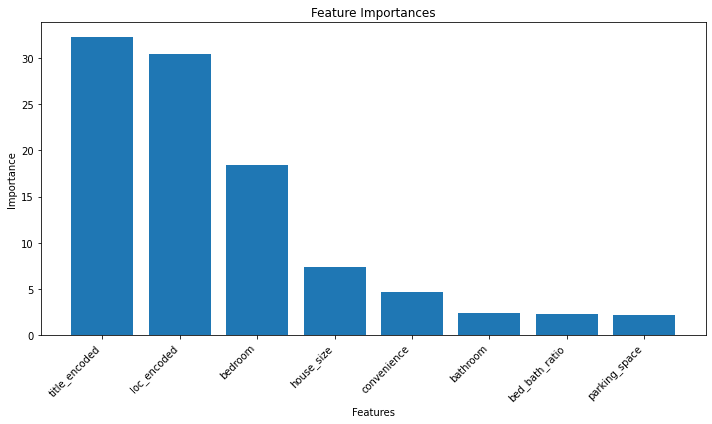

In [28]:
feature_importances = catboost_model.feature_importances_

# Creating a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': encoded_train_data.columns, 'Importance': feature_importances})

# Sorting the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

In [29]:
# Loading the test data into a dataframe

test_data = pd.read_csv("C:/Users/CHUKS/Downloads/free-ai-classes-in-every-city-hackathon-2023/Housing_dataset_test.csv")
test_data

,ID,loc,title,bedroom,bathroom,parking_space
0,845,Kano,Penthouse,4,1,2
1,1924,Adamawa,Apartment,2,2,4
2,10718,Adamawa,Bungalow,2,7,2
3,12076,Lagos,Mansion,9,5,2
4,12254,Gombe,Semi-detached duplex,5,6,1
...,...,...,...,...,...,...
5995,1594,Ekiti,Flat,4,5,2
5996,2416,Adamawa,Terrace duplex,5,7,1
5997,10195,Oyo,Townhouse,4,1,4
5998,9455,Bauchi,Flat,3,7,5


In [30]:
# Dropping the 'ID' column

testing_data = test_data.drop(['ID'],axis='columns')
testing_data

,loc,title,bedroom,bathroom,parking_space
0,Kano,Penthouse,4,1,2
1,Adamawa,Apartment,2,2,4
2,Adamawa,Bungalow,2,7,2
3,Lagos,Mansion,9,5,2
4,Gombe,Semi-detached duplex,5,6,1
...,...,...,...,...,...
5995,Ekiti,Flat,4,5,2
5996,Adamawa,Terrace duplex,5,7,1
5997,Oyo,Townhouse,4,1,4
5998,Bauchi,Flat,3,7,5


In [31]:
testing_data['bed_bath_ratio'] = testing_data['bedroom'] / testing_data['bathroom']
testing_data

,loc,title,bedroom,bathroom,parking_space,bed_bath_ratio
0,Kano,Penthouse,4,1,2,4.000000
1,Adamawa,Apartment,2,2,4,1.000000
2,Adamawa,Bungalow,2,7,2,0.285714
3,Lagos,Mansion,9,5,2,1.800000
4,Gombe,Semi-detached duplex,5,6,1,0.833333
...,...,...,...,...,...,...
5995,Ekiti,Flat,4,5,2,0.800000
5996,Adamawa,Terrace duplex,5,7,1,0.714286
5997,Oyo,Townhouse,4,1,4,4.000000
5998,Bauchi,Flat,3,7,5,0.428571


In [32]:
testing_data['house_size'] = testing_data['bedroom'] + testing_data['bathroom'] + testing_data['parking_space']
testing_data

,loc,title,bedroom,bathroom,parking_space,bed_bath_ratio,house_size
0,Kano,Penthouse,4,1,2,4.000000,7
1,Adamawa,Apartment,2,2,4,1.000000,8
2,Adamawa,Bungalow,2,7,2,0.285714,11
3,Lagos,Mansion,9,5,2,1.800000,16
4,Gombe,Semi-detached duplex,5,6,1,0.833333,12
...,...,...,...,...,...,...,...
5995,Ekiti,Flat,4,5,2,0.800000,11
5996,Adamawa,Terrace duplex,5,7,1,0.714286,13
5997,Oyo,Townhouse,4,1,4,4.000000,9
5998,Bauchi,Flat,3,7,5,0.428571,15


In [33]:
testing_data['convenience'] = testing_data['bed_bath_ratio'] * testing_data['house_size']
testing_data

,loc,title,bedroom,bathroom,parking_space,bed_bath_ratio,house_size,convenience
0,Kano,Penthouse,4,1,2,4.000000,7,28.000000
1,Adamawa,Apartment,2,2,4,1.000000,8,8.000000
2,Adamawa,Bungalow,2,7,2,0.285714,11,3.142857
3,Lagos,Mansion,9,5,2,1.800000,16,28.800000
4,Gombe,Semi-detached duplex,5,6,1,0.833333,12,10.000000
...,...,...,...,...,...,...,...,...
5995,Ekiti,Flat,4,5,2,0.800000,11,8.800000
5996,Adamawa,Terrace duplex,5,7,1,0.714286,13,9.285714
5997,Oyo,Townhouse,4,1,4,4.000000,9,36.000000
5998,Bauchi,Flat,3,7,5,0.428571,15,6.428571


In [34]:
# Target encoding the 'loc' column

testing_data['loc_encoded'] = testing_data['loc'].map(loc_target_encode)
testing_data

,loc,title,bedroom,bathroom,parking_space,bed_bath_ratio,house_size,convenience,loc_encoded
0,Kano,Penthouse,4,1,2,4.000000,7,28.000000,1.975090e+06
1,Adamawa,Apartment,2,2,4,1.000000,8,8.000000,1.671004e+06
2,Adamawa,Bungalow,2,7,2,0.285714,11,3.142857,1.671004e+06
3,Lagos,Mansion,9,5,2,1.800000,16,28.800000,3.920999e+06
4,Gombe,Semi-detached duplex,5,6,1,0.833333,12,10.000000,1.660875e+06
...,...,...,...,...,...,...,...,...,...
5995,Ekiti,Flat,4,5,2,0.800000,11,8.800000,1.953749e+06
5996,Adamawa,Terrace duplex,5,7,1,0.714286,13,9.285714,1.671004e+06
5997,Oyo,Townhouse,4,1,4,4.000000,9,36.000000,1.973358e+06
5998,Bauchi,Flat,3,7,5,0.428571,15,6.428571,1.548004e+06


In [35]:
# Target encoding the 'title' column

testing_data['title_encoded'] = testing_data['title'].map(title_target_encode)
testing_data

,loc,title,bedroom,bathroom,parking_space,bed_bath_ratio,house_size,convenience,loc_encoded,title_encoded
0,Kano,Penthouse,4,1,2,4.000000,7,28.000000,1.975090e+06,2.479516e+06
1,Adamawa,Apartment,2,2,4,1.000000,8,8.000000,1.671004e+06,1.461717e+06
2,Adamawa,Bungalow,2,7,2,0.285714,11,3.142857,1.671004e+06,1.621742e+06
3,Lagos,Mansion,9,5,2,1.800000,16,28.800000,3.920999e+06,3.591184e+06
4,Gombe,Semi-detached duplex,5,6,1,0.833333,12,10.000000,1.660875e+06,1.751828e+06
...,...,...,...,...,...,...,...,...,...,...
5995,Ekiti,Flat,4,5,2,0.800000,11,8.800000,1.953749e+06,1.593675e+06
5996,Adamawa,Terrace duplex,5,7,1,0.714286,13,9.285714,1.671004e+06,1.790421e+06
5997,Oyo,Townhouse,4,1,4,4.000000,9,36.000000,1.973358e+06,1.914208e+06
5998,Bauchi,Flat,3,7,5,0.428571,15,6.428571,1.548004e+06,1.593675e+06


In [36]:
# Dropped the categorical columns present in the test data.

encoded_testing_data = testing_data.drop(['loc','title'],axis=1)
encoded_testing_data

,bedroom,bathroom,parking_space,bed_bath_ratio,house_size,convenience,loc_encoded,title_encoded
0,4,1,2,4.000000,7,28.000000,1.975090e+06,2.479516e+06
1,2,2,4,1.000000,8,8.000000,1.671004e+06,1.461717e+06
2,2,7,2,0.285714,11,3.142857,1.671004e+06,1.621742e+06
3,9,5,2,1.800000,16,28.800000,3.920999e+06,3.591184e+06
4,5,6,1,0.833333,12,10.000000,1.660875e+06,1.751828e+06
...,...,...,...,...,...,...,...,...
5995,4,5,2,0.800000,11,8.800000,1.953749e+06,1.593675e+06
5996,5,7,1,0.714286,13,9.285714,1.671004e+06,1.790421e+06
5997,4,1,4,4.000000,9,36.000000,1.973358e+06,1.914208e+06
5998,3,7,5,0.428571,15,6.428571,1.548004e+06,1.593675e+06


In [37]:
# To make sure the alignment of the train and test data are the same

final_train,final_test = encoded_train_data.align(encoded_testing_data, join='inner', axis=1)

In [38]:
# Catboost model predicting the price.

test_preds = catboost_model.predict(encoded_testing_data)

In [39]:
# The 'ID' and 'price' are placed in a dataframe

output = pd.DataFrame({'ID':test_data.ID,'price':test_preds})
output

,ID,price
0,845,2.412780e+06
1,1924,1.040401e+06
2,10718,1.271992e+06
3,12076,8.423215e+06
4,12254,1.901025e+06
...,...,...
5995,1594,1.814890e+06
5996,2416,1.969828e+06
5997,10195,1.921691e+06
5998,9455,1.353454e+06


In [52]:
# converting the dataframe to a csv file

output.to_csv('C:/Users/CHUKS/Desktop/projects/submission055.csv',index=False)

In [ ]:
catboost_model = CatBoostRegressor(learning_rate=0.07444444444444444,l2_leaf_reg=1,
iterations = 330, depth = 6,border_count = 128)

In [ ]:
features = bedroom	bathroom	parking_space	bed_bath_ratio	house_size	conv	loc_encoded	title_encoded

In [ ]:
Housing_train_data['loc_title'] = Housing_train_data['loc'] + '_' + Housing_train_data['title']
Housing_train_data